# Load libraries

In [6]:
# Load in libraries
library(Seurat)
library(ggplot2)
library(data.table)
library(stringr)
library(Signac)
#library(tradeSeq)
library(BSgenome.Hsapiens.UCSC.hg38)
#library(EnsDb.Hsapiens.v86)
#library(monaLisa)
library(edgeR)
library(DESeq2)
library(RColorBrewer)
library(pheatmap)
library(paletteer)
library(JASPAR2020)
library(TFBSTools)
library(BiocParallel)
library(paletteer)
#library(ghibli)
library(Rmisc)
library(ggbreak) 
library(colorspace)
library(pheatmap)
library(RColorBrewer)
library(viridis)
library(ComplexHeatmap)
library(circlize)

Loading required package: lattice

Loading required package: plyr


Attaching package: ‘plyr’


The following object is masked from ‘package:matrixStats’:

    count


The following object is masked from ‘package:XVector’:

    compact


The following object is masked from ‘package:IRanges’:

    desc


The following object is masked from ‘package:S4Vectors’:

    rename


ggbreak v0.1.5 Learn more at https://yulab-smu.top/



If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846


Loading required package: viridisLite

Loading required package: grid


Attaching package: ‘grid’


The following object is masked from ‘package:Biostrings’:

    pattern


ComplexHeatmap version 2.22.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: 

In [7]:
library(clusterProfiler)
library(ChIPseeker)

clusterProfiler v4.14.6 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan,
X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal
enrichment tool for interpreting omics data. The Innovation. 2021,
2(3):100141


Attaching package: ‘clusterProfiler’


The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise


The following object is masked from ‘package:lattice’:

    dotplot


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter


ChIPseeker v1.42.1 Learn more at https://yulab-smu.top/contribution-knowledge-mining/

Please cite:

Qianwen Wang, Ming Li, Tianzhi Wu, Li Zhan, Lin Li, Meijun Chen, Wenqin
Xie, Zijing Xie, Erqiang Hu

In [2]:
# Create 'regionize' function for conveniency
regionize <- function(x) {
   y <- gsub(',', '', gsub(':', '-', x))
   paste0(unlist(strsplit(y,'-'))[1],'-',
          as.numeric(unlist(strsplit(y,'-'))[2]) - 5000,'-',
          as.numeric(unlist(strsplit(y,'-'))[3]) + 5000)
}

In [ ]:
#library(future)
#plan("multicore", workers = 2)
#options(future.globals.maxSize = 100 * 1024 ^ 3) # for 180 Gb RAM

# Initial processing

In [ ]:
# Load in data
human_multiome <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/snMultiome_atlas_Seurat_object.rds')

In [ ]:
DefaultAssay(human_multiome) <- 'ATAC'

In [ ]:
frag_list <- list('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-18-PFC_atac_fragments.tsv.gz',              
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-19-V1_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-1-PFC_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-20-CTX_atac_fragments.tsv.gz',     
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-32-V1_atac_fragments.tsv.gz',          
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-37-CTX_atac_fragments.tsv.gz',           
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-41-PFC-2_atac_fragments.tsv.gz',          
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-41-V1_atac_fragments.tsv.gz',             
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-43-PFC_atac_fragments.tsv.gz',          
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-45-CTX_atac_fragments.tsv.gz',             
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/ARKFrozen-8-V1_atac_fragments.tsv.gz',              
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/GW27-2-7-18-PFC_atac_fragments.tsv.gz',            
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/HDBR-14584-CTX_atac_fragments.tsv.gz',             
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/HDBR-14831-CTX_atac_fragments.tsv.gz',              
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/HDBR-14834-TC_atac_fragments.tsv.gz',       
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/HDBR-15020-FB_atac_fragments.tsv.gz',     
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-1325-BA10-2_atac_fragments.tsv.gz',     
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-1325-BA17_atac_fragments.tsv.gz',      
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-1671-BA10-2_atac_fragments.tsv.gz',       
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-1671-BA17_atac_fragments.tsv.gz',        
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-4267-BA10-2_atac_fragments.tsv.gz',        
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-4341-BA17_atac_fragments.tsv.gz',       
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-4341-BA9_atac_fragments.tsv.gz',        
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-4373-BA17_atac_fragments.tsv.gz',       
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-4373-BA9-3_atac_fragments.tsv.gz',        
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-4392-BA17_atac_fragments.tsv.gz',        
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-4392-BA9_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-4458-BA17_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-4458-BA9-3_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-5162-BA17_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-5162-BA9_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-5376-BA17_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-5376-BA9_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-5554-BA17_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-5554-BA9_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-5900-BA17_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-M1154-BA10-2_atac_fragments.tsv.gz',
'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/NIH-M2837-BA10-2_atac_fragments.tsv.gz')

In [ ]:
frags <- Fragments(human_multiome)  # get list of fragment objects
Fragments(human_multiome) <- NULL  # remove fragment information from assay
frags[[1]] <- UpdatePath(frags[[1]], new.path = frag_list[[1]])
frags[[2]] <- UpdatePath(frags[[2]], new.path = frag_list[[2]])
frags[[3]] <- UpdatePath(frags[[3]], new.path = frag_list[[3]])
frags[[4]] <- UpdatePath(frags[[4]], new.path = frag_list[[4]])
frags[[5]] <- UpdatePath(frags[[5]], new.path = frag_list[[5]])
frags[[6]] <- UpdatePath(frags[[6]], new.path = frag_list[[6]])
frags[[7]] <- UpdatePath(frags[[7]], new.path = frag_list[[7]])
frags[[8]] <- UpdatePath(frags[[8]], new.path = frag_list[[8]])
frags[[9]] <- UpdatePath(frags[[9]], new.path = frag_list[[9]])
frags[[10]] <- UpdatePath(frags[[10]], new.path = frag_list[[10]])
frags[[11]] <- UpdatePath(frags[[11]], new.path = frag_list[[11]])
frags[[12]] <- UpdatePath(frags[[12]], new.path = frag_list[[12]])
frags[[13]] <- UpdatePath(frags[[13]], new.path = frag_list[[13]])
frags[[14]] <- UpdatePath(frags[[14]], new.path = frag_list[[14]])
frags[[15]] <- UpdatePath(frags[[15]], new.path = frag_list[[15]])
frags[[16]] <- UpdatePath(frags[[16]], new.path = frag_list[[16]])
frags[[17]] <- UpdatePath(frags[[17]], new.path = frag_list[[17]])
frags[[18]] <- UpdatePath(frags[[18]], new.path = frag_list[[18]])
frags[[19]] <- UpdatePath(frags[[19]], new.path = frag_list[[19]])
frags[[20]] <- UpdatePath(frags[[20]], new.path = frag_list[[20]])
frags[[21]] <- UpdatePath(frags[[21]], new.path = frag_list[[21]])
frags[[22]] <- UpdatePath(frags[[22]], new.path = frag_list[[22]])
frags[[23]] <- UpdatePath(frags[[23]], new.path = frag_list[[23]])
frags[[24]] <- UpdatePath(frags[[24]], new.path = frag_list[[24]])
frags[[25]] <- UpdatePath(frags[[25]], new.path = frag_list[[25]])
frags[[26]] <- UpdatePath(frags[[26]], new.path = frag_list[[26]])
frags[[27]] <- UpdatePath(frags[[27]], new.path = frag_list[[27]])
frags[[28]] <- UpdatePath(frags[[28]], new.path = frag_list[[28]])
frags[[29]] <- UpdatePath(frags[[29]], new.path = frag_list[[29]])
frags[[30]] <- UpdatePath(frags[[30]], new.path = frag_list[[30]])
frags[[31]] <- UpdatePath(frags[[31]], new.path = frag_list[[31]])
frags[[32]] <- UpdatePath(frags[[32]], new.path = frag_list[[32]])
frags[[33]] <- UpdatePath(frags[[33]], new.path = frag_list[[33]])
frags[[34]] <- UpdatePath(frags[[34]], new.path = frag_list[[34]])
frags[[35]] <- UpdatePath(frags[[35]], new.path = frag_list[[35]])
frags[[36]] <- UpdatePath(frags[[36]], new.path = frag_list[[36]])
frags[[37]] <- UpdatePath(frags[[37]], new.path = frag_list[[37]])
frags[[38]] <- UpdatePath(frags[[38]], new.path = frag_list[[38]])
Fragments(human_multiome) <- frags  # assign update list of fragment objects back to the assay

In [ ]:
# Save RDS object (w/fragments file added)
saveRDS(human_multiome, '/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/human_multiome_w_frags.rds')

In [ ]:
# Save RDS object (w/fragments file added)
human_multiome <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/human_multiome_w_frags.rds')

In [ ]:
#roi <- 'chr4-108757059-108762071' #Etnppl
roi <- 'chr18-23202401-23214716' #Cables1
#roi <- 'chr13-20228510-20234689'  #Gjb6

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 8, repr.plot.res = 100)

cov_plot <- CoveragePlot(
  object = human_multiome,
  region = roi,
  annotation = TRUE,
  peaks = FALSE,
    group.by = 'type_updated'
)
cov_plot


In [ ]:
options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 300)
p1 <- DimPlot(human_multiome, reduction = 'wnn.umap', group.by = 'subclass',raster=FALSE,shuffle=T) + theme_void() + ggtitle('') + 
theme(legend.text = element_text(size=15,margin=margin(0,10,0,0)))
p2 <- DimPlot(human_multiome, reduction = 'wnn.umap', group.by = 'Group',raster=FALSE,shuffle=T) + theme_void() + ggtitle('') + 
theme(legend.text = element_text(size=15,margin=margin(0,10,0,0)))

p3 <- DimPlot(human_multiome, reduction = 'wnn.umap', group.by = 'region_summary',raster=FALSE,shuffle=T) + theme_void() + ggtitle('') + 
theme(legend.text = element_text(size=15,margin=margin(0,10,0,0)))

p1 + p2 + p3

In [ ]:
cell_cts <- table(human_multiome$type_updated,human_multiome$Group)
cell_prop <- cell_cts / colSums(cell_cts)

cell_cts_astro <- as.data.frame(cell_prop[rownames(cell_prop) %in% c('Astrocyte-Immature',
                                                     'Astrocyte-Protoplasmic',
                                                     'Astrocyte-Fibrous'),])
cell_cts_astro$Freq <- cell_cts_astro$Freq * 100

names(cell_cts_astro) <- c('Celltype','Stage','Percent')

cell_cts_astro$Stage <- str_replace(cell_cts_astro$Stage, 'First_trimester','1st trimester')
cell_cts_astro$Stage <- str_replace(cell_cts_astro$Stage, 'Second_trimester','2nd trimester')
cell_cts_astro$Stage <- str_replace(cell_cts_astro$Stage, 'Third_trimester','3rd trimester')

cell_cts_astro$Stage <- factor(cell_cts_astro$Stage, levels = c('1st trimester',
                                                                '2nd trimester',
                                                                '3rd trimester',
                                                                'Infancy',
                                                                'Adolescence'))

In [ ]:
options(repr.plot.width = 4.5, repr.plot.height = 3, repr.plot.res = 200)

ggplot(data=cell_cts_astro, aes(x=Stage, y=Percent, fill=Celltype)) +
  geom_bar(stat="identity") + theme_classic() + ylab('% of cells') + theme(axis.text = element_text(color='black'),
                                                                                 axis.text.x  = element_text(angle=45,hjust=1,vjust=1)) + guides(fill=guide_legend(title="Cell type"))

In [ ]:
cell_cts_region <- table(human_multiome$type_updated,human_multiome$region_summary)
cell_prop_region <- cell_cts_region / colSums(cell_cts_region)

cell_prop_region_astro <- as.data.frame(cell_prop_region[rownames(cell_prop_region) %in% c('Astrocyte-Immature',
                                                     'Astrocyte-Protoplasmic',
                                                     'Astrocyte-Fibrous'),])
cell_prop_region_astro$Freq <- cell_prop_region_astro$Freq * 100

names(cell_prop_region_astro) <- c('Celltype','Region','Percent')

cell_prop_region_astro$Region <- factor(cell_prop_region_astro$Region, levels = c('General',
                                                                                  'PFC',
                                                                                  'V1'))

In [ ]:
options(repr.plot.width = 4.5, repr.plot.height = 3, repr.plot.res = 200)

ggplot(data=cell_prop_region_astro, aes(x=Region, y=Percent, fill=Celltype)) +
  geom_bar(stat="identity") + theme_classic() + ylab('% of cells') + theme(axis.text = element_text(color='black'),
                                                                                 axis.text.x  = element_text(angle=45,hjust=1,vjust=1)) + guides(fill=guide_legend(title="Cell type"))

# Call peaks & runChromVAR on astrocytes

In [ ]:
# Call peaks on astrocytes
DefaultAssay(human_multiome_astro) <- 'ATAC'
peaks <- CallPeaks(
  object = human_multiome_astro,
  macs2.path = '/n/groups/neuroduo/Bruno/jupytervenv_gcc92_gdal314/bin/macs2',
  group.by = 'Group'
)

In [ ]:
# Save object
saveRDS(peaks,'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/peaks_240121.rds')

In [ ]:
# Quantify reads in peaks
macs2_counts <- FeatureMatrix(
  fragments = Fragments(human_multiome_astro),
  features = peaks,
  cells = colnames(human_multiome_astro)
)

In [ ]:
# Save object
saveRDS(macs2_counts,'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/macs2_counts_240121.rds')

In [ ]:
# Create new chromatin assay with peaks
annotation <- GetGRangesFromEnsDb(ensdb =  EnsDb.Hsapiens.v86)
seqlevelsStyle(annotation) <- "UCSC"
human_multiome_astro[["peaks"]] <- CreateChromatinAssay(
  counts = macs2_counts,
  fragments = Fragments(human_multiome_astro),
  annotation = annotation,
  genome = "hg38"
)

In [ ]:
# Save object after peaks as chromatin assay
saveRDS(human_multiome_astro,'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/240121_human_multiome_astro_w_peaks.rds')

In [ ]:
# Read object
human_multiome_astro_v2 <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/240121_human_multiome_astro_w_peaks.rds')

In [ ]:
DefaultAssay(human_multiome_astro_v2) <- 'peaks'
human_multiome_astro_v2 <- RegionStats(human_multiome_astro_v2, genome = BSgenome.Hsapiens.UCSC.hg38)

In [ ]:
# Get JASPAR database
jaspar_pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE)
)

In [ ]:
# Get HOMER database
#homer_pfm <- homerToPFMatrixList('/n/groups/neuroduo/Bruno/JASPAR_db/HOMER_db.txt')
#homer_df <- read.csv('/n/groups/neuroduo/Bruno/JASPAR_db/HOMER_db.txt',sep='',header=F)
#names_df <- homer_df %>% dplyr::filter(grepl("[a-zA-Z]", V2))
#names_df[,'V2']
#names(homer_pfm) <- names_df[,'V2']

In [ ]:
# Add homer motifs
#human_multiome_astro_homer <- AddMotifs(
#  object = human_multiome_astro,
#  genome = BSgenome.Hsapiens.UCSC.hg38,
#  pfm = homer_pfm,
#  assay = 'peaks'
#)

In [ ]:
# Add jaspar motifs
human_multiome_astro_jaspar <- AddMotifs(
  object = human_multiome_astro,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  pfm = jaspar_pfm,
  assay = 'peaks'
)

In [ ]:
# Drop out any peaks on non-standard chromosomes
main.chroms <- standardChromosomes(BSgenome.Hsapiens.UCSC.hg38)
keep.peaks <- as.logical(seqnames(granges(human_multiome_astro_homer)) %in% main.chroms)
human_multiome_astro_homer_v2 <- human_multiome_astro_homer[keep.peaks, ]

keep.peaks <- as.logical(seqnames(granges(human_multiome_astro_jaspar)) %in% main.chroms)
human_multiome_astro_jaspar_v2 <- human_multiome_astro_jaspar[keep.peaks, ]

In [ ]:
# Run chromVAR for human dataset
human_multiome_astro_homer <- RunChromVAR(
  object = human_multiome_astro_homer_v2,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  assay = 'peaks'   
)

In [ ]:
# Run chromVAR for human dataset
human_multiome_astro_jaspar <- RunChromVAR(
  object = human_multiome_astro_jaspar_v2,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  assay = 'peaks'   
)

# Astrocyte analysis

In [ ]:
# Save RDS object (w/fragments file added)
human_multiome <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/human_multiome_w_frags.rds')

In [ ]:
human_multiome_astro <- subset(human_multiome, subset = subclass == 'Astrocyte')

In [ ]:
# Re-cluster only astrocytes
DefaultAssay(human_multiome_astro) <- 'RNA'
all.genes <- rownames(human_multiome_astro)
human_multiome_astro <- ScaleData(human_multiome_astro, features = all.genes)
human_multiome_astro <- FindVariableFeatures(human_multiome_astro, selection.method = "vst", nfeatures = 2000)
human_multiome_astro <- RunPCA(human_multiome_astro, dims=1:20)
human_multiome_astro <- FindNeighbors(human_multiome_astro, dims = 1:10)
human_multiome_astro <- FindClusters(human_multiome_astro, resolution = 0.5)
human_multiome_astro <- RunUMAP(human_multiome_astro, dims = 1:10)

In [ ]:
# Load RDS file after calling peaks
human_multiome_astro_RNA <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/240121_human_multiome_astro_w_peaks.rds')

In [ ]:
# Load RDS file after running chromvar
human_multiome_astro <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/240121_human_multiome_astro_w_peaks_chromvar.rds')

In [ ]:
# Set groups for plotting
human_multiome_astro$plot_groups <- gsub('_',' ',human_multiome_astro$Group)

human_multiome_astro$plot_groups <- factor(human_multiome_astro$plot_groups, levels = c('First trimester',
                                                                                        'Second trimester',
                                                                                        'Third trimester',
                                                                                        'Infancy',
                                                                                        'Adolescence'))

In [ ]:
human_multiome_astro[['RNA']] <- human_multiome_astro_RNA[['RNA']]

In [ ]:
human_multiome_astro

# Find differential motifs across all cell types & plot heatmap for Fig. 3g

In [8]:
human_multiome_group_chromvar <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250423_human_multiome_jaspar_V2_peaks_group_chromvar.rds')

In [9]:
dim(table(human_multiome_group_chromvar$Ident))

[1] 38

In [10]:
DefaultAssay(human_multiome_group_chromvar) <- 'chromvar_peaks_group'

In [11]:
human_multiome_group_chromvar_L23 <- subset(human_multiome_group_chromvar, subset = type_updated %in% c('EN-L2_3-IT',
                                                                  'RG-vRG',
                                                                  'RG-tRG',
                                                                  'RG-oRG',
                                                                  'IPC-EN',
                                                                  'EN-Newborn',
                                                                  'EN-IT-Immature'))

In [31]:
human_multiome_group_chromvar_PV <- subset(human_multiome_group_chromvar, subset = type_updated %in% c('IN-MGE-PV',
                                                                  'IN-MGE-Immature'))

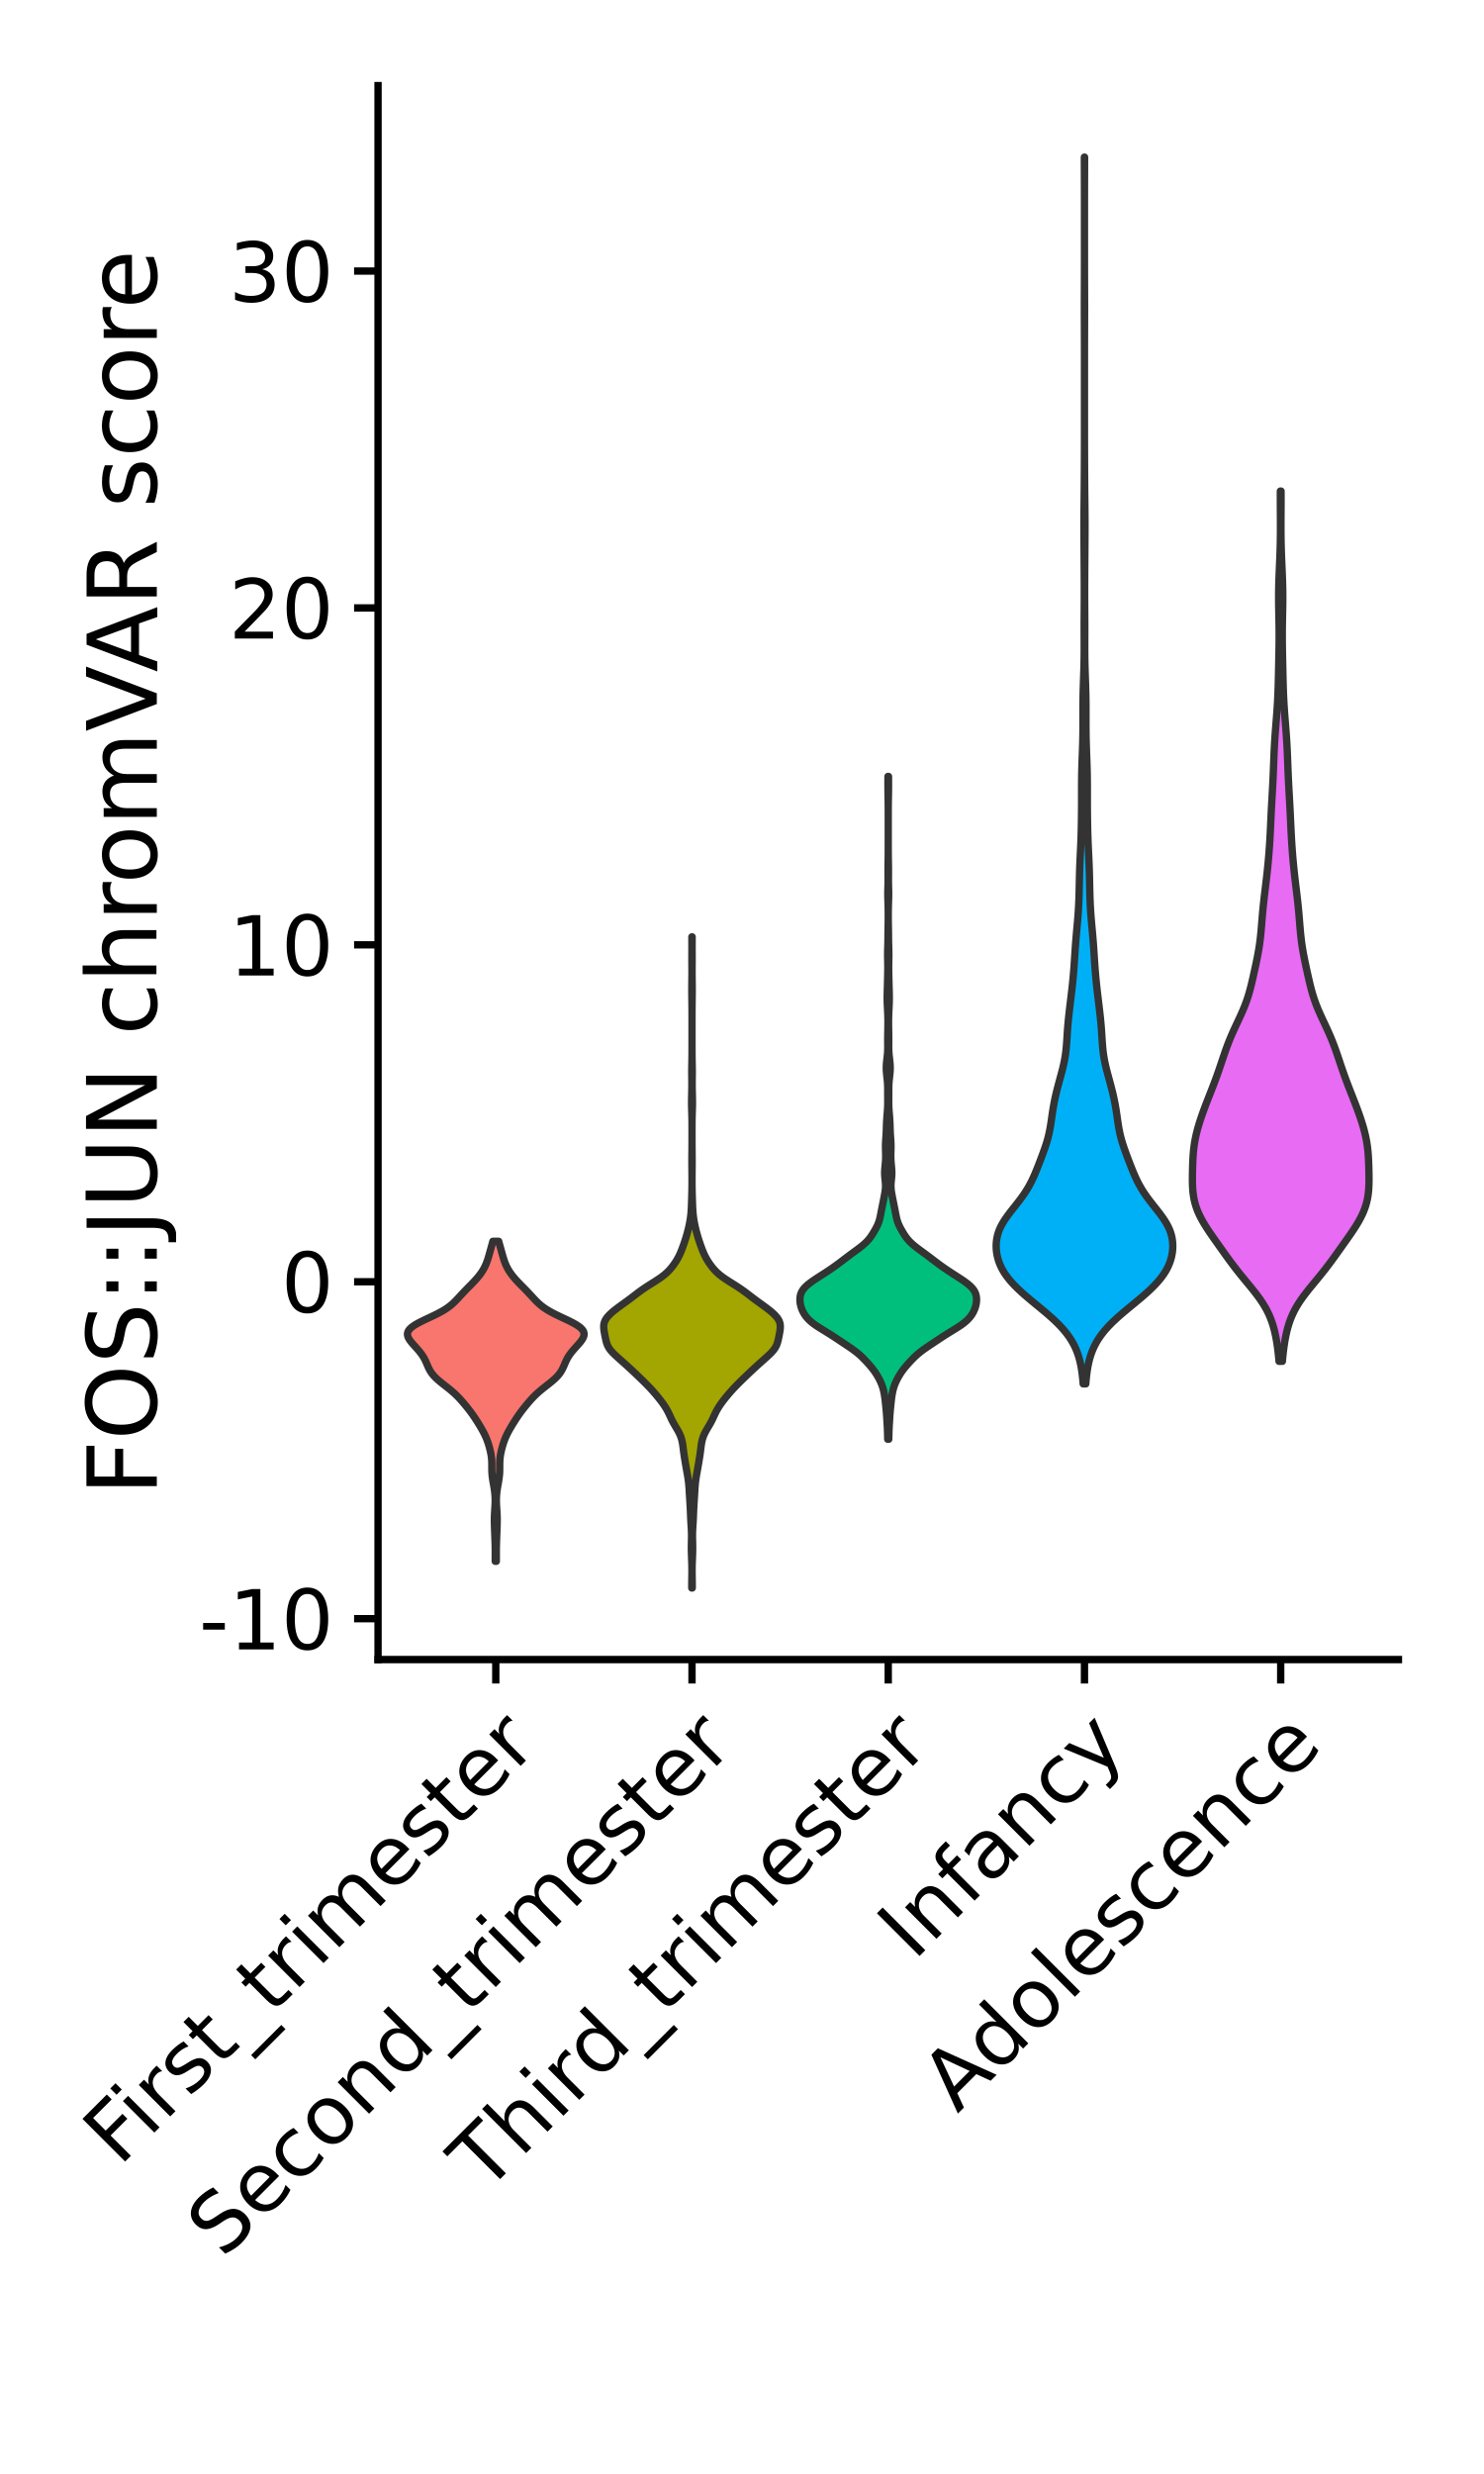

In [32]:
options(repr.plot.width = 3, repr.plot.height = 5,repr.plot.res=500)
VlnPlot(human_multiome_group_chromvar_PV, features = 'MA0099.3', group.by = 'Group', pt.size=0) + ylab('FOS::JUN chromVAR score') + xlab('') +
theme(legend.position='none', plot.title=element_blank())

In [15]:
DefaultAssay(human_multiome_group_chromvar) <- 'chromvar_peaks_group'

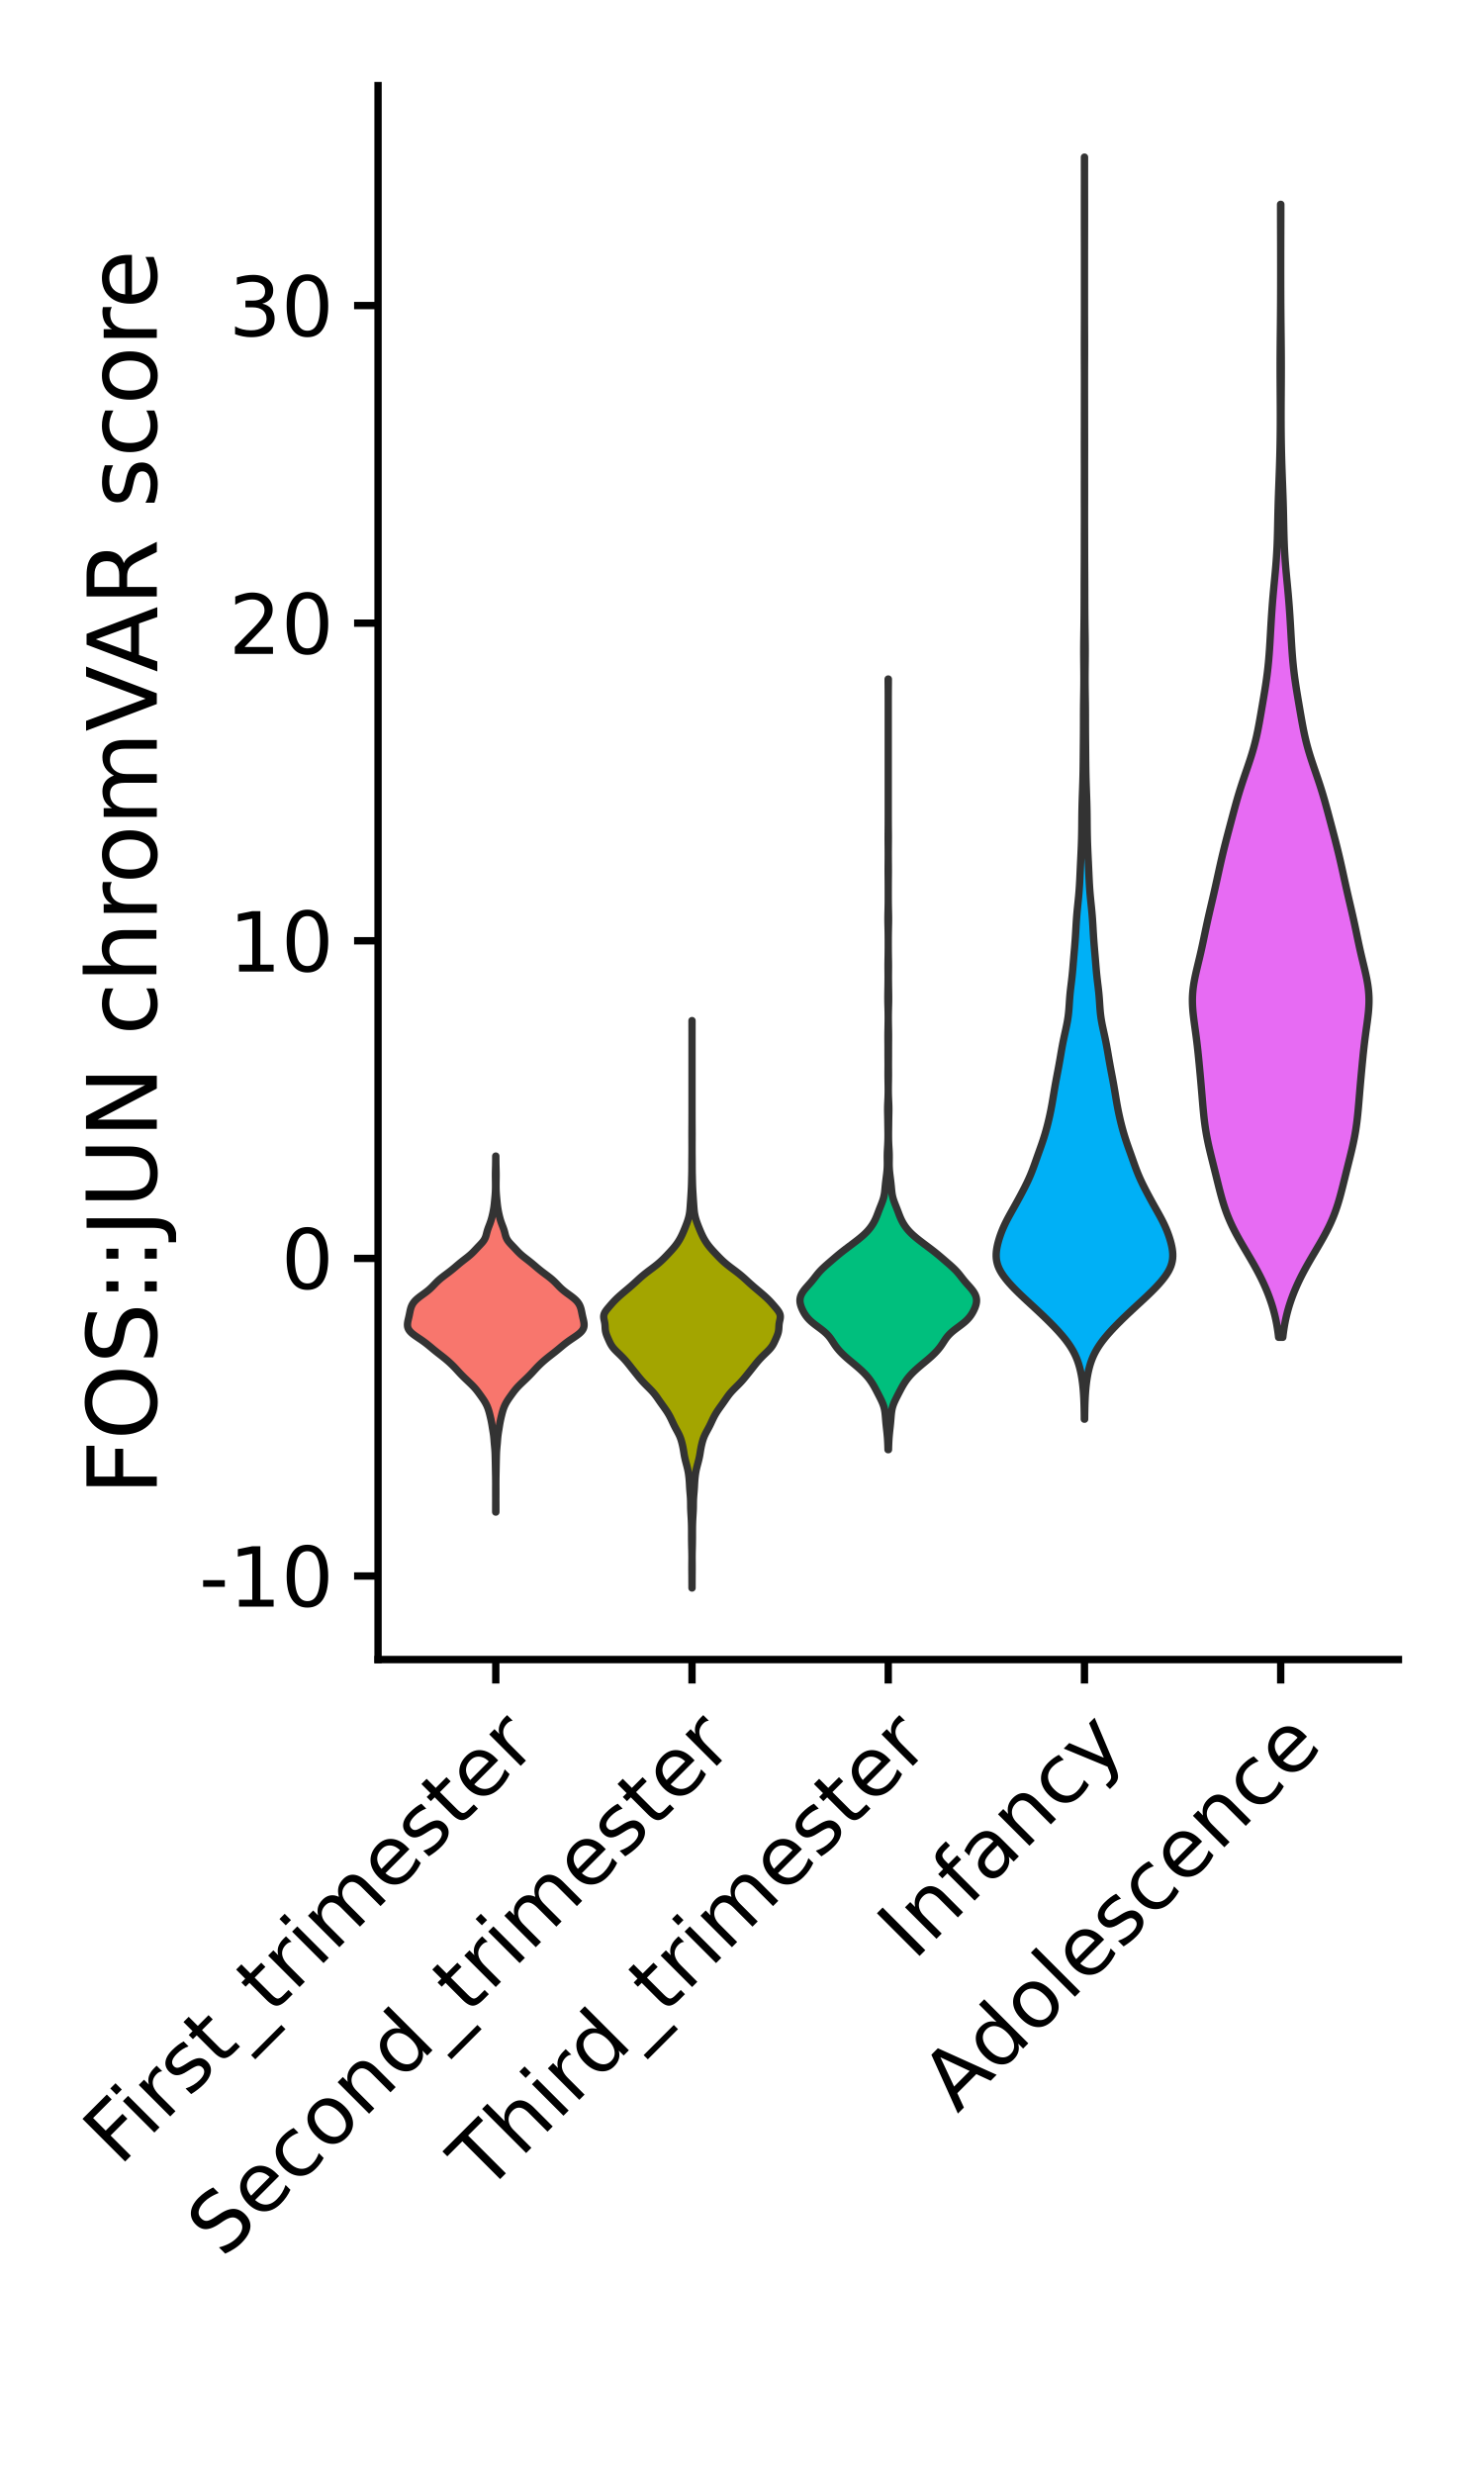

In [30]:
options(repr.plot.width = 3, repr.plot.height = 5,repr.plot.res=500)
VlnPlot(human_multiome_group_chromvar_L23, features = 'MA0099.3', group.by = 'Group', pt.size=0) + ylab('FOS::JUN chromVAR score') + xlab('') +
theme(legend.position='none', plot.title=element_blank())

In [5]:
# For each terminal-differentiated EN type: combine RG-vRG, RG-tRG, RG-oRG, IPC-EN, EN-Newborn, either EN-IT-Immature (l23-IT,L4-IT, L5-IT, L6-IT) 
# or EN-Non-IT-Immature (L5-ET, L56_NP, L6-CT, L6b)

# For each terminal-differentiated IN type: combine IN-CGE-Immature w/ IN-CGE-VIP or IN-CGE-SNCG 
# combine IN-MGE-Immature w/ IN-MGE-SST or IN-MGE-PV

# Combine Oligodendrocye-Immature w/Oligodendrocyte

# Combine Astrocyte-Immature w/Astrocyte-protoplasmic, Astrocyte-fibrous

In [ ]:
# keep only chromvar assay for analysis (to prevent memory issue)
human_multiome_group_chromvar_only <- human_multiome_group_chromvar[['chromvar_peaks_group']]

In [ ]:
# Convert to seurat object
human_multiome_group_chromvar_only_seu <- CreateSeuratObject(human_multiome_group_chromvar_only)
human_multiome_group_chromvar_only_seu@meta.data <- human_multiome_group_chromvar@meta.data

In [ ]:
# Generate list of downsampled (to 10K cells) Seurat objects for each mature type
down_obj_list <- list()

# IT neurons
EN_IT_list <- c('EN-L2_3-IT','EN-L4-IT','EN-L5-IT','EN-L6-IT')
for (i in EN_IT_list) {
  seurat_sub <- subset(human_multiome_group_chromvar_only_seu, subset = type_updated %in% c(i,
                                                                  'RG-vRG',
                                                                  'RG-tRG',
                                                                  'RG-oRG',
                                                                  'IPC-EN',
                                                                  'EN-Newborn',
                                                                  'EN-IT-Immature'))
    if(dim(seurat_sub)[2] > 4000) {
            seurat_down <- seurat_sub[,sample(colnames(seurat_sub), size =4000, replace=F)]
            down_obj_list[[i]] <- seurat_down}
    else if (dim(seurat_sub)[2] <= 4000) {
            down_obj_list[[i]] <- seurat_sub}
    }

# ET neurons
EN_nonIT_list <- c('EN-L5-ET','EN-L5_6-NP','EN-L6-CT','EN-L6b')
for (i in EN_nonIT_list) {
  seurat_sub <- subset(human_multiome_group_chromvar_only_seu, subset = type_updated %in% c(i,'RG-vRG',
                                                                  'RG-tRG',
                                                                  'RG-oRG',
                                                                  'IPC-EN',
                                                                  'EN-Newborn',
                                                                  'EN-Non-IT-Immature'))
    if(dim(seurat_sub)[2] > 10000) {
            seurat_down <- seurat_sub[,sample(colnames(seurat_sub), size =10000, replace=F)]
            down_obj_list[[i]] <- seurat_down}
    else if (dim(seurat_sub)[2] <= 10000) {
            down_obj_list[[i]] <- seurat_sub}
}

# CGE neurons
IN_CGE_list <- c('IN-CGE-VIP','IN-CGE-SNCG')
for (i in IN_CGE_list) {
    seurat_sub <- subset(human_multiome_group_chromvar_only_seu, subset = type_updated %in% c(i,'IN-CGE-Immature'))
    
    if(dim(seurat_sub)[2] > 10000) {
            seurat_down <- seurat_sub[,sample(colnames(seurat_sub), size =10000, replace=F)]
            down_obj_list[[i]] <- seurat_down}
    else if (dim(seurat_sub)[2] <= 10000) {
            down_obj_list[[i]] <- seurat_sub}
}

# MGE neurons
IN_MGE_list <- c('IN-MGE-SST','IN-MGE-PV')
for (i in IN_MGE_list) {
  seurat_sub <- subset(human_multiome_group_chromvar_only_seu, subset = type_updated %in% c(i,'IN-MGE-Immature'))

    if(dim(seurat_sub)[2] > 6000) {
            seurat_down <- seurat_sub[,sample(colnames(seurat_sub), size =6000, replace=F)]
            down_obj_list[[i]] <- seurat_down}
    else if (dim(seurat_sub)[2] <= 6000) {
            down_obj_list[[i]] <- seurat_sub}
}

# Oligodendrocyte
oligo_list <- c('Oligodendrocyte')
for (i in oligo_list) {
  seurat_sub <- subset(human_multiome_group_chromvar_only_seu, subset = type_updated %in% c(i,'Oligodendrocyte-Immature'))

    if(dim(seurat_sub)[2] > 10000) {
            seurat_down <- seurat_sub[,sample(colnames(seurat_sub), size =10000, replace=F)]
            down_obj_list[[i]] <- seurat_down}
    else if (dim(seurat_sub)[2] <= 10000) {
            down_obj_list[[i]] <- seurat_sub}
}

# Other cells
other_list <- c('Microglia','Vascular','OPC','IN-Mix-LAMP5')
for (i in other_list) {
  seurat_sub <- subset(human_multiome_group_chromvar_only_seu, subset = type_updated == i)

    if(dim(seurat_sub)[2] > 10000) {
            seurat_down <- seurat_sub[,sample(colnames(seurat_sub), size =10000, replace=F)]
            down_obj_list[[i]] <- seurat_down}
    else if (dim(seurat_sub)[2] <= 10000) {
            down_obj_list[[i]] <- seurat_sub}
}

# Astrocytes
astro_list <- c('Astrocyte-Protoplasmic')
for (i in astro_list) {
  seurat_sub <- subset(human_multiome_group_chromvar_only_seu, subset = type_updated %in% c(i,
                                                                                            'Astrocyte-Fibrous',
                                                                                            'Astrocyte-Immature'))
    if(dim(seurat_sub)[2] > 10000) {
            seurat_down <- seurat_sub[,sample(colnames(seurat_sub), size =10000, replace=F)]
            down_obj_list[[i]] <- seurat_down}
    else if (dim(seurat_sub)[2] <= 10000) {
            down_obj_list[[i]] <- seurat_sub}
}


In [ ]:
# Run chromvar on each cell type
DefaultAssay(human_multiome_group_chromvar) <- 'peaks_group_filt'

diff_chromvar_results <- lapply(down_obj_list, function(x){
    Idents(x) <- 'Group'
    test_res <- FindMarkers(
                        object = x,
                        ident.1 = 'Adolescence',
                        ident.2 = 'First_trimester',
                        mean.fxn = rowMeans,
                        test.use='MAST',
                        fc.name = "avg_diff")

    test_res$TF <- ConvertMotifID(Motifs(human_multiome_group_chromvar),id=rownames(test_res))
    return(test_res)
})

In [ ]:
# Convert -log10(padj) for each type & calculate scaled padj for induced TFs
diff_chromvar_results_induced_TF <- lapply(diff_chromvar_results, function(x){
    x$log10padj <- -log10(x$p_val_adj)
    x_up <- x[x$avg_diff>0,]
    x_up$scaled_padj <-  x_up$log10padj / x_up[1,'log10padj']
    return(x_up)
})

# Set cell type column
for (i in names(diff_chromvar_results_induced_TF)){
    diff_chromvar_results_induced_TF[[i]]$celltype <- i
}

In [ ]:
# Save results
saveRDS(diff_chromvar_results_induced_TF, '/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250425_diff_chromvar_results_induced_TF.rds')

In [8]:
# Read results
diff_chromvar_results_induced_TF <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250425_diff_chromvar_results_induced_TF.rds')

In [9]:
# Combine into dataframe
df <- do.call(rbind, diff_chromvar_results_induced_TF)

In [10]:
# Collect top 2 motifs per cell type
top_motifs <- list()
top_motifs <- lapply(diff_chromvar_results_induced_TF, function(x){
            top2 <- x[1:2,'TF']
})

# Combine into single df
top_motif_df <- reshape2::melt(do.call(cbind, top_motifs))

# Collect unique motifs for plotting
uniq_motifs <- unique(top_motif_df$value)

In [11]:
# Subset results for unique motifs
df_motif_ploting <- df[df$TF %in% uniq_motifs,
                       c('TF','scaled_padj','celltype')]

In [12]:
# Cast dataframe to wide form
plot_df_cast <- reshape2::acast(setDT(df_motif_ploting), celltype~TF,value.var='scaled_padj')
plot_df_cast[is.na(plot_df_cast)] <- 0

In [13]:
# Order cell types by class
plot_df_cast_reorder <- plot_df_cast[c('EN-L2_3-IT',
              'EN-L4-IT',
              'EN-L5-IT',
              'EN-L5-ET',
              'EN-L5_6-NP',
              'EN-L6-IT',
              'EN-L6-CT',
              'EN-L6b',
              'IN-MGE-PV',
              'IN-MGE-SST',
              'IN-CGE-SNCG',
              'IN-CGE-VIP',
              'IN-Mix-LAMP5',
              'Vascular',
              'Microglia',
              'Oligodendrocyte',
              'OPC',
              'Astrocyte-Protoplasmic'),]

rownames(plot_df_cast_reorder)[1] <- 'L2/3'
rownames(plot_df_cast_reorder)[2] <- 'L4IT'
rownames(plot_df_cast_reorder)[3] <- 'L5IT'
rownames(plot_df_cast_reorder)[4] <- 'L5PT'
rownames(plot_df_cast_reorder)[5] <- 'L5/6NP'
rownames(plot_df_cast_reorder)[6] <- 'L6IT'
rownames(plot_df_cast_reorder)[7] <- 'L6CT'
rownames(plot_df_cast_reorder)[8] <- 'L6b'
rownames(plot_df_cast_reorder)[9] <- 'PV+'
rownames(plot_df_cast_reorder)[10] <- 'SST+'
rownames(plot_df_cast_reorder)[11] <- 'SNCG+'
rownames(plot_df_cast_reorder)[12] <- 'VIP+'
rownames(plot_df_cast_reorder)[13] <- 'LAMP5+'
rownames(plot_df_cast_reorder)[14] <- 'Endo'
rownames(plot_df_cast_reorder)[15] <- 'Micro'
rownames(plot_df_cast_reorder)[16] <- 'Oligo'
rownames(plot_df_cast_reorder)[18] <- 'Astro'

# Order motifs
plot_df_cast_reorder <- plot_df_cast_reorder[,c('EGR1',
                                                'Wt1',  
                                                'EGR3',  
                                                'ZNF75D',
                                                'MEF2A',
                                                'MEF2B',
                                                'MEF2C',
                                                'FOS',
                                                'FOS::JUN',
                                                'FOS::JUND',
                                                'FOSL2',
                                                'JUN(var.2)',
                                                'Smad2::Smad3',
                                                'BATF3',
                                                'DBP',
                                                'TEF',
                                                'GABPA',
                                                'ELF1',
                                                'ELF3',
                                                'SPI1',
                                                'NR4A2',
                                                'NR2C1',
                                                'ASCL1',
                                                'NFIC',
                                                'NR3C1',
                                               'NR3C2')]

In [18]:
# Re-label Smad2::Smad3 for space
colnames(plot_df_cast_reorder)[colnames(plot_df_cast_reorder) == 'Smad2::Smad3'] <- 'Smad2/3'
colnames(plot_df_cast_reorder)[colnames(plot_df_cast_reorder) == 'NR3C1'] <- 'GR'
colnames(plot_df_cast_reorder)[colnames(plot_df_cast_reorder) == 'NR3C2'] <- 'MR'

Warning message:
"`legend_height` you specified is too small, use the default minimal
height."


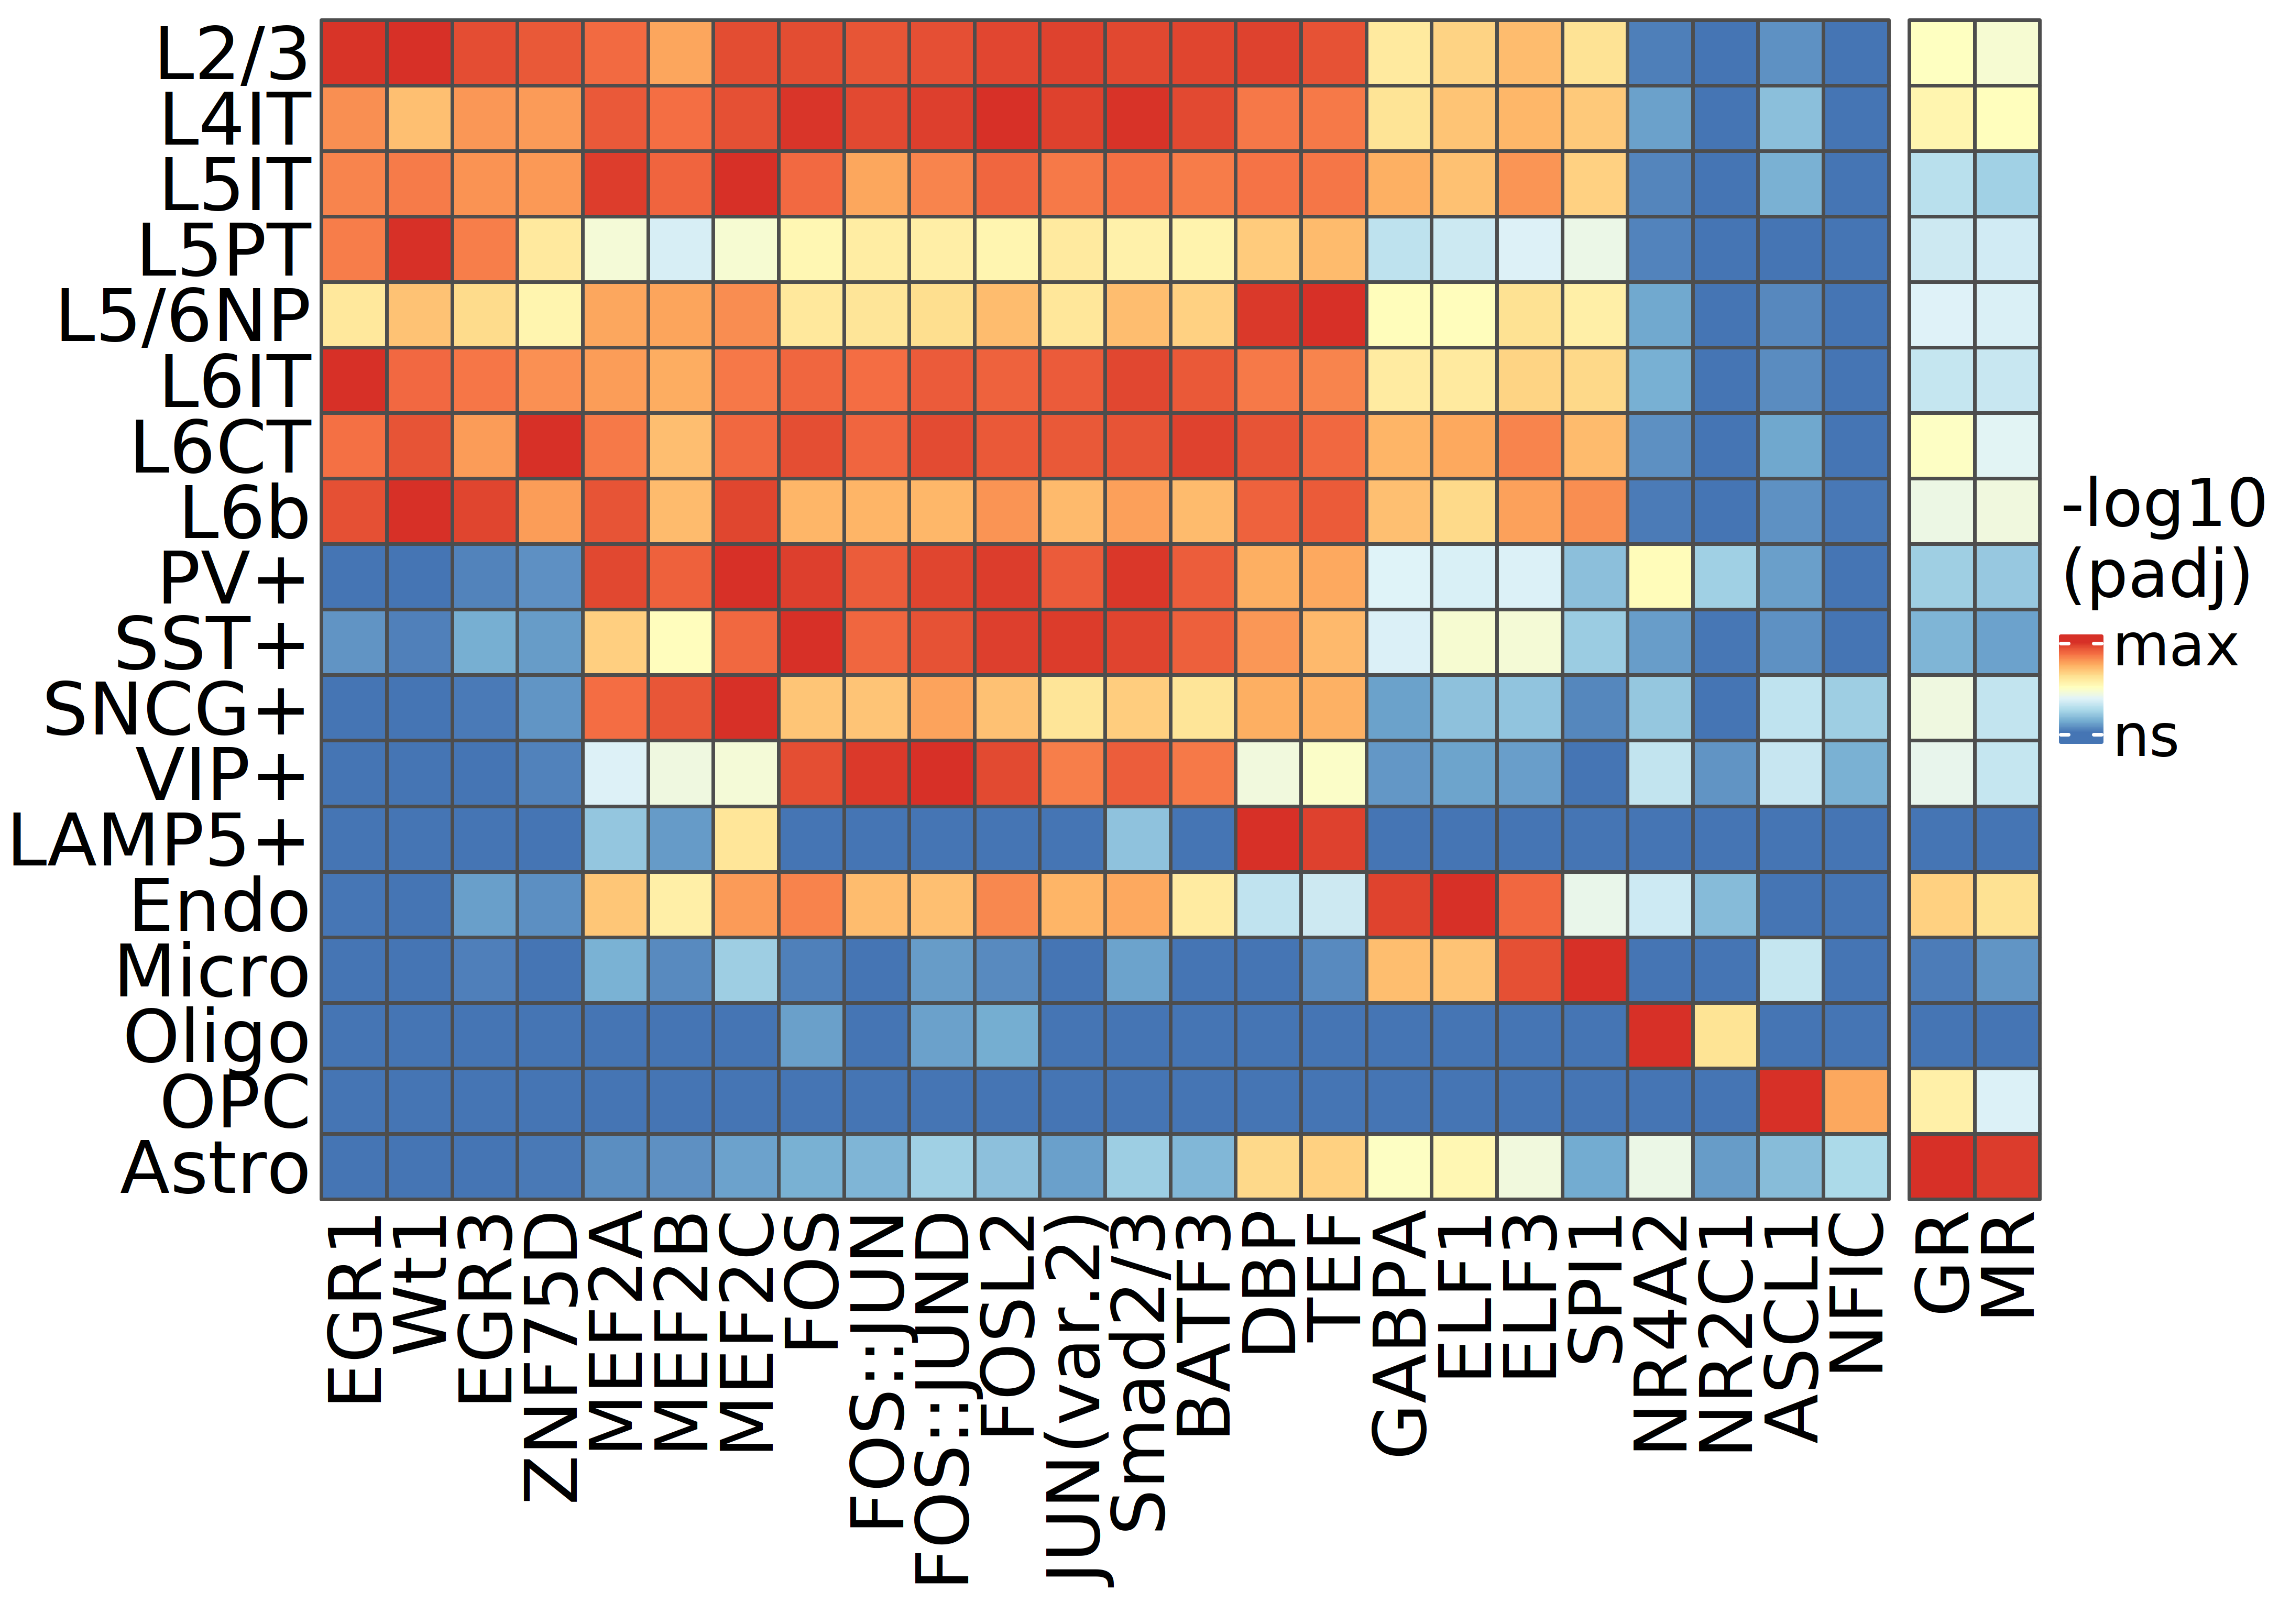

In [38]:
options(repr.plot.width = 8.7, repr.plot.height = 6.2,repr.plot.res=500)

col_fun = colorRamp2(seq(0, 1,length.out=9), rev(brewer.pal(9, "RdYlBu")))

p <- ComplexHeatmap::pheatmap(plot_df_cast_reorder, 
         color = col_fun,
         cluster_rows = F,
         cluster_cols = F,
         fontsize = 20,
        column_split = c(rep("Group1", 24), rep("Group2", 2)),
        column_gap = unit(2, "mm"),
        column_title = NULL,
        row_names_side = "left",
        border_color = 'grey30',
        legend=F,
         show_rownames = T)


custom_lgd <- Legend(
    col_fun = col_fun,
  title = "-log10\n(padj)",
  legend_height = unit(0.1, "cm"),
  legend_width = unit(.5, "cm"),  
  at = c(0,1),
  title_position = "topleft",
  labels = c('ns','max'),
  title_gp = gpar(fontsize = 18),
  labels_gp = gpar(fontsize = 16),
  title_gap = unit(4, "mm")  # <-- This WILL work here
)

draw(p, heatmap_legend_side="right",  heatmap_legend_list = list(custom_lgd))

# Generate astrocyte GR chromVAR line plots, separately for V1 & PFC for Fig. 3h

In [ ]:
human_multiome_group_chromvar <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250423_human_multiome_jaspar_V2_peaks_group_chromvar.rds')

In [ ]:
DefaultAssay(human_multiome_group_chromvar) <- 'chromvar_peaks_group'

In [223]:
# keep only chromvar assay for analysis (to prevent memory issue)
human_multiome_group_chromvar_only <- human_multiome_group_chromvar[['chromvar_peaks_group']]

In [224]:
# Convert to seurat object
human_multiome_group_chromvar_only_seu <- CreateSeuratObject(human_multiome_group_chromvar_only)
human_multiome_group_chromvar_only_seu@meta.data <- human_multiome_group_chromvar@meta.data

Warning message:
"Layer counts isn't present in the assay object; returning NULL"


In [225]:
human_multiome_group_chromvar_only_seu_astro <- subset(human_multiome_group_chromvar_only_seu, subset = subclass == 'Astrocyte')

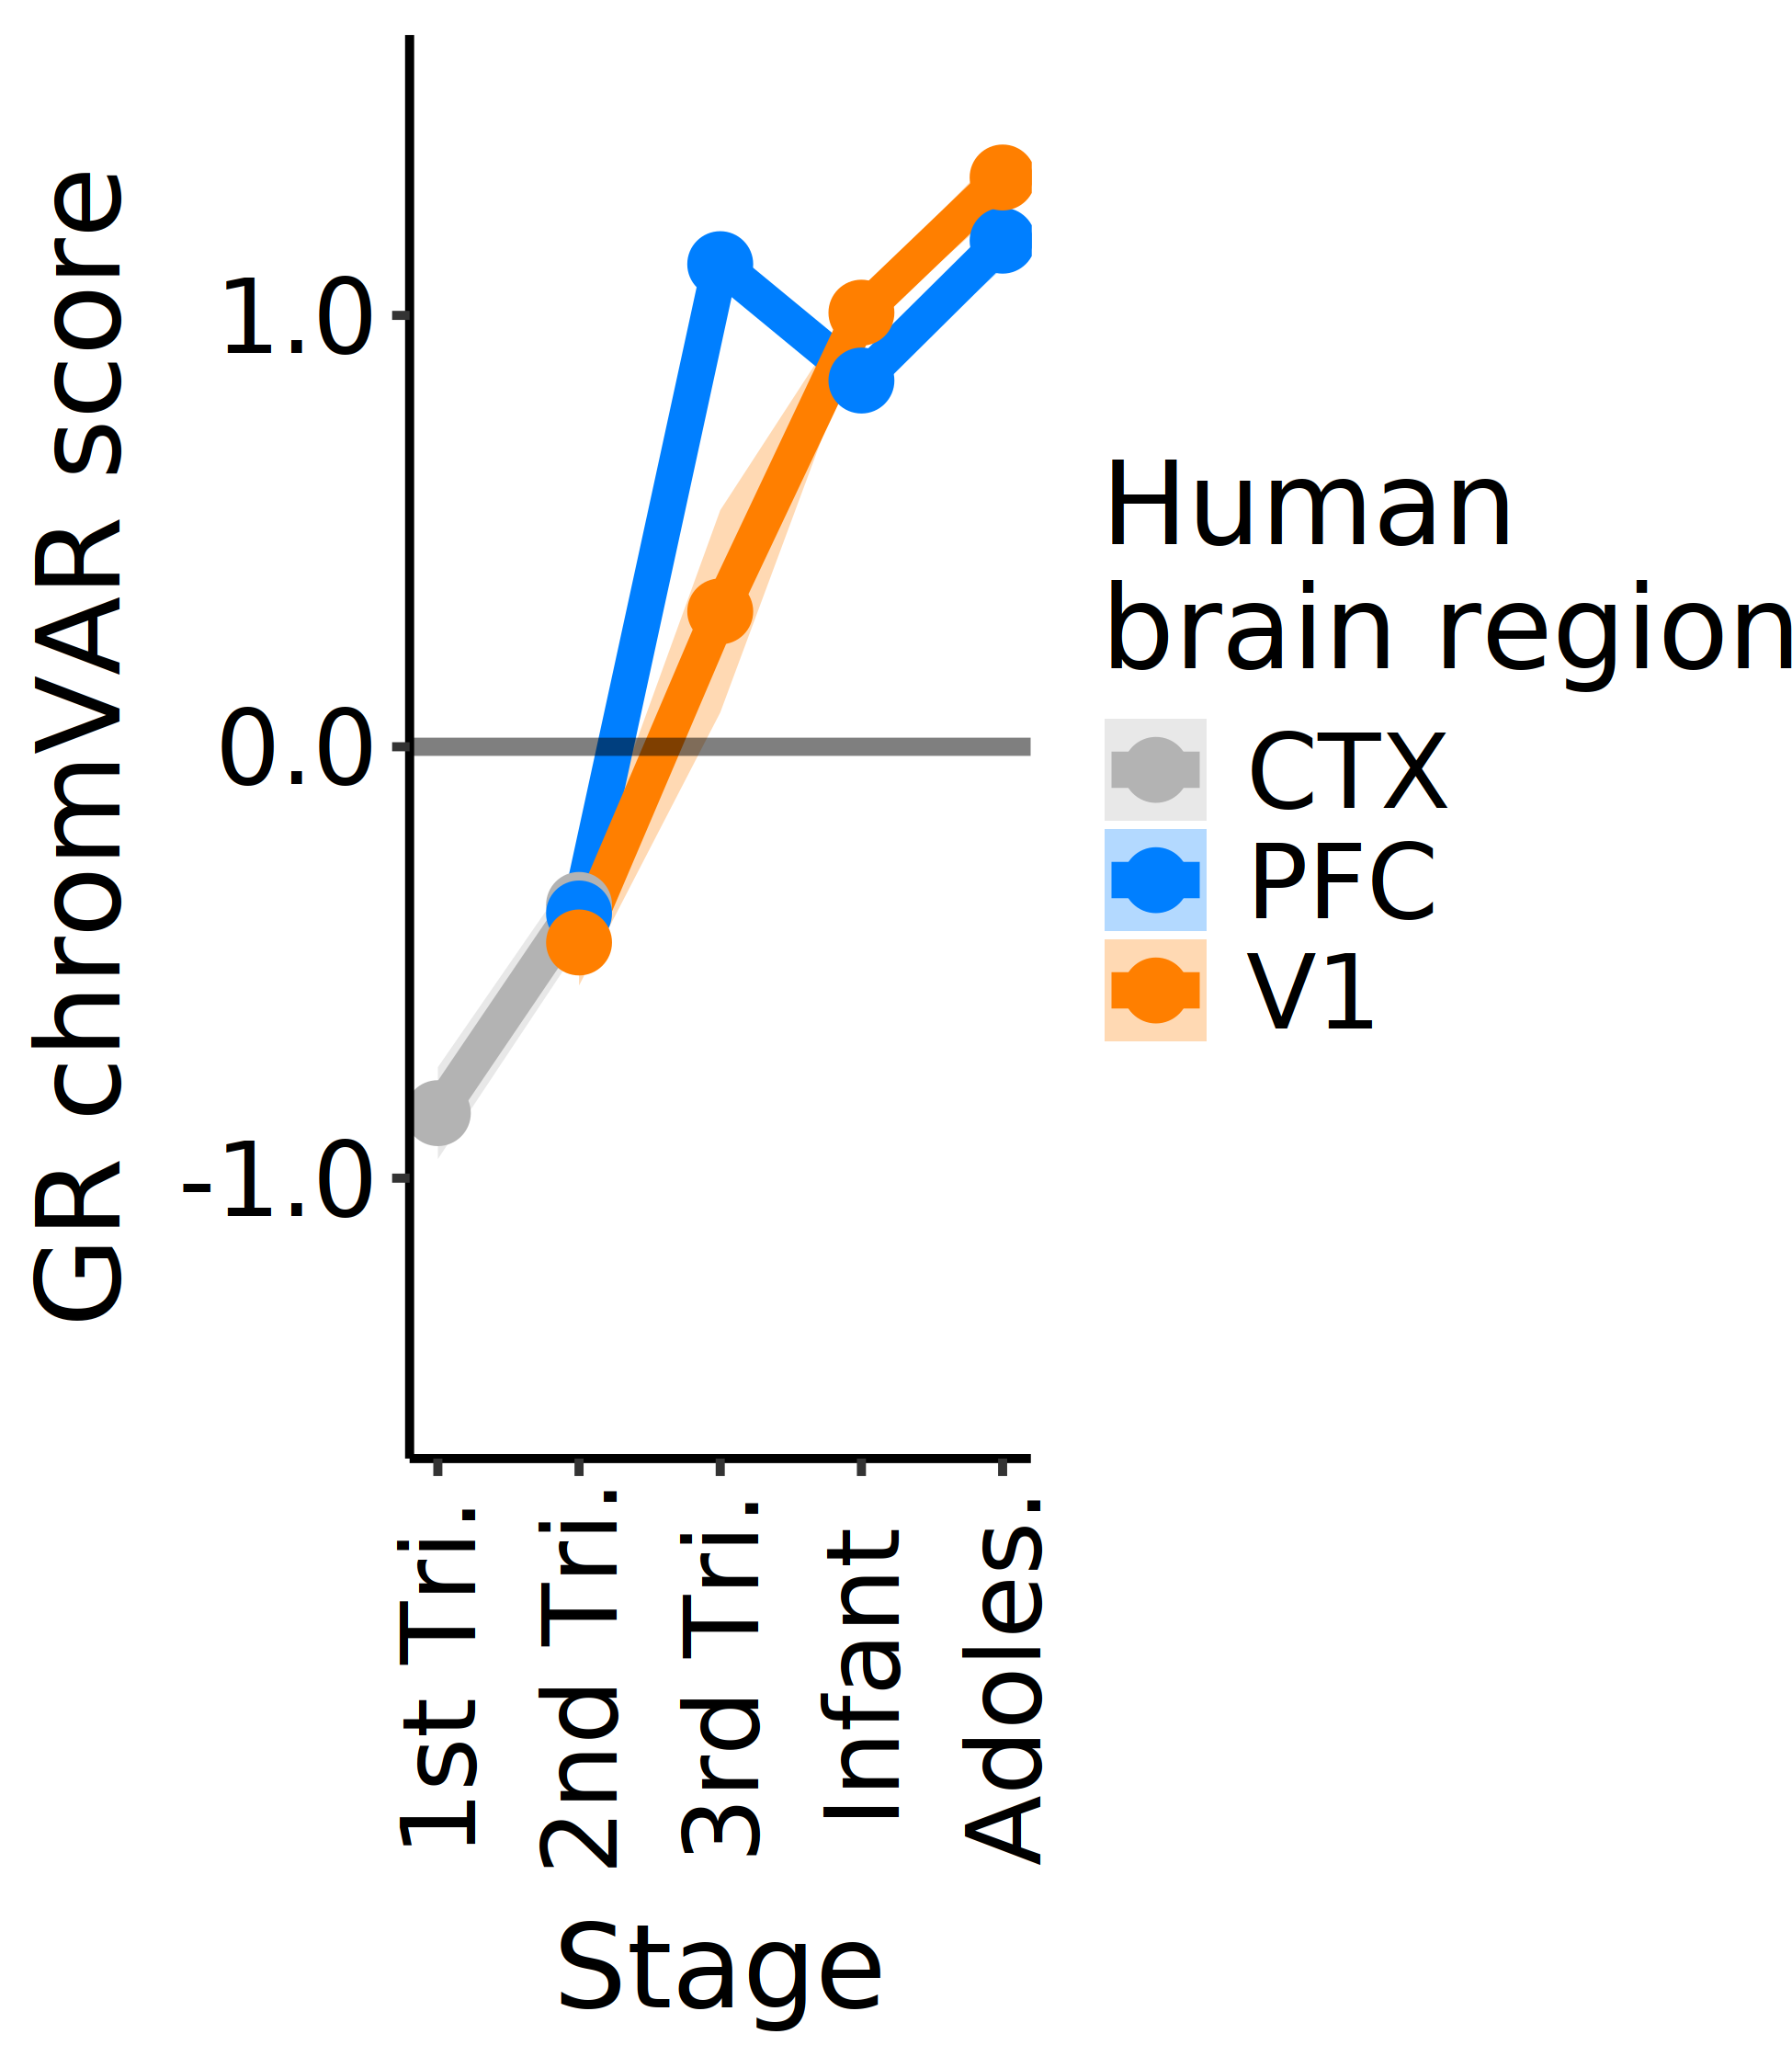

In [238]:
options(repr.plot.width=3.9, repr.plot.height=4.5,repr.plot.res=500)

# Create dataframe of chromvar score
astro_nr3c1_df <- data.frame(counts = GetAssayData(human_multiome_group_chromvar_only_seu_astro, slot = "data")['MA0113.3',],
      Region = human_multiome_group_chromvar_only_seu_astro$region_summary,
      group =  human_multiome_group_chromvar_only_seu_astro$Group,
      pcd =    human_multiome_group_chromvar_only_seu_astro$Estimated_postconceptional_age_in_days)

# Add time variable for plotting
astro_nr3c1_df$Time <- ifelse(astro_nr3c1_df$group=='First_trimester',1,
                        ifelse(astro_nr3c1_df$group=='Second_trimester',2,
                               ifelse(astro_nr3c1_df$group=='Third_trimester',3,
                                      ifelse(astro_nr3c1_df$group=='Infancy',4,5))))

astro_nr3c1_df_summary <- summarySE(astro_nr3c1_df, measurevar="counts", conf.interval = 0.95, groupvars=c("Region","Time"))

# Replace General with CTX for plotting
astro_nr3c1_df_summary$Region <- gsub('General','CTX',astro_nr3c1_df_summary$Region)

scaleFUN <- function(x) sprintf("%.1f", x)

ggplot(astro_nr3c1_df_summary, aes(x=Time, y=counts, colour=Region)) + 
    geom_ribbon(aes(x=as.numeric(Time),ymax = counts + ci, ymin = counts - ci,fill=Region),
              alpha = 0.3,
              linetype=0) + 
    geom_line(aes(group=Region),linewidth=2) +
    geom_point(size=4) + 
geom_hline(yintercept=0,lwd=1,linetype=1,alpha=0.5) + theme_classic() + #+ scale_x_continuous(breaks=seq(7, 35,7)) +
#scale_color_manual(values=rev(c("#DE9B71FF", "#675478FF"))) +
#scale_fill_manual(values=rev(c("#DE9B71FF", "#675478FF"))) +
ylab('GR chromVAR score') +
xlab('Stage') +
scale_y_continuous(labels=scaleFUN) +
theme(legend.position='right',
     axis.text=element_text(size=16,color='black'),
      legend.text=element_text(size=16,color='black'),
      legend.margin=margin(0,8,0,0),
      axis.text.x=element_text(angle=90,vjust=0.5,margin=margin(5,0,0,0)),
     axis.title=element_text(size=18,color='black'),
      legend.title=element_text(size=18,color='black'),
     axis.title.y = element_text(margin = margin(0,5,0,0)),
     axis.title.x = element_text(margin = margin(12,0,0,0))) + coord_cartesian(ylim=c(-1.5,1.5)) + 
scale_x_continuous(breaks=seq(1,5,1),
                   labels = c('1st Tri.',
                           '2nd Tri.',
                           '3rd Tri.',
                           'Infant',
                           'Adoles.')) + 
scale_color_manual(name = "Human\nbrain region", values=c('grey70',
                            paletteer::paletteer_d("colorBlindness::Blue2Orange8Steps")[1],
                            paletteer::paletteer_d("colorBlindness::Blue2Orange8Steps")[8]))+
scale_fill_manual(name = "Human\nbrain region", values=c('grey70',
                            paletteer::paletteer_d("colorBlindness::Blue2Orange8Steps")[1],
                            paletteer::paletteer_d("colorBlindness::Blue2Orange8Steps")[8]))

Warning message:
"The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>."


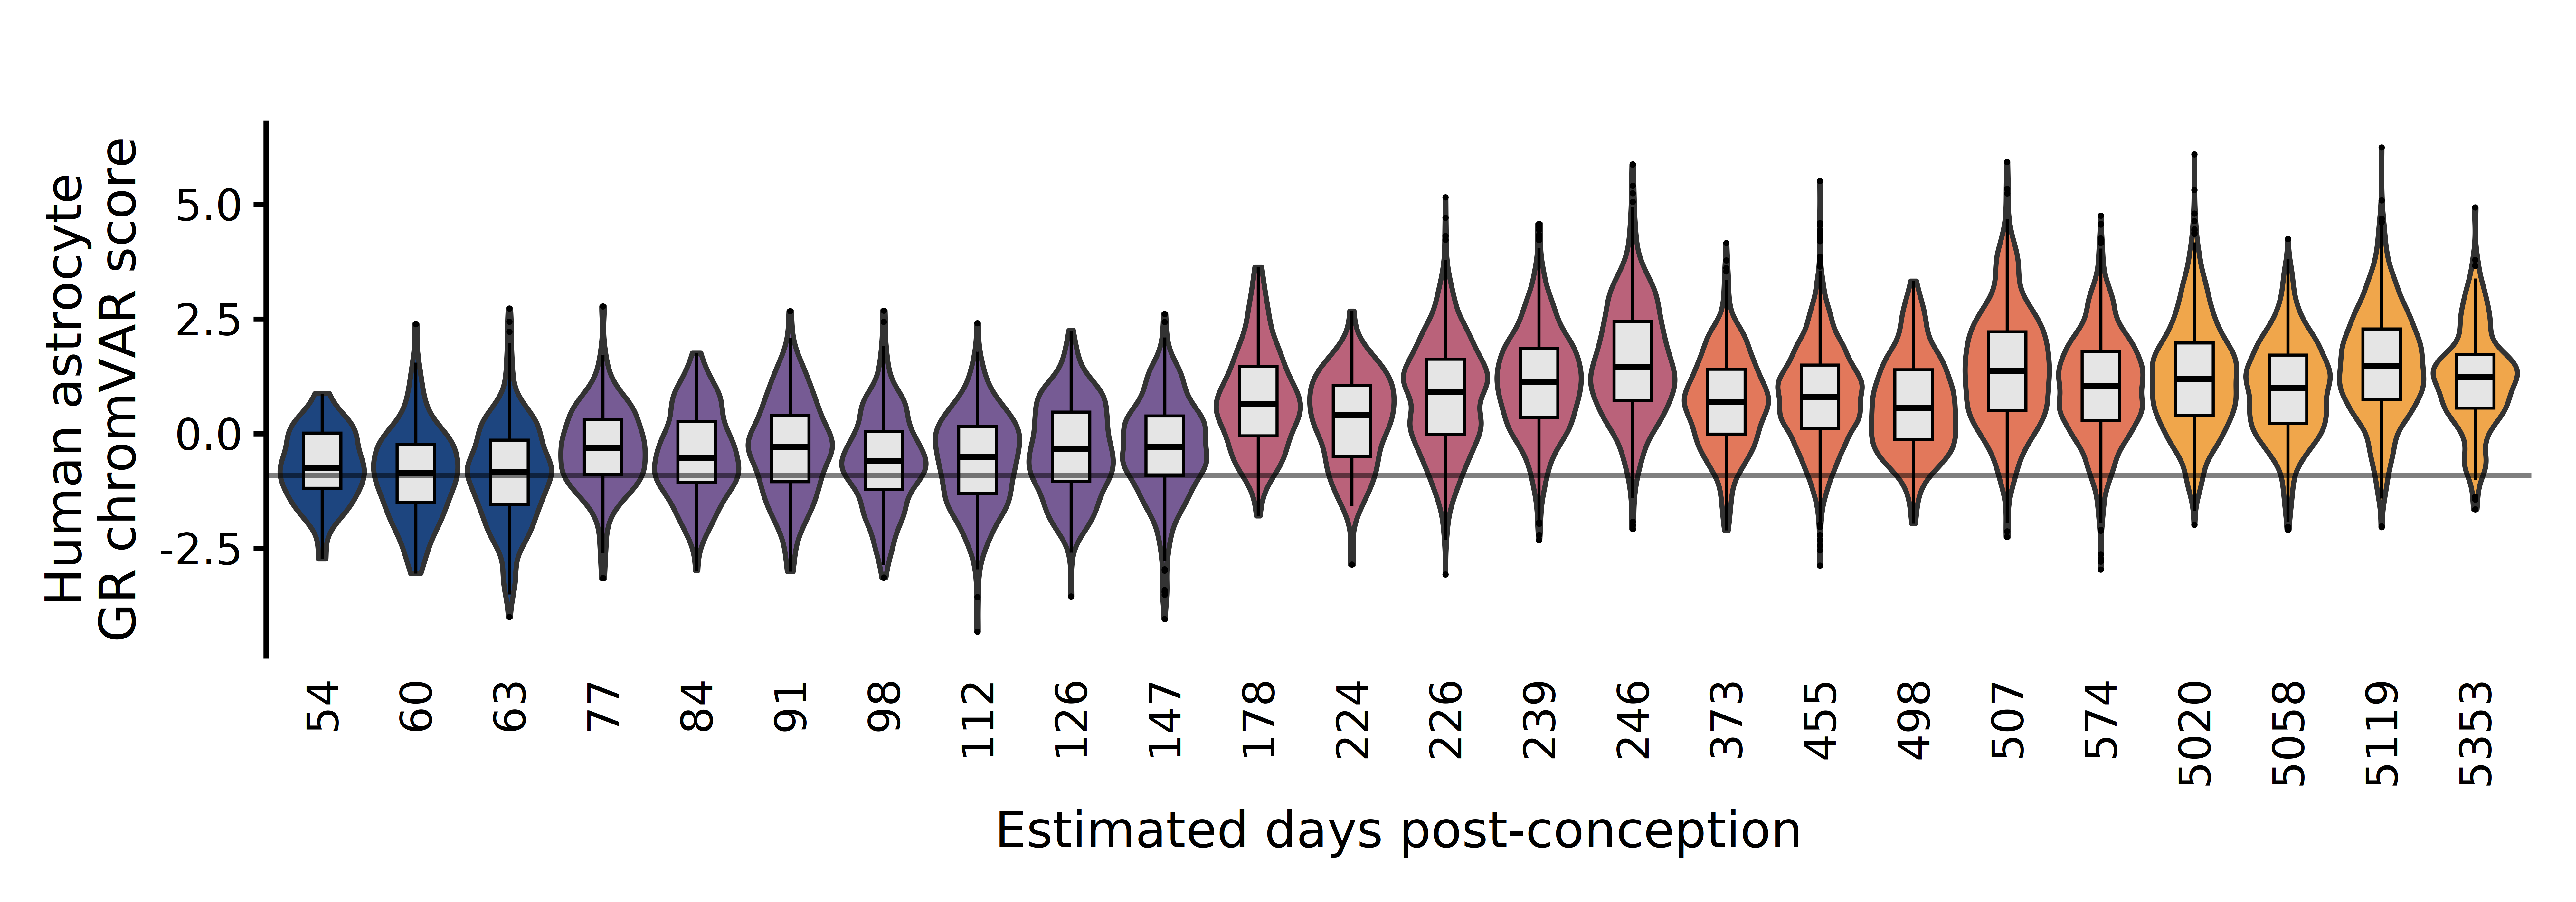

In [239]:
options(repr.plot.width = 10, repr.plot.height = 3.5, repr.plot.res = 800)

VlnPlot(human_multiome_group_chromvar_only_seu_astro, group.by='Estimated_postconceptional_age_in_days', features= 'MA0113.3',pt.size=0) + 
ggtitle('') + 
theme(legend.position = 'none',
     axis.ticks.x = element_blank(),
      axis.title = element_text(size=14,color='black'),
      axis.title.x = element_text(margin=margin(10,0,0,0)),
      axis.text = element_text(size=12,color='black'),
      axis.text.x = element_text(color='black',angle=90,hjust=1,vjust=0.5),
     axis.line.x=element_blank()) + 
geom_boxplot(fill='grey90',outlier.size=0,width=0.4,lwd=0.3,color='black') + 
geom_hline(yintercept=-.9,alpha=0.5) +
ylab('Human astrocyte\nGR chromVAR score') + 
xlab('Estimated days post-conception') + 
scale_fill_manual(values = c(rep(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[1],3),
                             rep(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[8],7),
                             rep(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[12],5),
                             rep(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[17],5),
                             rep(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[23],4)))

# Plot chromVAR results for astrocytes as separate volcano plots for V1 & PFC for Ext. Fig.10

In [226]:
# Run chromVAR separately on V1 & PFC astrocytes
human_multiome_group_chromvar_only_seu_astro <- subset(human_multiome_group_chromvar_only_seu, subset = subclass == 'Astrocyte')

In [227]:
V1_astro <- human_multiome_group_chromvar_only_seu_astro[,human_multiome_group_chromvar_only_seu_astro$region_summary %in% c('General','V1')]
PFC_astro <- human_multiome_group_chromvar_only_seu_astro[,human_multiome_group_chromvar_only_seu_astro$region_summary %in% c('General','PFC')]

In [233]:
V1_astro

An object of class Seurat 
746 features across 4726 samples within 1 assay 
Active assay: RNA (746 features, 0 variable features)
 1 layer present: data

In [248]:
# Test in V1 astrocytes
Idents(V1_astro) <- 'Group'
test_V1_astro <- FindMarkers(
                        object = V1_astro,
                        ident.1 = 'Adolescence',
                        ident.2 = 'First_trimester',
                        mean.fxn = rowMeans,
                        test.use='MAST',
                        fc.name = "avg_diff")

DefaultAssay(human_multiome_group_chromvar) <-'peaks_group_filt'
test_V1_astro$TF <- ConvertMotifID(Motifs(human_multiome_group_chromvar),id=rownames(test_V1_astro))

# Test in PFC astrocytes
Idents(PFC_astro) <- 'Group'
test_PFC_astro <- FindMarkers(
                        object = PFC_astro,
                        ident.1 = 'Adolescence',
                        ident.2 = 'First_trimester',
                        mean.fxn = rowMeans,
                        test.use='MAST',
                        fc.name = "avg_diff")

test_PFC_astro$TF <- ConvertMotifID(Motifs(human_multiome_group_chromvar),id=rownames(test_PFC_astro))


 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [==>-----------------------------------------]   8% with 0 failures

 Completed [===>----------------------------------------]   8% with 0 failures

 Completed [===>----------------------------------------]   9% with 0 failures

 Completed [===>----------------------------------------]  10% with 0 failures

 Completed [====>---------------------------------------]  10% with 0 failures

 Completed [====>---------------------------------------]  11% with 0 failures

 Completed [====>---------------------------------------]  12% with 0 failures

 Completed [=====>--------------------------------------]  13% with 0 failures

 Completed [=====>--------------------------------------]  14% with 0 failures

 Completed [=====>--------------------------------------]  15% with 0 failures

 Completed [======>-------------------------------------]  15% with 0 failures

 Completed [======>--------------------

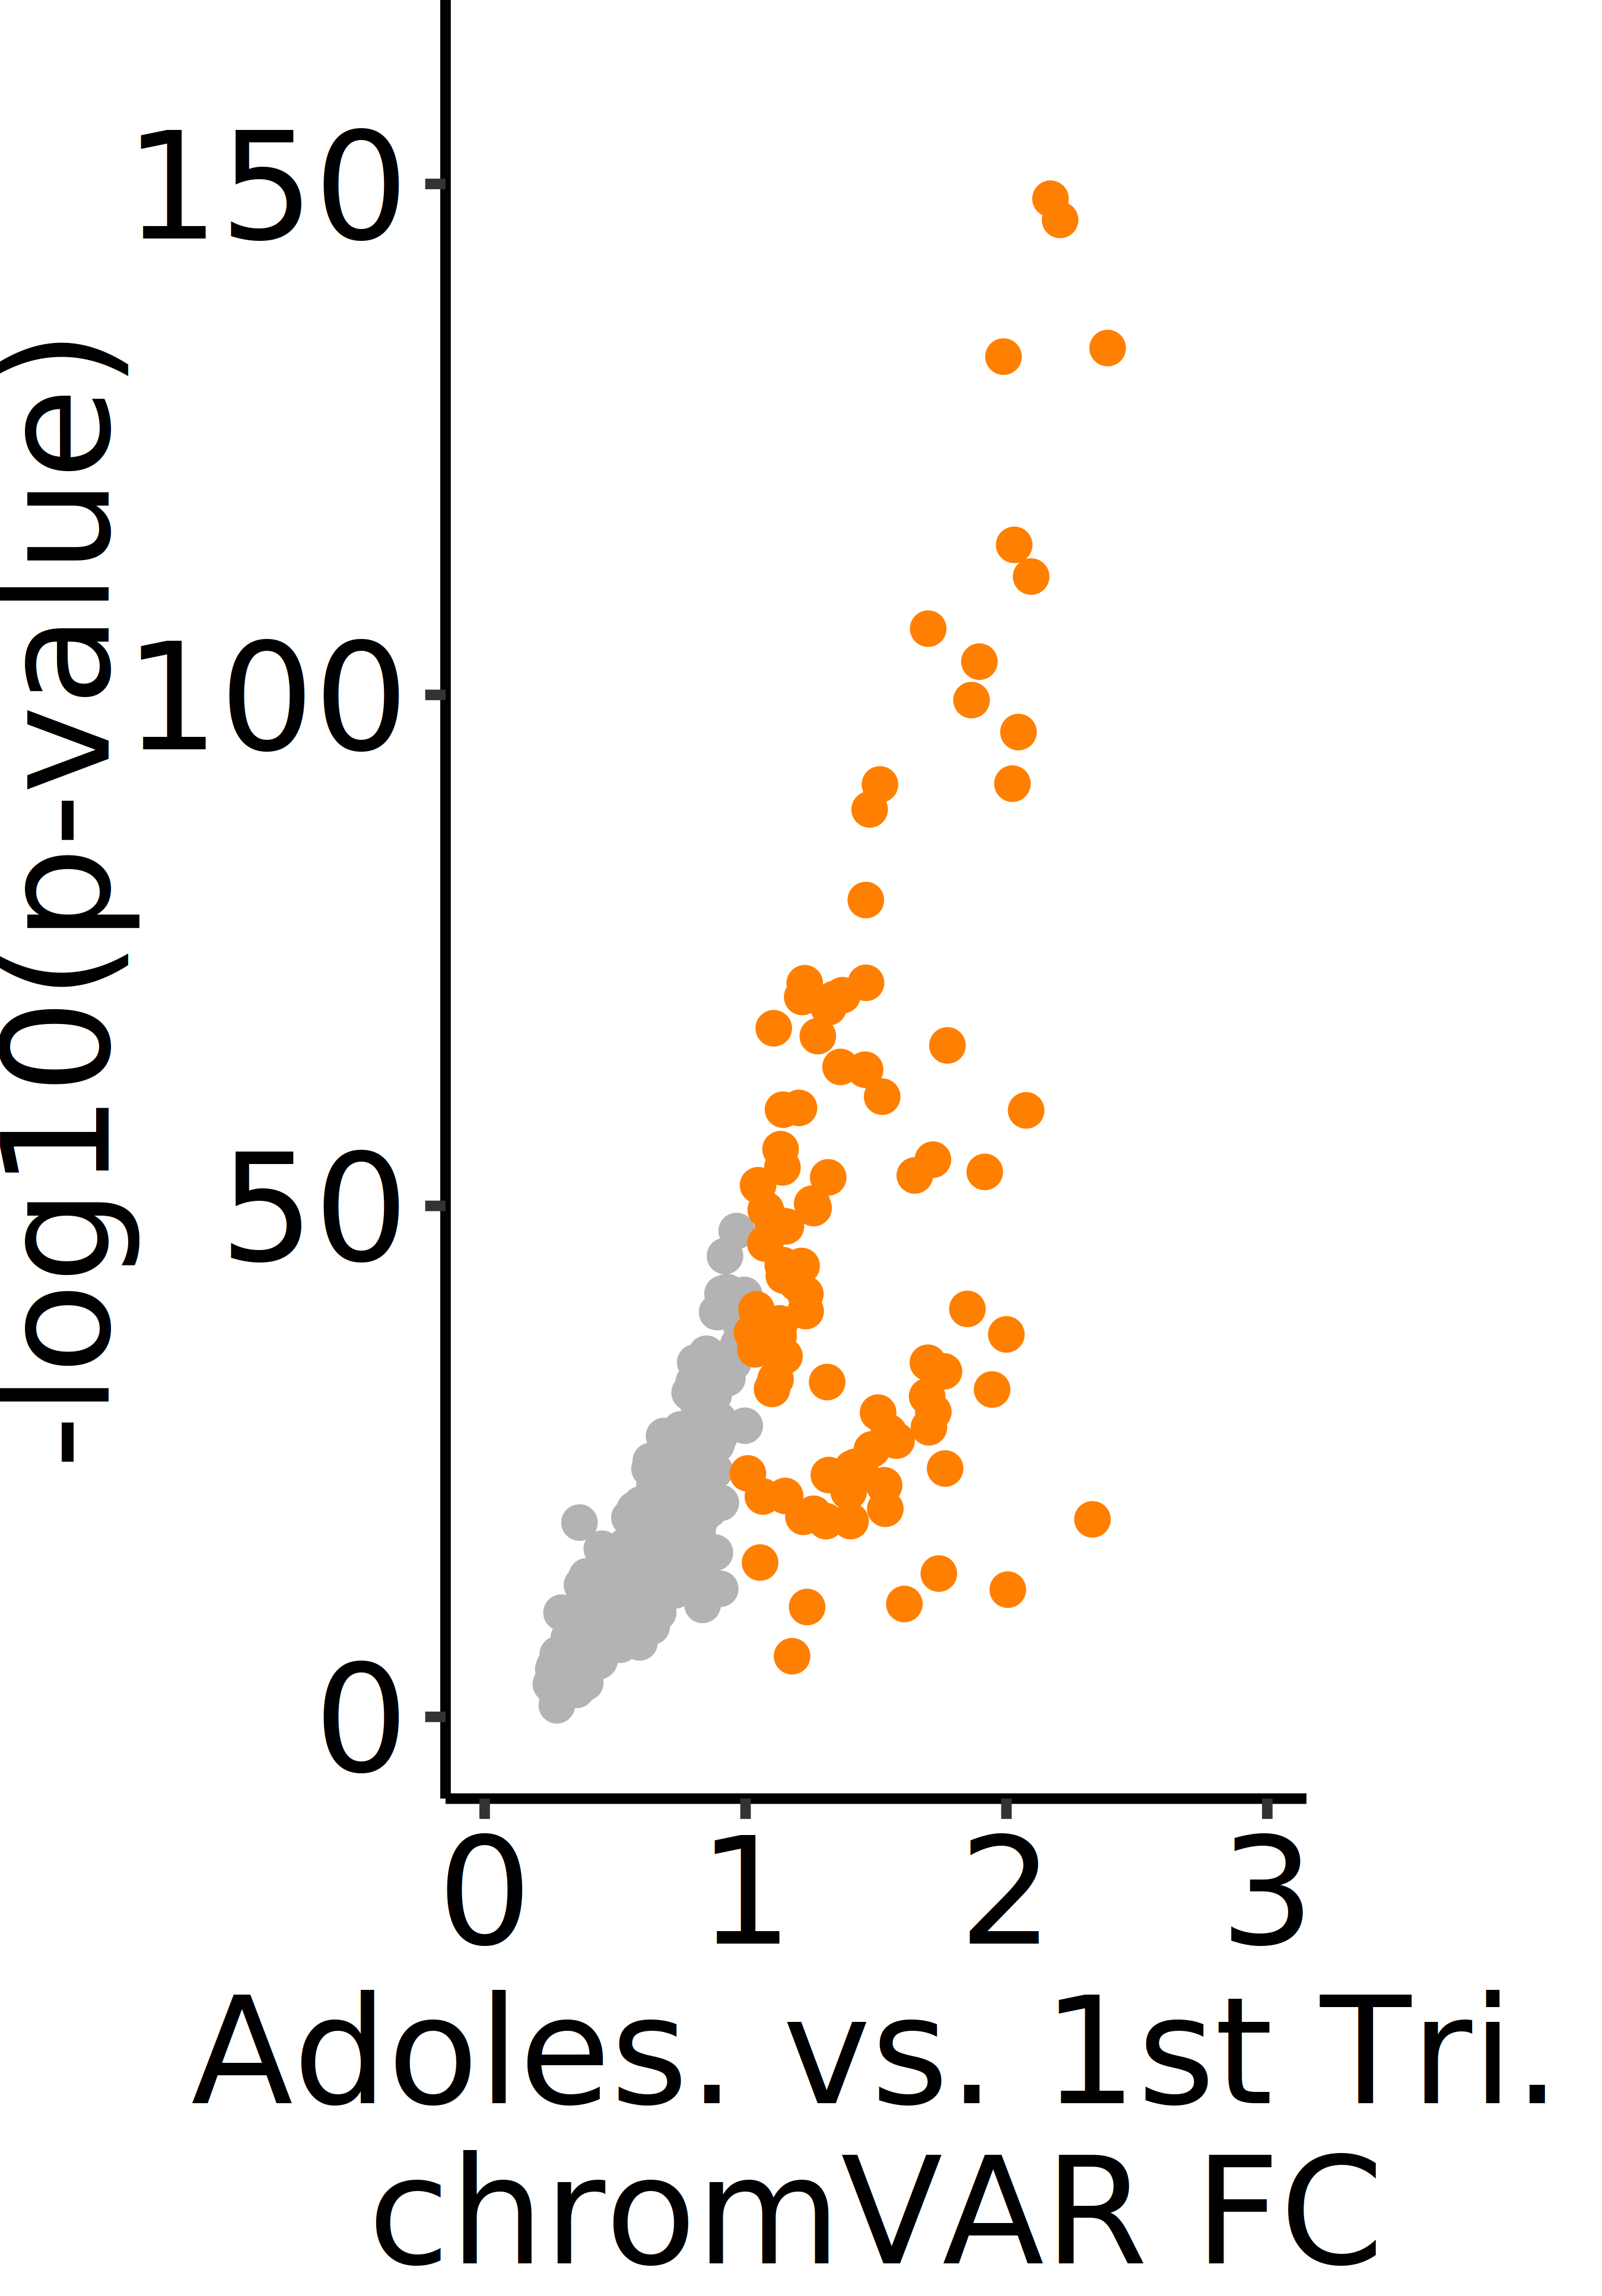

In [257]:
# Make Volcano plot
options(repr.plot.width=3, repr.plot.height=4.3,repr.plot.res=900)

# Add a column of NAs
test_V1_astro$significant <- "NO"
# Set differential motifs to "induced or repressed"
test_V1_astro$significant[ (test_V1_astro$avg_diff > 1) & (test_V1_astro$p_val_adj < 0.01)] <- "Up"
test_V1_astro$significant[ (test_V1_astro$avg_diff < -1) & (test_V1_astro$p_val_adj < 0.01)] <- "Down"
test_V1_astro$significant <- factor(test_V1_astro$significant, levels = c("NO","Up","Down"))

test_pos <- test_V1_astro[test_V1_astro$avg_diff>0,]

p8 <- ggplot(data = test_pos %>% arrange(significant), aes(x = avg_diff, y = -log10(p_val), col = significant)) + geom_point() + 
    theme_classic() + 
    scale_color_manual(values = c("grey70",paletteer::paletteer_d("colorBlindness::Blue2Orange8Steps")[8])) +
    theme(axis.text = element_text(size = 20, color = 'black'),
          axis.title = element_text(size = 20),
          #axis.line = element_line(size = 1),
          #axis.ticks.length=unit(.25, "cm"),
          plot.margin=margin(0,40,0,0),
          plot.title = element_text(size = 20, hjust = 0.5),
          legend.position = 'None') +
    xlab('Adoles. vs. 1st Tri.\nchromVAR FC') +
    ylab('-log10(p-value)') + ylim(c(0,160)) + xlim(c(0,3))
    #ggtitle(paste0(cti, ' vision-dependent genes')) +
p8

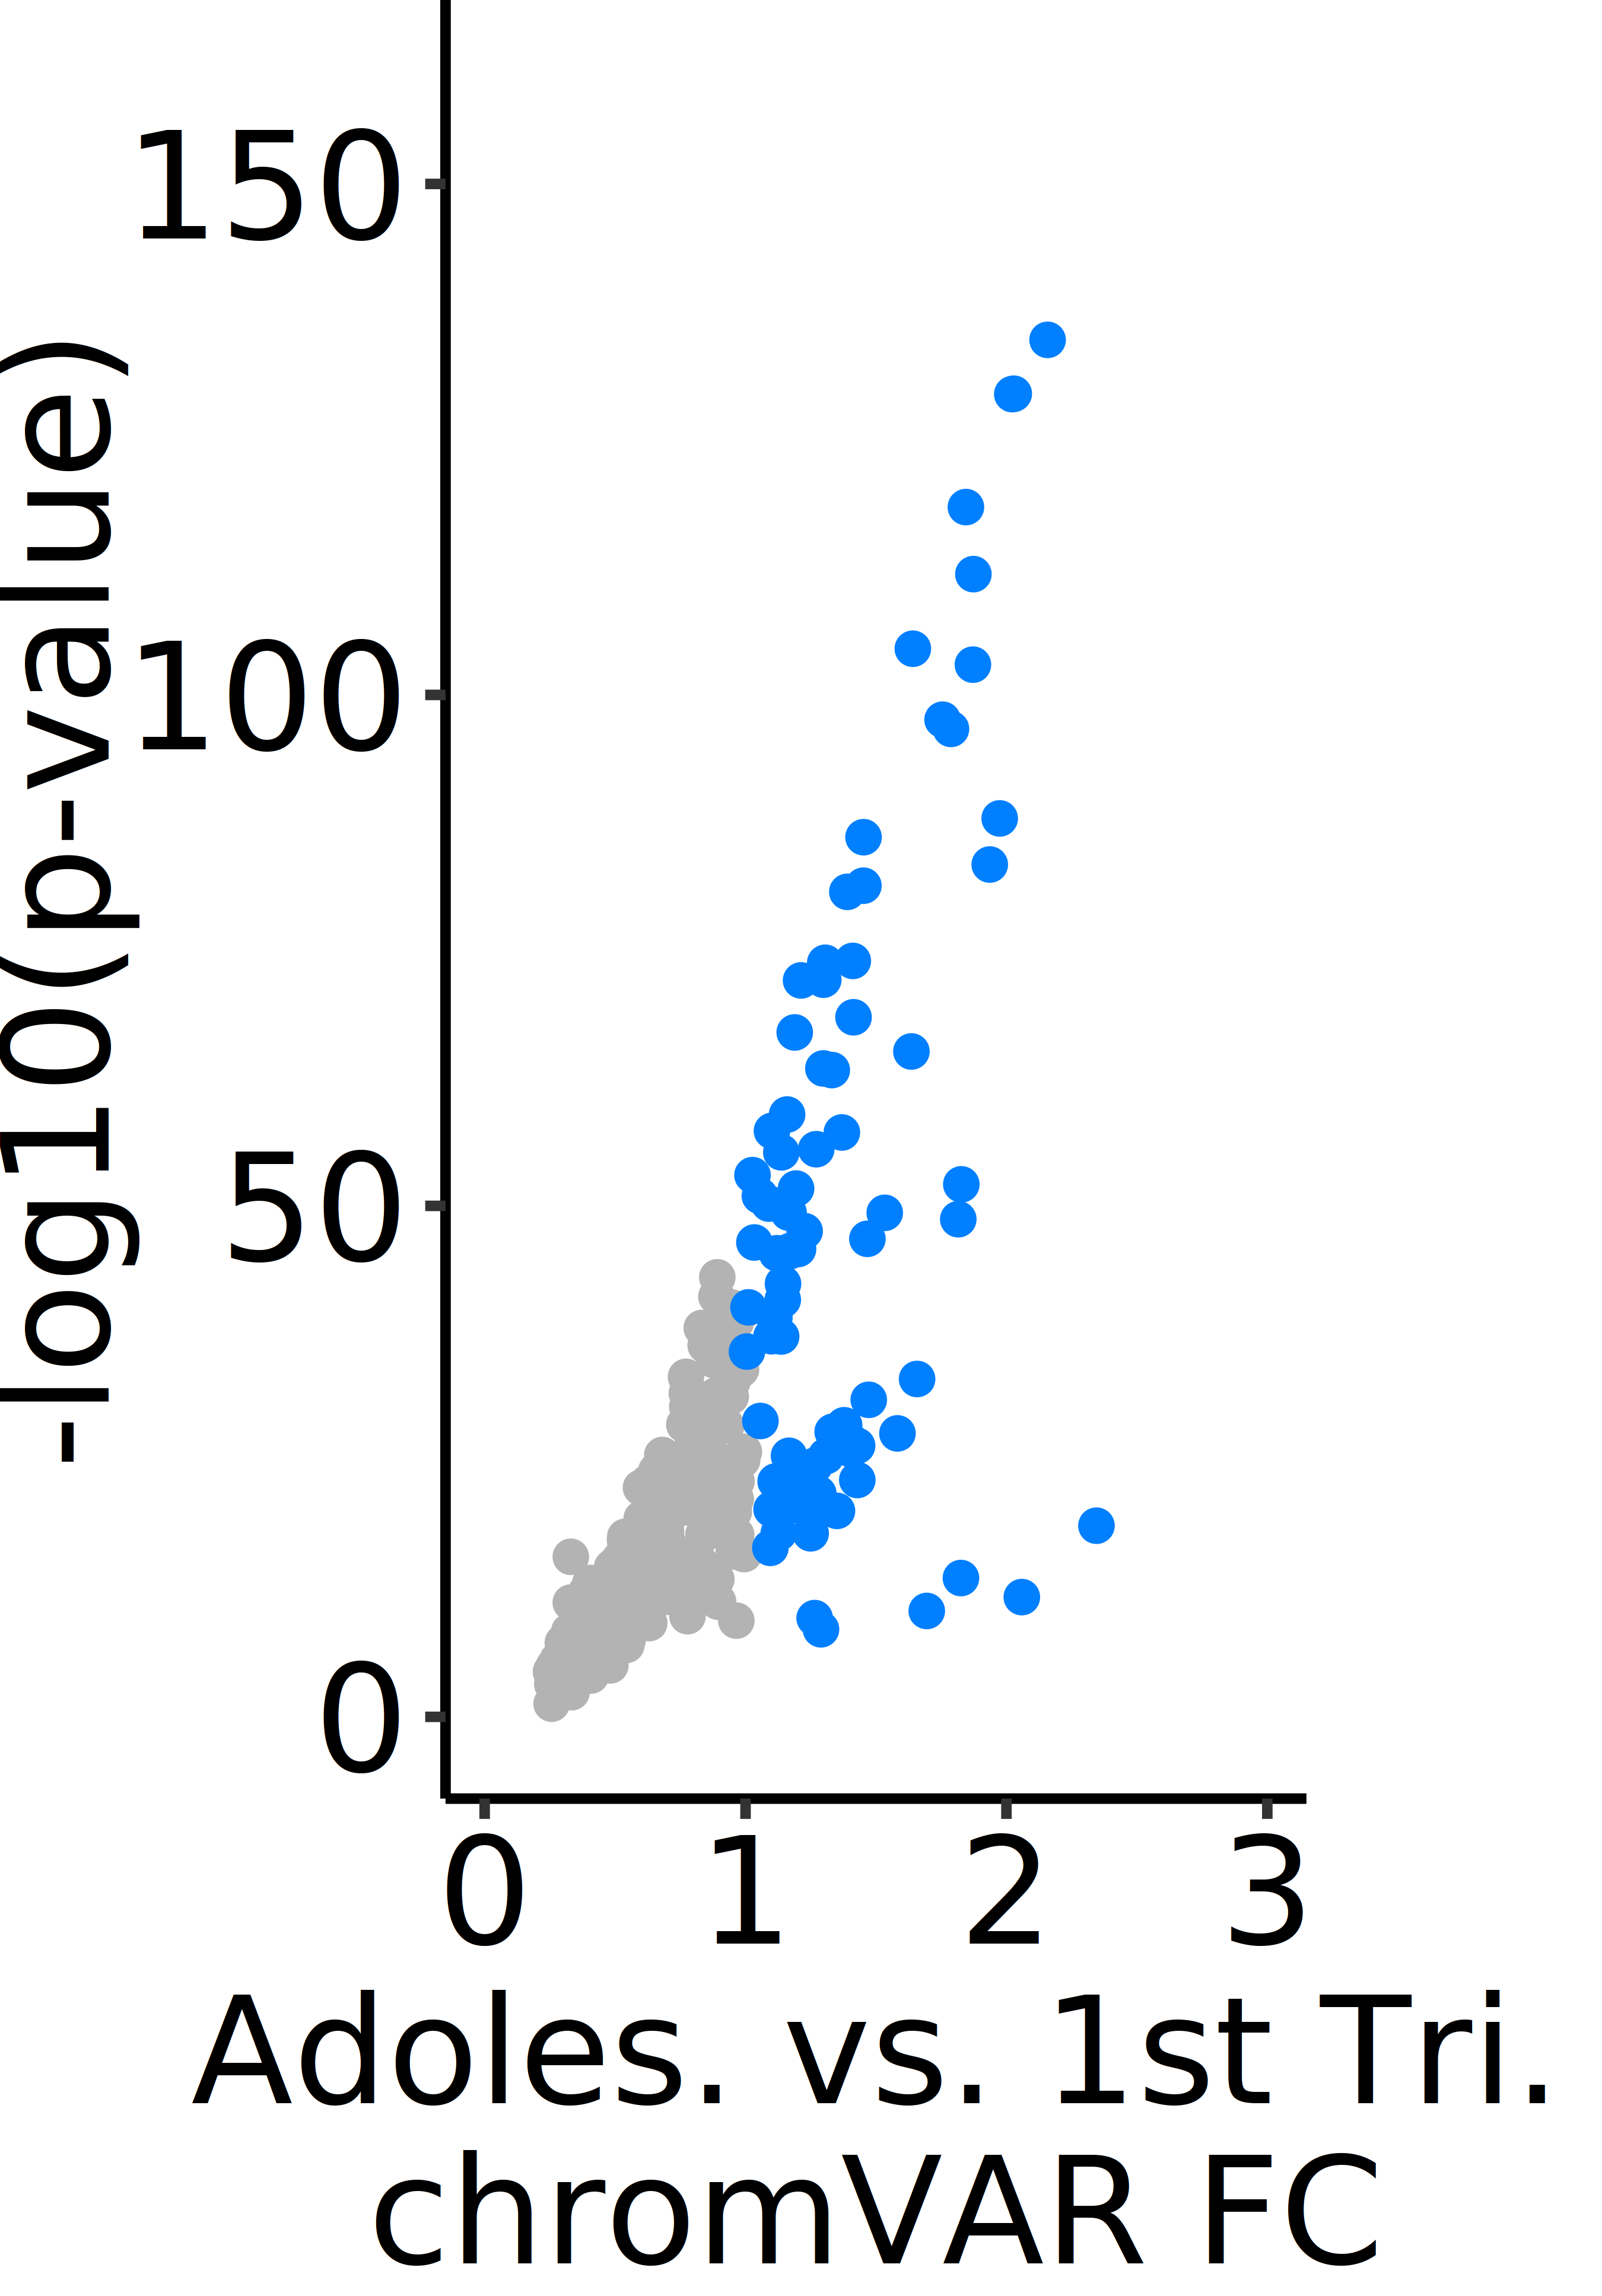

In [258]:
# Make Volcano plot
options(repr.plot.width=3, repr.plot.height=4.3,repr.plot.res=900)

# Add a column of NAs
test_PFC_astro$significant <- "NO"
# Set differential motifs to "induced or repressed"
test_PFC_astro$significant[ (test_PFC_astro$avg_diff > 1) & (test_PFC_astro$p_val_adj < 0.01)] <- "Up"
test_PFC_astro$significant[ (test_PFC_astro$avg_diff < -1) & (test_PFC_astro$p_val_adj < 0.01)] <- "Down"
test_PFC_astro$significant <- factor(test_PFC_astro$significant, levels = c("NO","Up","Down"))

test_pos <- test_PFC_astro[test_PFC_astro$avg_diff>0,]

p8 <- ggplot(data = test_pos %>% arrange(significant), aes(x = avg_diff, y = -log10(p_val), col = significant)) + geom_point() + 
    theme_classic() + 
    scale_color_manual(values = c("grey70",paletteer::paletteer_d("colorBlindness::Blue2Orange8Steps")[1])) +
    theme(axis.text = element_text(size = 20, color = 'black'),
          axis.title = element_text(size = 20),
          #axis.line = element_line(size = 1),
          #axis.ticks.length=unit(.25, "cm"),
          plot.margin=margin(0,40,0,0),
          plot.title = element_text(size = 20, hjust = 0.5),
          legend.position = 'None') +
    xlab('Adoles. vs. 1st Tri.\nchromVAR FC') +
    ylab('-log10(p-value)') + ylim(c(0,160)) + xlim(c(0,3))
    #ggtitle(paste0(cti, ' vision-dependent genes')) +
p8

# Compute developmental DEGs for Fig. 3i & Ext. Fig. 10

In [3]:
# Read RDS file w/motif object for astrocyte-called peaks
human_multiome_astro_v2 <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250427_human_multiome_astro_v2.rds')

In [88]:
# Aggregate counts
human_multiome_astro_agg <- AggregateExpression(human_multiome_astro_v2,
                                                assays = 'RNA',
                                                group.by = 'Ident',
                                                slot='counts',
                                                return.seurat = TRUE)

In [89]:
# Create metadata
meta_df <- unique(data.frame(human_multiome_astro_v2@meta.data[human_multiome_astro_v2$Ident %in% human_multiome_astro_v2$Ident,'Ident'],
           human_multiome_astro_v2@meta.data[human_multiome_astro_v2$Ident %in% human_multiome_astro_v2$Ident,c('Group','region_summary')]))
metadata_df <- data.frame(Sample = meta_df[,1],
                          Group = meta_df[,2],
                          Region = meta_df[,3],
                          Group_region = paste0(meta_df[,2], '_', meta_df[,3]))

In [90]:
# Run DESeq2 analysis (use this to match DESeq analysis used for bulk astrocyte RNA-seq)
deseq_obj <- DESeqDataSetFromMatrix(countData = GetAssayData(human_multiome_astro_agg,slot='counts'),
                              colData = metadata_df[match(colnames(GetAssayData(human_multiome_astro_agg,slot='counts')),metadata_df$Sample),],
                              design = ~ Group)

#smallestGroupSize <- 3
#keep <- rowSums(counts(deseq_obj) >= 50) >= smallestGroupSize
#deseq_obj <- deseq_obj[keep,]

converting counts to integer mode



In [91]:
# Run Deseq2
deseq_obj <- DESeq(deseq_obj)
resdf <- na.omit(as.data.frame(results(deseq_obj,   contrast=c("Group","Adolescence","First_trimester"),lfcThreshold=1)))

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 8 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [92]:
# Normalize data
ntd <- normTransform(deseq_obj)

In [93]:
# Compute mean expression per group for plotting
df <- data.frame(First_trimester = rowMeans(assay(ntd)[,c(13:16)]),
                 Second_trimester = rowMeans(assay(ntd)[,c(1:11)]),
                 Third_trimester = rowMeans(assay(ntd)[,c(12,21,36:38)]),
                 Infant = rowMeans(assay(ntd)[,c(17:20,24:29)]),
                 Adolescence = rowMeans(assay(ntd)[,c(22,23,30:35)]))

names(df) <- c('1st Tri.',
               '2nd Tri.',
               '3rd Tri.',
               'Infant',
               'Adoles.')

In [94]:
my_palette <- colorRampPalette(rev(brewer.pal(9,'RdBu')))(1000)  # 1000 colors
my_breaks <- seq(-2, 2, length.out = 1001) 

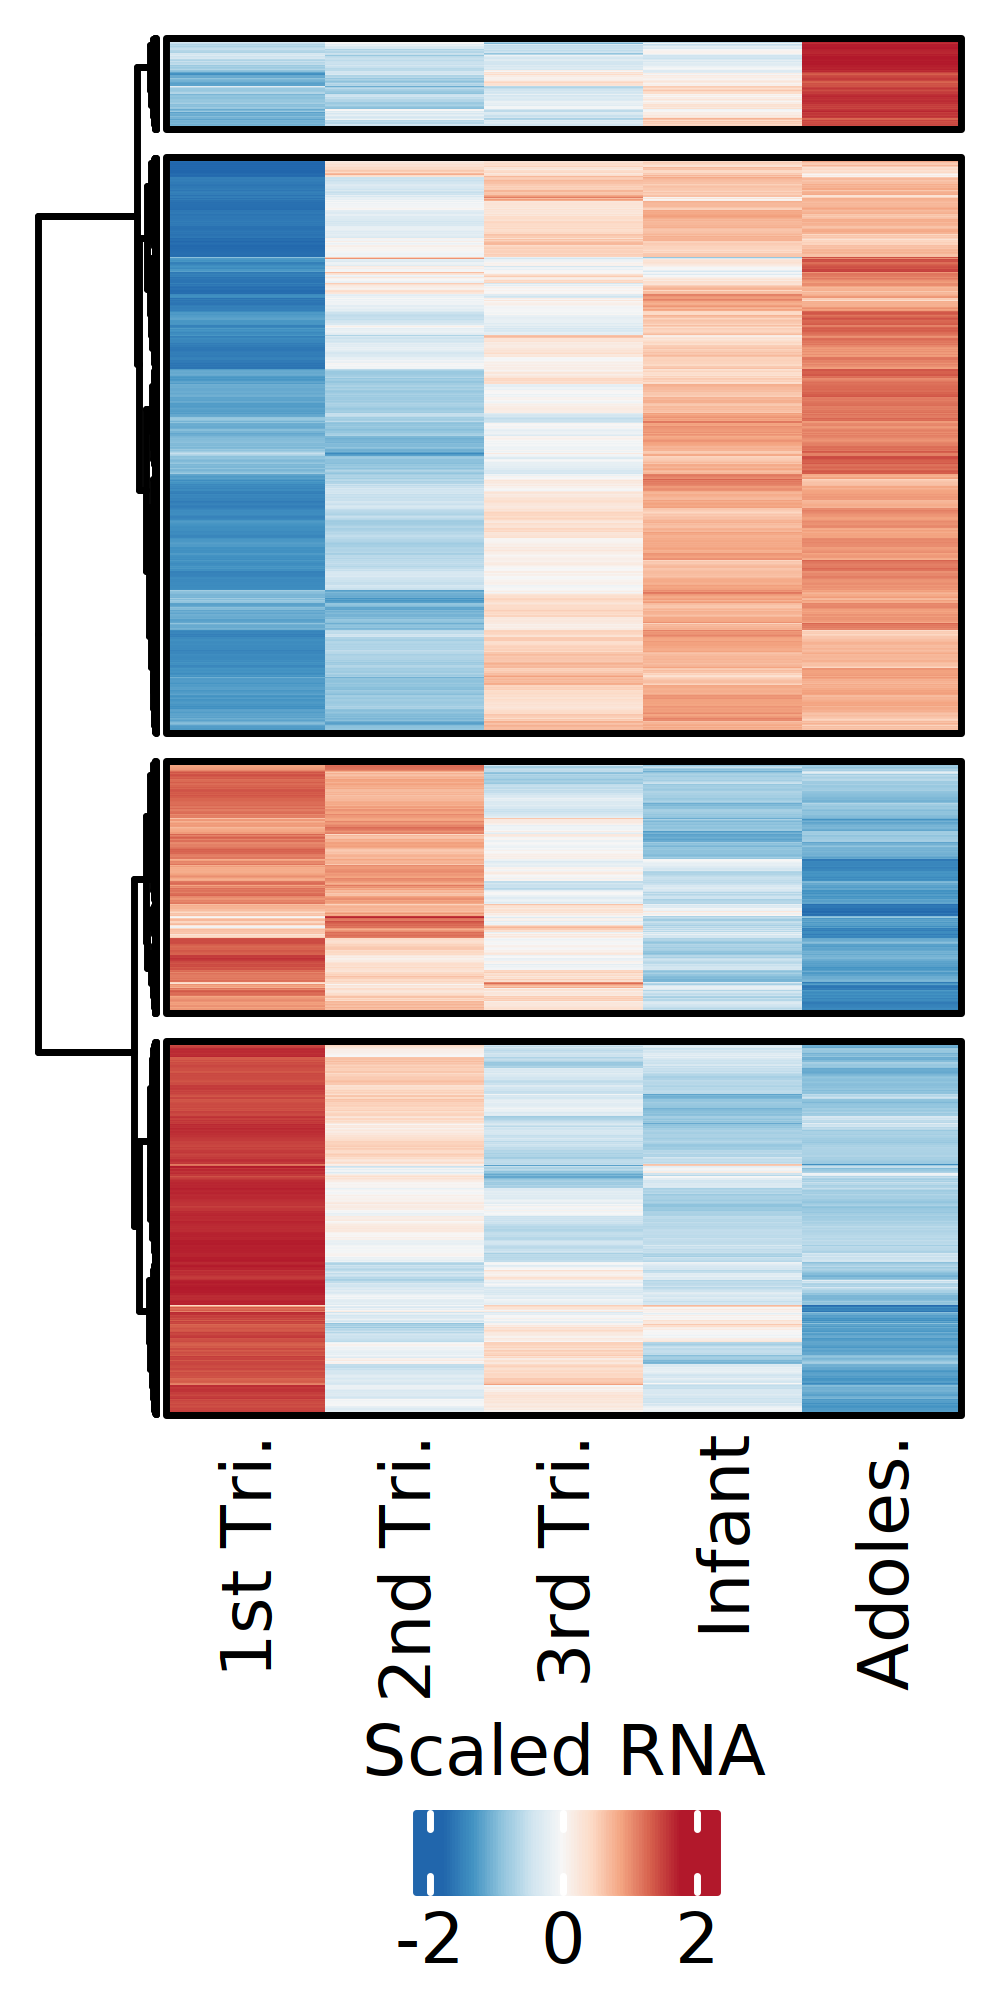

In [95]:
options(repr.plot.width = 2, repr.plot.height = 4,repr.plot.res=500)
t <- df[rownames(resdf[resdf$padj<0.01,]),]
p <- ComplexHeatmap::pheatmap(t(scale(t(t))), 
         cluster_cols = FALSE, 
         color  = my_palette,
         cluster_rows = T,
         clustering_method = 'ward.D2',
         cutree_rows=4,
         treeheight_row = unit(6, "mm"),
         show_rownames = FALSE,
         heatmap_legend_param = list(title = "Scaled RNA",at = c(-2,0,2), 
                                     labels = c('-2','0','2'),
                                     legend_height = unit(1, "cm"),
                                     legend_width = unit(1.5, "cm"),
                                     title_position = "topcenter",
                                     legend_direction = "horizontal", 
                                     title_gp = gpar(fontsize = 10),
                                     labels_gp = gpar(fontsize = 10)),
         border_color=NA,
         border=TRUE)

draw(p, heatmap_legend_side="bottom")

In [96]:
# Extract clustering results
p2 <- pheatmap::pheatmap(t, 
         cluster_cols = FALSE, 
         cluster_rows = T,
         clustering_method = 'ward.D2',
         cutree_rows=4,
         scale = 'row',
                       silent=T)

t.clust <- as.data.frame(cbind(t, 
                      cluster = cutree(p2$tree_row, 
                                       k = 4)))

In [97]:
table(t.clust$cluster)


  1   2   3   4 
439 677 297 108 

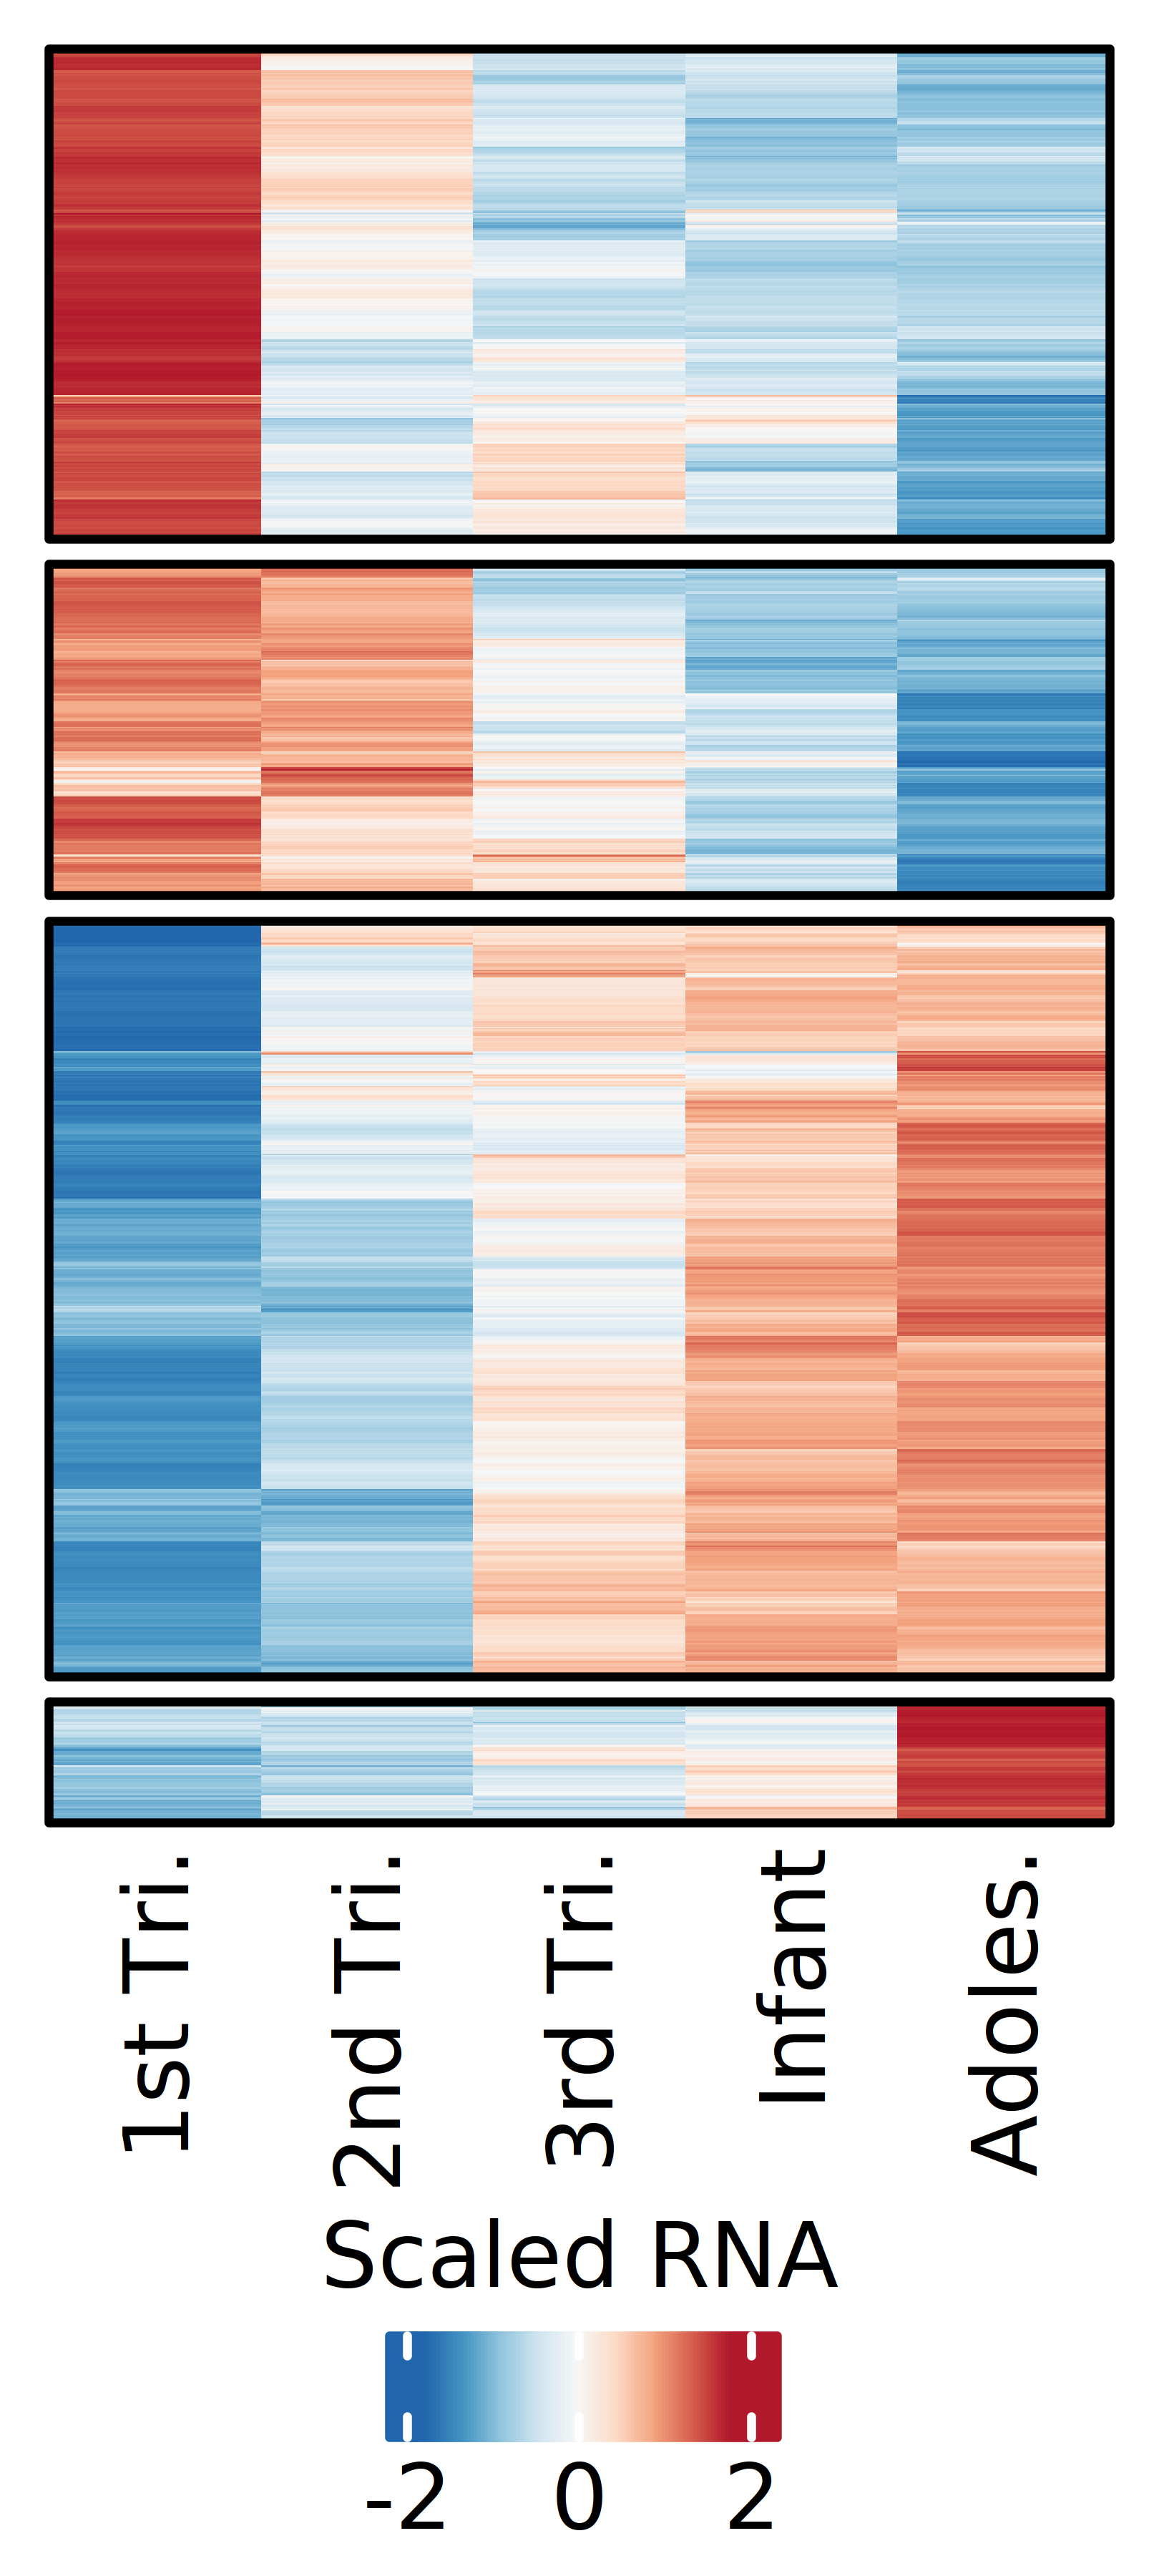

In [99]:
# Suppose you want the slices to appear in order 3, 1, 2
new_order <- c(1, 3, 2, 4)

# Convert to factor with desired order
row_split <- factor(cutree(p2$tree_row, k = 4), levels = new_order)
row_order <- order.dendrogram(as.dendrogram(p2$tree_row))


options(repr.plot.width = 1.8, repr.plot.height = 4,repr.plot.res=900)
t <- df[rownames(resdf[resdf$padj<0.01,]),]
p <- ComplexHeatmap::pheatmap(t(scale(t(t))), 
         cluster_cols = FALSE, 
         color  = my_palette,
         cluster_rows = F,
         clustering_method = 'ward.D2',
         row_split = row_split,
         row_order = row_order,
         row_title =NULL,
         treeheight_row = unit(6, "mm"),
         show_rownames = FALSE,
         border = TRUE,
         heatmap_legend_param = list(title = "Scaled RNA",at = c(-2,0,2), 
                                     labels = c('-2','0','2'),
                                     legend_height = unit(1, "cm"),
                                     legend_width = unit(1.5, "cm"),
                                     title_position = "topcenter",
                                     legend_direction = "horizontal", 
                                     title_gp = gpar(fontsize = 10),
                                     labels_gp = gpar(fontsize = 10)),
         border_color=NA)

draw(p, heatmap_legend_side="bottom")

In [100]:
# Process data
sample_df <- data.frame(t(scale(t(data.frame(assay(ntd)[rownames(t.clust),])))))
sample_df$gene <- rownames(sample_df)
sample_df_melt <- reshape2::melt(sample_df, id='gene')
sample_df_melt$Group <- rep(metadata_df[match(colnames(GetAssayData(human_multiome_astro_agg,slot='counts')),metadata_df$Sample),c('Group')],
    each=dim(t.clust)[1])
sample_df_melt$cluster <- as.character(rep(t.clust$cluster, times = (dim(sample_df)[2]-1)))

In [101]:
# Add time variable for plotting
sample_df_melt$Time <- ifelse(sample_df_melt$Group=='First_trimester',1,
                        ifelse(sample_df_melt$Group=='Second_trimester',2,
                               ifelse(sample_df_melt$Group=='Third_trimester',3,
                                      ifelse(sample_df_melt$Group=='Infancy',4,5))))

sample_df_melt_summary <- summarySE(sample_df_melt, measurevar="value", conf.interval = 0.95, groupvars=c('Time','cluster'))

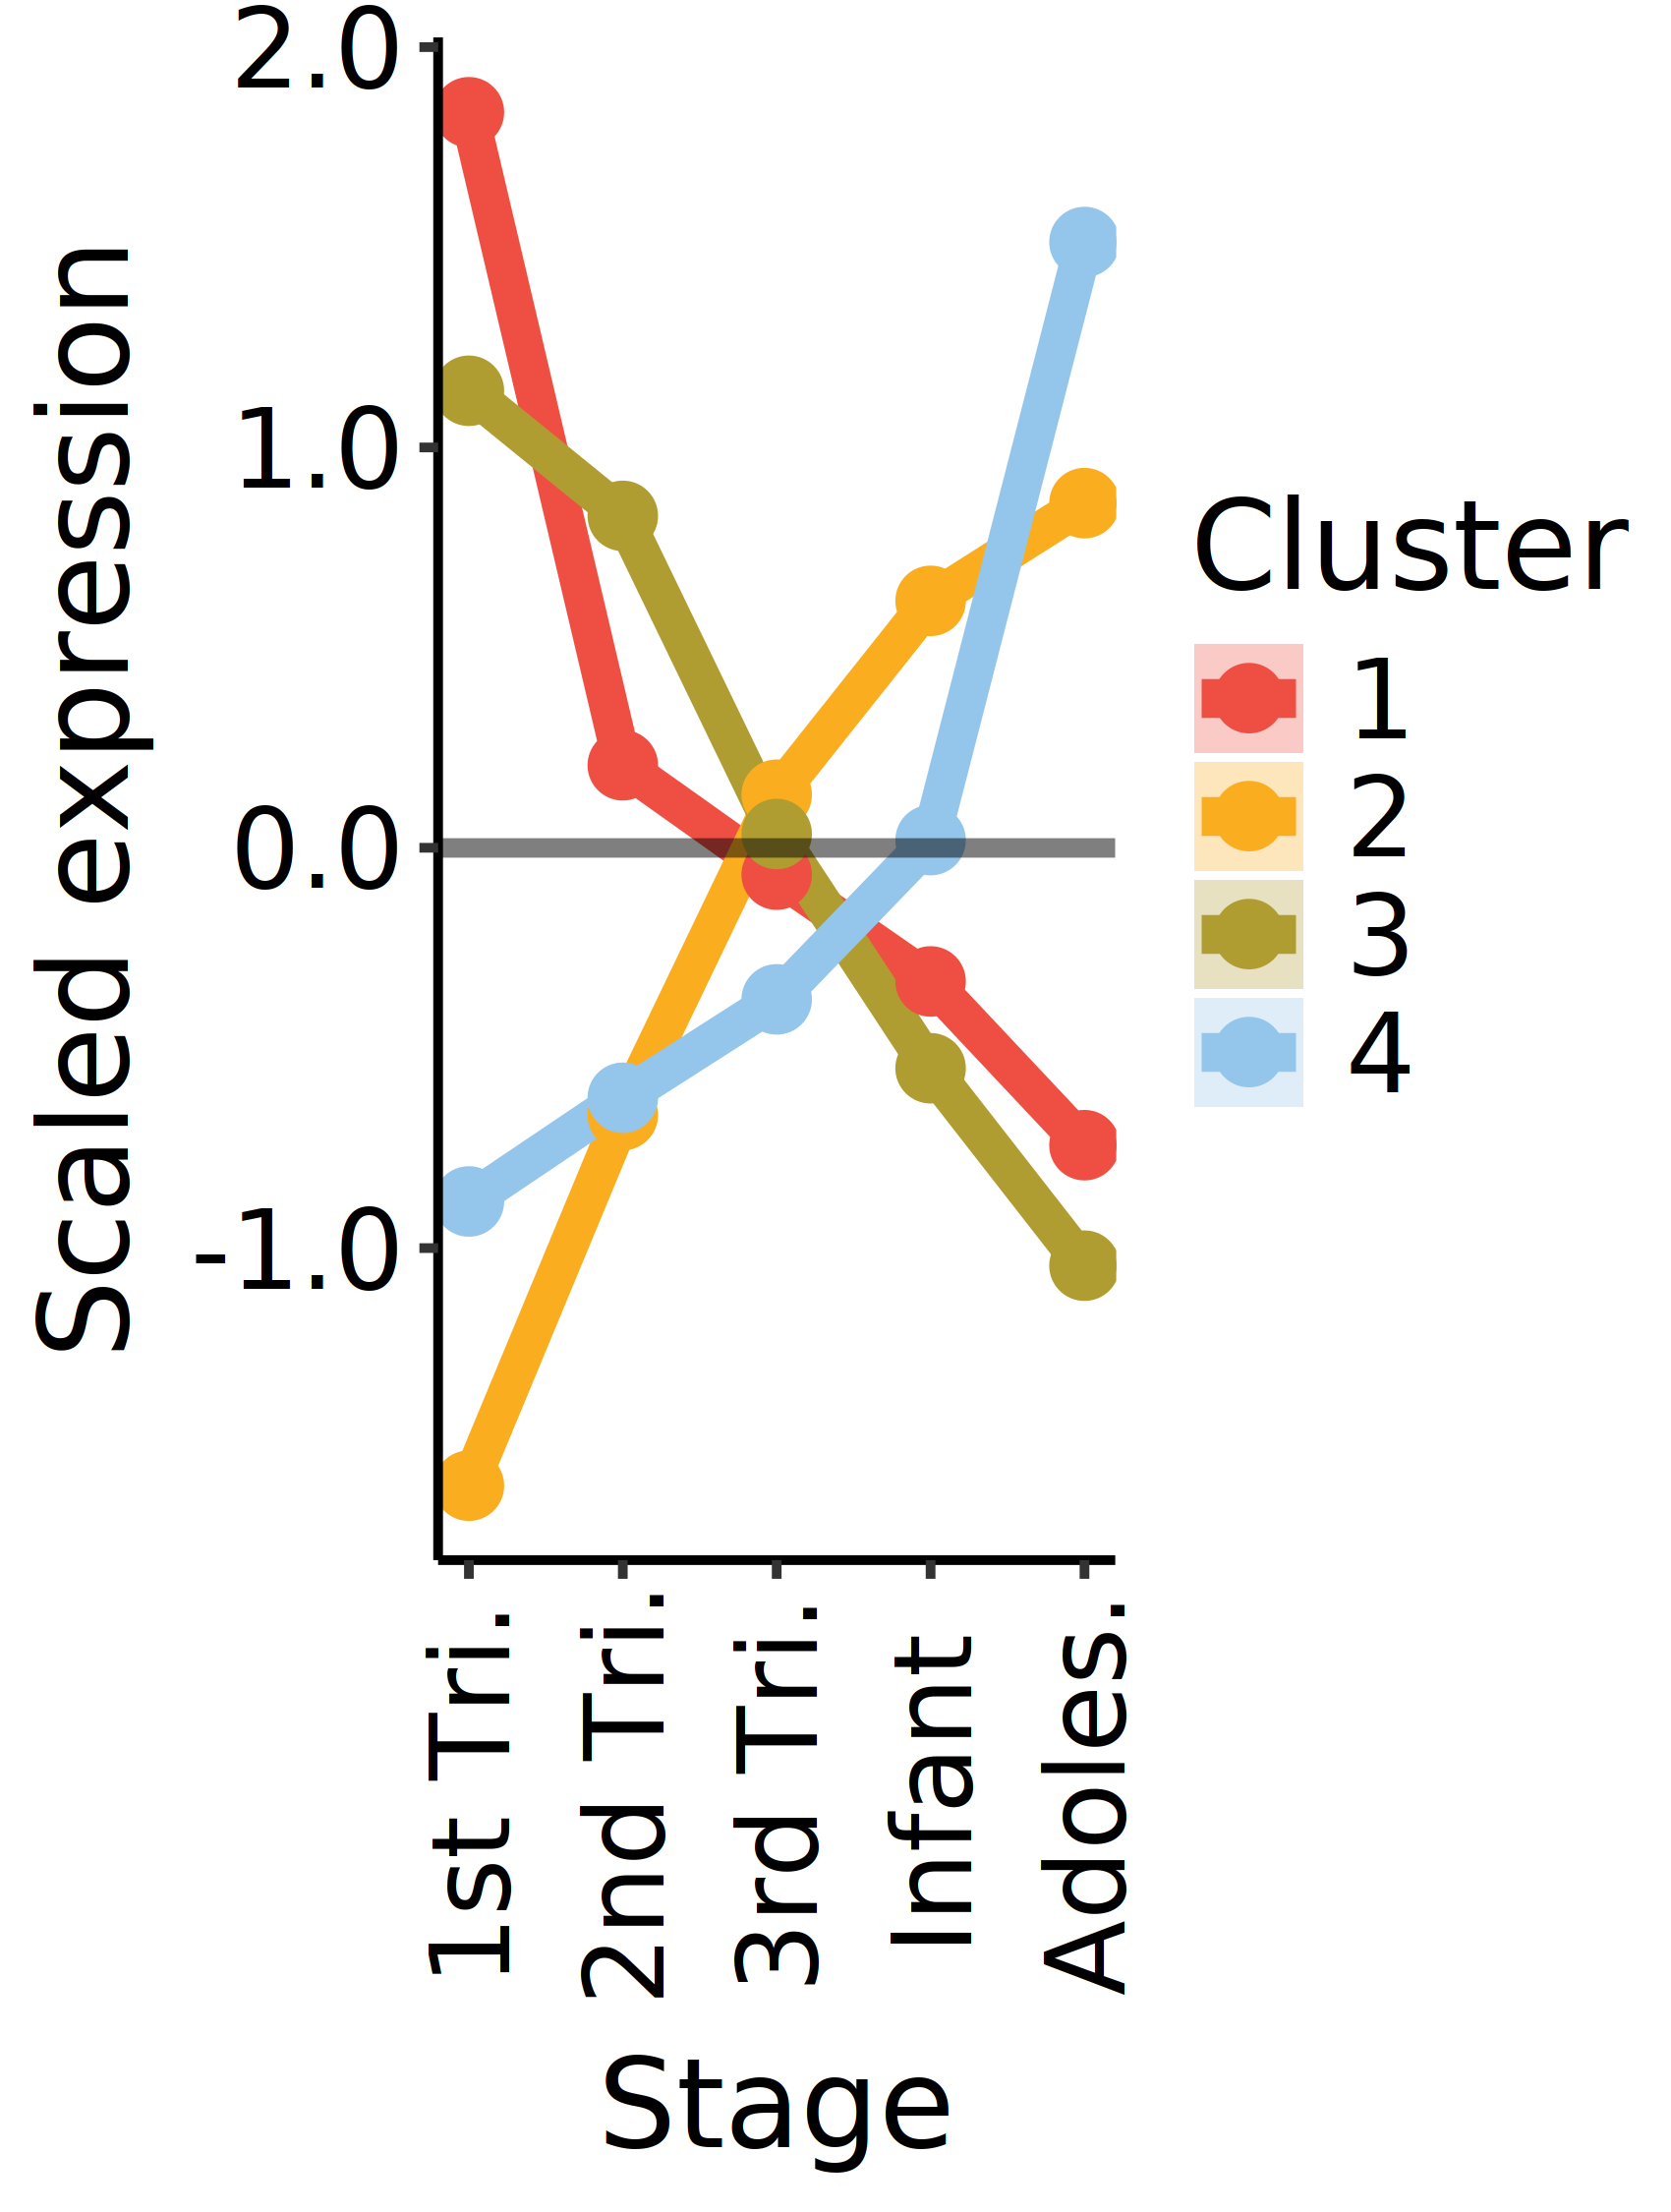

In [102]:
options(repr.plot.width=3.4, repr.plot.height=4.5,repr.plot.res=500)

scaleFUN <- function(x) sprintf("%.1f", x)
ggplot(sample_df_melt_summary, aes(x=Time, y=value, group=cluster, color=cluster)) + 
    geom_ribbon(aes(x=as.numeric(Time),ymax = value + se, ymin = value - se,fill=cluster,color=cluster),
              alpha = 0.3,
              linetype=0) + 
    geom_line(aes(group=cluster),linewidth=2) +
    geom_point(size=4) + 
geom_hline(yintercept=0,lwd=1,linetype=1,alpha=0.5) + theme_classic() +
ylab('Scaled expression') +
xlab('Stage') +
scale_y_continuous(labels=scaleFUN) +
theme(legend.position='right',
     axis.text=element_text(size=16,color='black'),
      legend.text=element_text(size=16,color='black'),
      legend.margin=margin(0,8,0,0),
      axis.text.x=element_text(angle=90,vjust=0.5,margin=margin(5,0,0,0)),
     axis.title=element_text(size=18,color='black'),
      legend.title=element_text(size=18,color='black'),
     axis.title.y = element_text(margin = margin(0,5,0,0)),
     axis.title.x = element_text(margin = margin(12,0,0,0))) + 
scale_x_continuous(breaks=seq(1,5,1),
                   labels = c('1st Tri.',
                           '2nd Tri.',
                           '3rd Tri.',
                           'Infant',
                           'Adoles.')) + 
scale_color_manual(name = 'Cluster', values = as.vector(paletteer::paletteer_d("fishualize::Pseudocheilinus_tetrataenia")[1:4])) +
scale_fill_manual(name = 'Cluster', values = as.vector(paletteer::paletteer_d("fishualize::Pseudocheilinus_tetrataenia")[1:4]))

# Compute overlap b/w devDEG clusters & mouse GR targets for plotting in Fig. 3i

In [103]:
# Convert mouse genes to human
library(dplyr)
mouse_human_genes = read.csv("http://www.informatics.jax.org/downloads/reports/HOM_MouseHumanSequence.rpt",sep="\t")

convert_mouse_to_human <- function(gene_list){

  output = c()

  for(gene in gene_list){
    class_key = (mouse_human_genes %>% filter(Symbol == gene & Common.Organism.Name=="mouse, laboratory"))[['DB.Class.Key']]
    if(!identical(class_key, integer(0)) ){
      human_genes = (mouse_human_genes %>% filter(DB.Class.Key == class_key & Common.Organism.Name=="human"))[,"Symbol"]
      for(human_gene in human_genes){
        output = append(output,human_gene)
      }
    }
  }

  return (output)
}


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:ensembldb':

    filter, select


The following object is masked from 'package:AnnotationDbi':

    select


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:Biostrings':

    collapse, intersect, setdiff, setequal, union


The following object is masked from 'package:XVector':

    slice


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    fir

In [104]:
# Read in GR-target gene data
P21_DEG <- readRDS('/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res.rds')
P21_DEG_relax <- readRDS('/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/P21_GR_dep_res_relax.rds')

In [105]:
# Convert mouse to human gene symbols
P21_DEG_sig_human <- convert_mouse_to_human(rownames(P21_DEG[P21_DEG$padj<0.05,]))
P21_DEG_relax_sig_human <- convert_mouse_to_human(rownames(P21_DEG_relax[P21_DEG_relax$padj<0.05,]))

In [106]:
# Compute overlap with each cluster
overlap_df <- data.frame(overlap = c(table(rownames(t.clust[t.clust$cluster == 1,]) %in% 
                        P21_DEG_relax_sig_human)[2] / length(rownames(t.clust[t.clust$cluster == 1,])),
                       table(rownames(t.clust[t.clust$cluster == 2,]) %in% 
                        P21_DEG_relax_sig_human)[2] / length(rownames(t.clust[t.clust$cluster == 2,])),
                       table(rownames(t.clust[t.clust$cluster == 3,]) %in% 
                        P21_DEG_relax_sig_human)[2] / length(rownames(t.clust[t.clust$cluster == 3,])),
                       table(rownames(t.clust[t.clust$cluster == 4,]) %in% 
                        P21_DEG_relax_sig_human)[2] / length(rownames(t.clust[t.clust$cluster == 4,]))),
           cluster = c('1','2','3','4'))
overlap_df$overlap <- overlap_df$overlap * 100
overlap_df$x <- '1'

In [107]:
rownames(t.clust[t.clust$cluster == 2,])[rownames(t.clust[t.clust$cluster == 2,]) %in% 
                        P21_DEG_relax_sig_human]

[1] "SLC25A33" "PADI2"    "COL16A1"  "TESK2"    "ACOT11"   "CYP2J2"  
  [7] "AHCYL1"   "GLUL"     "COLGALT2" "CSRP1"    "RHOU"     "KCNK1"   
 [13] "RHOB"     "TOGARAM2" "EFEMP1"   "NPAS2"    "MERTK"    "CACNB4"  
 [19] "INPP1"    "C2orf72"  "RAMP1"    "SNED1"    "ATP2B2"   "GASK1A"  
 [25] "GRAMD1C"  "KLF15"    "ARHGEF26" "ZMAT3"    "BCL6"     "CD38"    
 [31] "ARAP2"    "GABRA2"   "UNC5C"    "ETNPPL"   "ARSJ"     "SYNPO2"  
 [37] "USP53"    "SLC7A11"  "MFAP3L"   "ADCY2"    "PLPP1"    "PIK3R1"  
 [43] "CMYA5"    "ABLIM3"   "COL23A1"  "RIPOR2"   "CCND3"    "PAQR8"   
 [49] "ME1"      "FAM184A"  "TPD52L1"  "SASH1"    "PDE1C"    "BMPER"   
 [55] "TNS3"     "PDK4"     "SLC7A2"   "TACC1"    "ADCY8"    "KANK1"   
 [61] "SMARCA2"  "KLF9"     "ALDH1A1"  "ASTN2"    "LRRC8A"   "PHYHD1"  
 [67] "RXRA"     "PNPLA7"   "PIP4K2A"  "LGI1"     "HTRA1"    "GALNT18" 
 [73] "BBOX1"    "LGR4"     "PAMR1"    "PYGM"     "CHKA"     "ARAP1"   
 [79] "ZBTB16"   "HEPACAM"  "SLCO1C1"  "ABCD2"    "CNTN1"    "ITGA7"   
 [85] "ACSS3"    "CHPT1"    "TPCN1"    "SLC8B1"   "GJB6"     "RGCC"    
 [91] "NDRG2"    "HHIPL1"   "OTUD7A"   "CGNL1"    "CASKIN1"  "SYT17"   
 [97] "MT2A"     "MT1E"     "MT1M"     "MT1G"     "MTSS2"    "GAN"     
[103] "ABR"      "XAF1"     "PMP22"    "ALDOC"    "MMP28"    "TTLL6"   
[109] "PRKCA"    "TTYH2"    "CABLES1"  "AQP4"     "MAPK4"    "ANGPTL4" 
[115] "OLFM2"    "COL5A3"   "CYP4F11"  "SMOX"     "RIN2"     "CST3"    
[121] "ZHX3"     "PRODH"    "EMID1"    "TBC1D10A" "OSBP2"    "TEF"     
[127] "PRR5"     "MAOA"     "MAOB"     "HEPH"

In [108]:
# Calculate overlaps for Fisher test
ov1 <- rbind(table(rownames(t.clust[t.clust$cluster == 1,]) %in% 
                        P21_DEG_relax_sig_human),
      table(rownames(resdf[rownames(resdf) %notin% rownames(t.clust[t.clust$cluster ==1,]),]) %in% 
                              P21_DEG_relax_sig_human))

ov2 <- rbind(table(rownames(t.clust[t.clust$cluster == 2,]) %in% 
                        P21_DEG_relax_sig_human),
      table(rownames(resdf[rownames(resdf) %notin% rownames(t.clust[t.clust$cluster ==2,]),]) %in% 
                              P21_DEG_relax_sig_human))

ov3 <- rbind(table(rownames(t.clust[t.clust$cluster == 3,]) %in% 
                        P21_DEG_relax_sig_human),
      table(rownames(resdf[rownames(resdf) %notin% rownames(t.clust[t.clust$cluster ==3,]),]) %in% 
                              P21_DEG_relax_sig_human))

ov4 <- rbind(table(rownames(t.clust[t.clust$cluster == 4,]) %in% 
                        P21_DEG_relax_sig_human),
      table(rownames(resdf[rownames(resdf) %notin% rownames(t.clust[t.clust$cluster ==4,]),]) %in% 
                              P21_DEG_relax_sig_human))

In [109]:
# Add Fisher test results to object
overlap_df$pval <- c(fisher.test(ov1)$p.value,
                     fisher.test(ov2)$p.value,
                     fisher.test(ov3)$p.value,
                     fisher.test(ov4)$p.value)
overlap_df$logpval <- -log10(overlap_df$pval)

In [110]:
# Set order for plotting
overlap_df$cluster <- factor(overlap_df$cluster, levels = rev(c('1','3','2','4')))

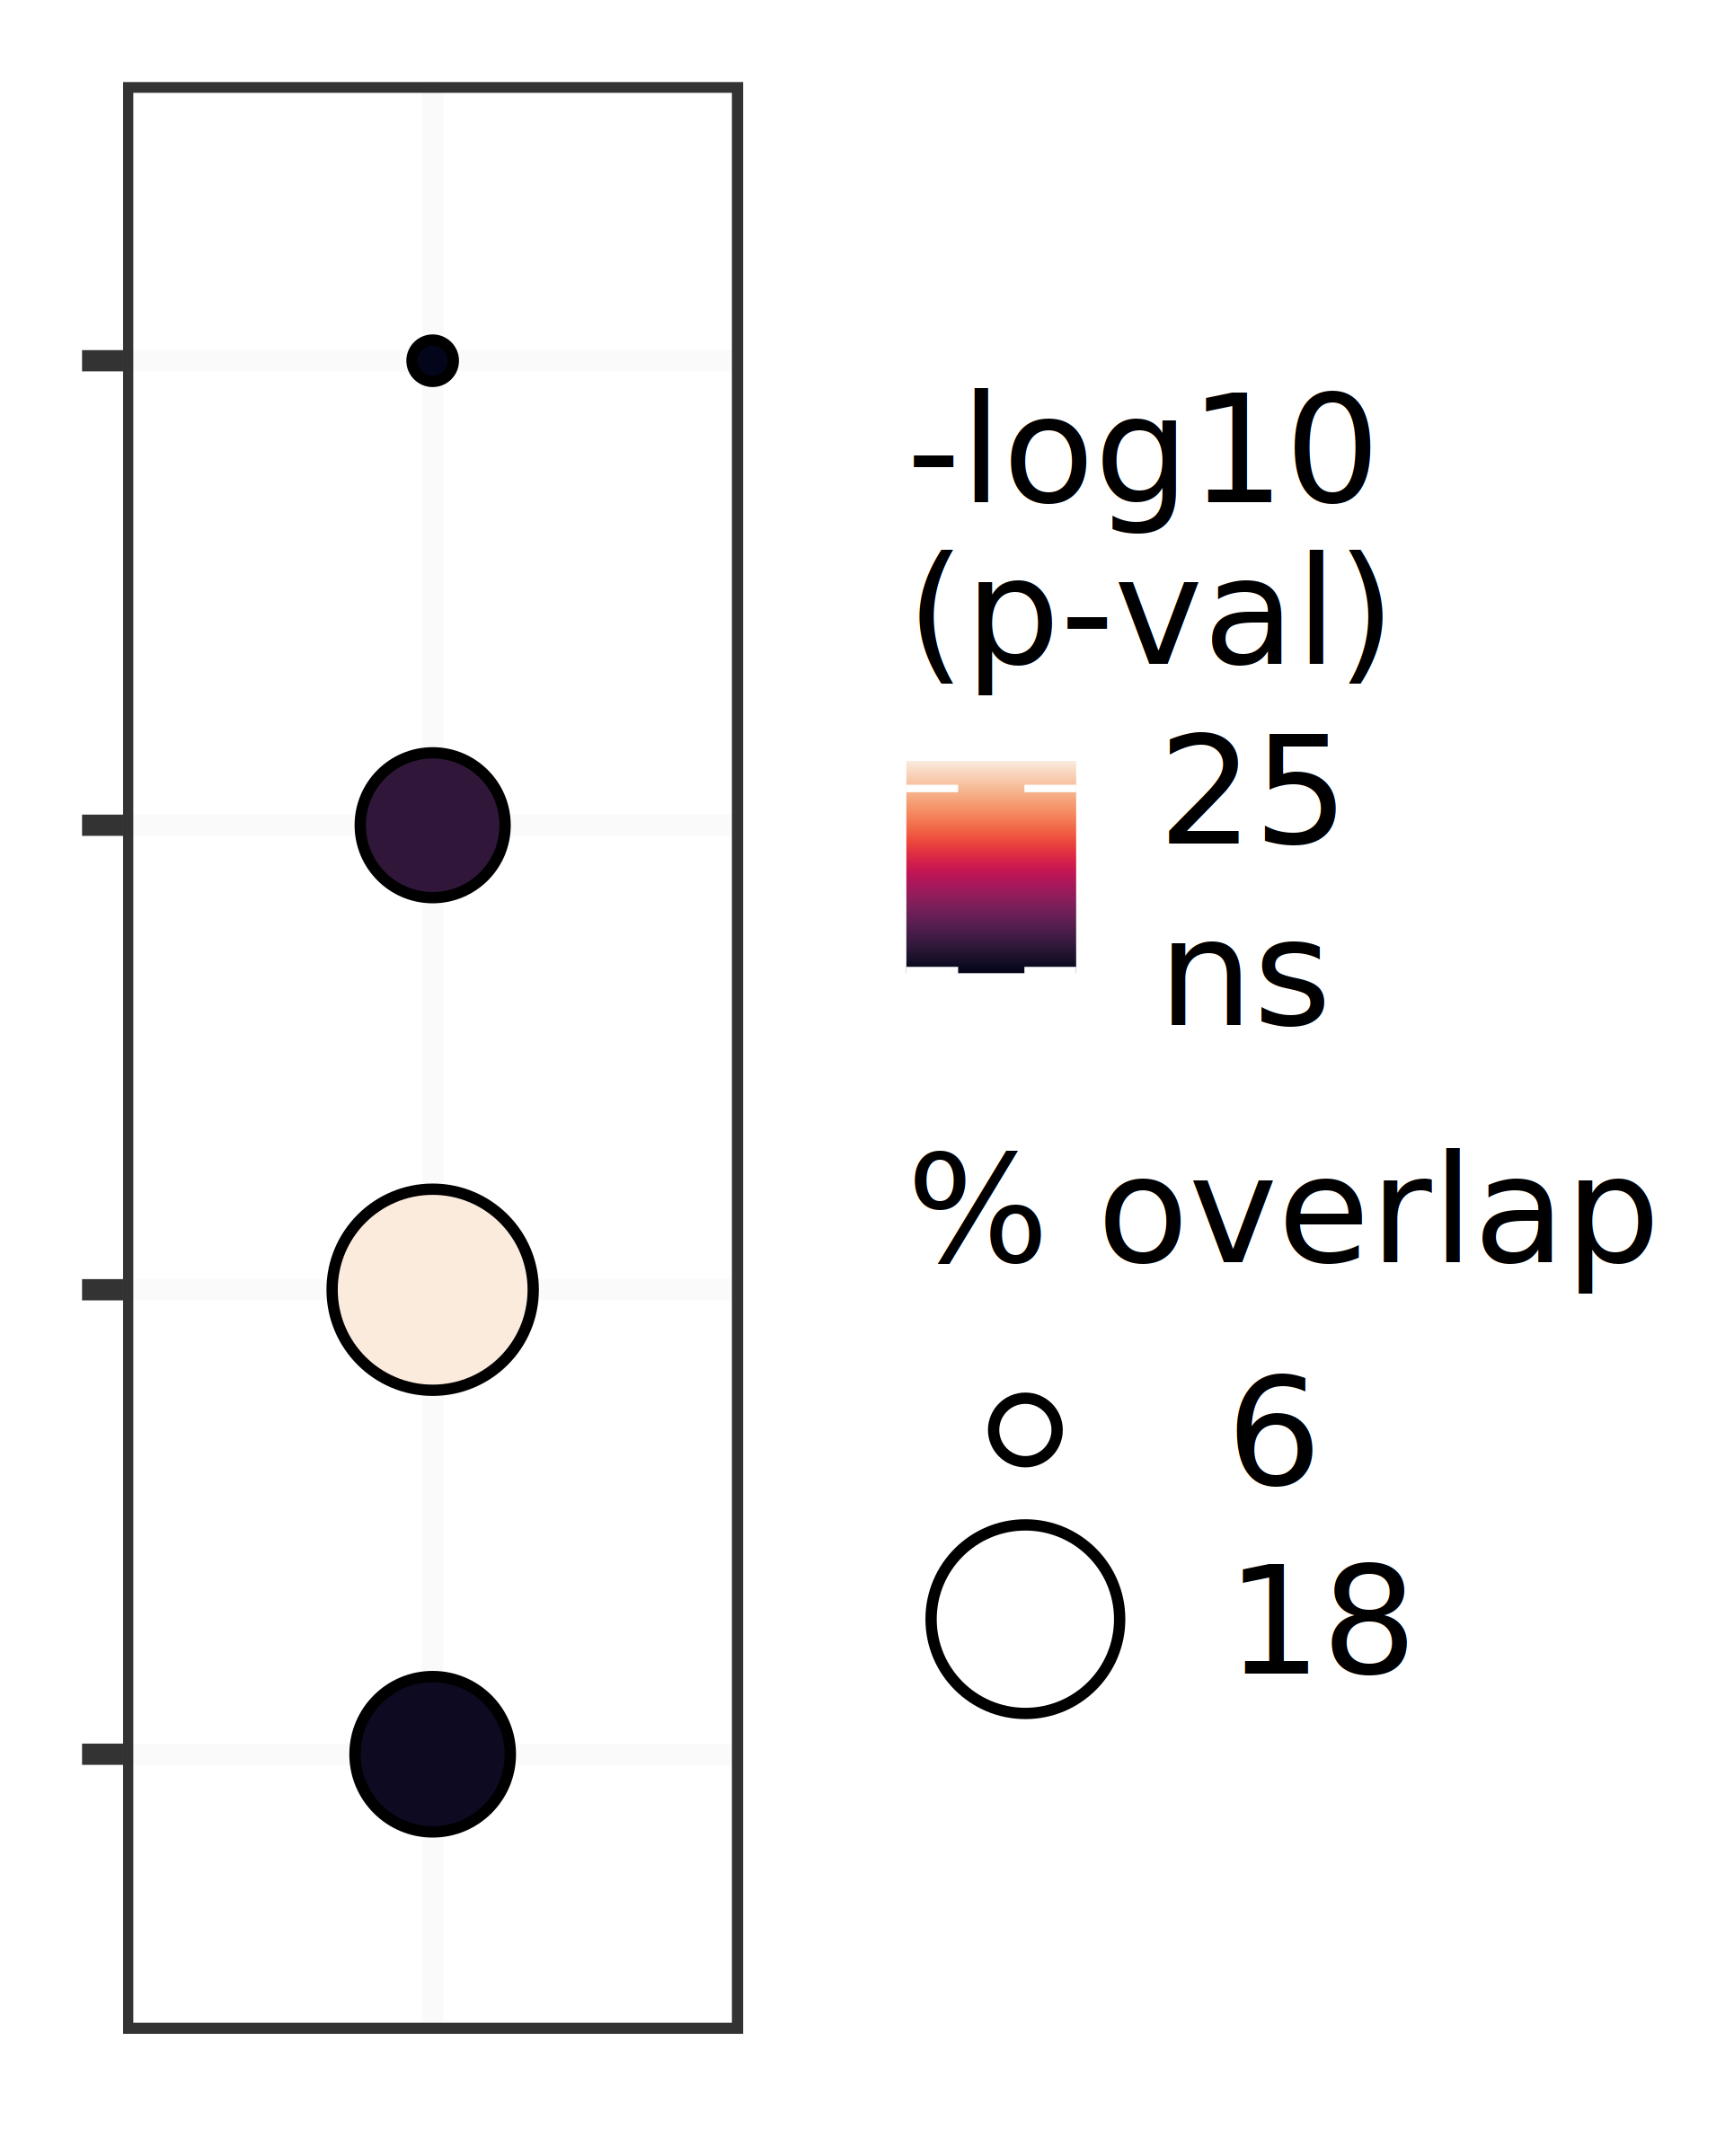

In [118]:
options(repr.plot.width=1.6, repr.plot.height=2,repr.plot.res=1200)

ggplot(overlap_df, aes(x=x, y=cluster, size = overlap, fill=logpval)) +
    geom_point(shape=21,alpha=1,stroke=0.4) + theme_bw() + scale_radius(breaks = c(6,18)) + theme(axis.title = element_blank(),
                                                                    axis.text.x = element_blank(),
                                                                    panel.grid.major = element_line(color = "grey98"),
                                                                    axis.text.y = element_blank(),
                                                                    legend.title=element_text(hjust=0,size=10),
                                                                    legend.text=element_text(size=10),
                                                                    legend.margin=margin(0,5,0,0),
                                                                    legend.key.height = unit(1,'mm'),
                                                                    legend.key.width = unit(4,'mm'),
                                                                    legend.position='right',
                                                                    axis.ticks.x = element_blank()) + labs(size = "% overlap",fill='-log10\n(p-val)') +
scale_fill_viridis(option='rocket',breaks=c(2,25),labels=c('ns','25')) 

# Link peaks to devDEGs for motif analysis for Ext Fig. 10

In [ ]:
library(future)
plan("multicore", workers = 8)
options(future.globals.maxSize = 100 * 1024 ^ 3) # for 100 Gb RAM

In [ ]:
# Run region stats
DefaultAssay(human_multiome_astro_v2) <- 'peaks'
human_multiome_astro_v2 <- RegionStats(human_multiome_astro_v2, genome = BSgenome.Hsapiens.UCSC.hg38)

In [ ]:
# Get JASPAR database
jaspar_pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE)
)

In [ ]:
# Add jaspar motifs
human_multiome_astro_v2 <- AddMotifs(
  object = human_multiome_astro_v2,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  pfm = jaspar_pfm,
  assay = 'peaks'
)

In [ ]:
# Save RDS file w/motif object for astrocyte-called peaks
saveRDS(human_multiome_astro_v2,'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250427_human_multiome_astro_v2.rds')

In [ ]:
# Read RDS file w/motif object for astrocyte-called peaks
human_multiome_astro_v2 <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250427_human_multiome_astro_v2.rds')

In [119]:
# Run LinkPeaks on devDEGs
DefaultAssay(human_multiome_astro_v2) <- 'RNA'
c1_links <- LinkPeaks(human_multiome_astro_v2, 
                                       expression.assay = 'RNA',
                                       peak.assay = 'peaks',
                                       min.distance = 5000,
                                       distance = 300000,
                                       genes.use = rownames(t.clust[t.clust$cluster == 1,]))

c2_links <- LinkPeaks(human_multiome_astro_v2, 
                                       expression.assay = 'RNA',
                                       peak.assay = 'peaks',
                                       min.distance = 5000,
                                       distance = 300000,
                                       genes.use = rownames(t.clust[t.clust$cluster == 2,]))

c3_links <- LinkPeaks(human_multiome_astro_v2, 
                                       expression.assay = 'RNA',
                                       peak.assay = 'peaks',
                                       min.distance = 5000,
                                       distance = 300000,
                                       genes.use = rownames(t.clust[t.clust$cluster == 3,]))

c4_links <- LinkPeaks(human_multiome_astro_v2, 
                                       expression.assay = 'RNA',
                                       peak.assay = 'peaks',
                                       min.distance = 5000,
                                       distance = 300000,
                                       genes.use = rownames(t.clust[t.clust$cluster == 4,]))

Testing 439 genes and 109614 peaks

Found gene coordinates for 408 genes

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': GL000194.1, GL000195.1, GL000205.2, GL000219.1, KI270713.1, KI270727.1, KI270728.1
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': GL000194.1, GL000195.1, GL000205.2, GL000219.1, KI270713.1, KI270727.1, KI270728.1
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Testing 677 genes and 109614 peaks

Found gene coordinates for 581 genes

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in 

In [120]:
# Convert results to dataframe
DefaultAssay(c1_links) <- 'peaks'
c1_links_df <- as.data.frame(Links(c1_links))

DefaultAssay(c2_links) <- 'peaks'
c2_links_df <- as.data.frame(Links(c2_links))

DefaultAssay(c3_links) <- 'peaks'
c3_links_df <- as.data.frame(Links(c3_links))

DefaultAssay(c4_links) <- 'peaks'
c4_links_df <- as.data.frame(Links(c4_links))

In [150]:
# Find enriched motifs in top-ranked peaks for each cluster
enriched.motifs1 <- FindMotifs(
  object = c1_links,
  c1_links_df[(c1_links_df$pvalue <0.001) &
        (c1_links_df$score>0),'peak']
)

enriched.motifs2 <- FindMotifs(
  object = c2_links,
  c2_links_df[(c2_links_df$pvalue <0.001) &
        (c2_links_df$score>0),'peak']
)

enriched.motifs3 <- FindMotifs(
  object = c3_links,
  c3_links_df[(c3_links_df$pvalue <0.001) &
        (c3_links_df$score>0),'peak']
)

enriched.motifs4 <- FindMotifs(
  object = c4_links,
  c4_links_df[(c4_links_df$pvalue <0.001) &
        (c4_links_df$score>0),'peak']
)

Selecting background regions to match input sequence characteristics

Matching GC.percent distribution

Testing motif enrichment in 208 regions

Selecting background regions to match input sequence characteristics

Matching GC.percent distribution

Testing motif enrichment in 230 regions

Selecting background regions to match input sequence characteristics

Matching GC.percent distribution

Testing motif enrichment in 232 regions

Selecting background regions to match input sequence characteristics

Matching GC.percent distribution

Testing motif enrichment in 168 regions



In [199]:
# Generate plot for Ext Fig. 10
options(repr.plot.width=3, repr.plot.height=4,repr.plot.res=900)

enriched.motifs1$motif.name <- gsub('FOSL1::JUN\\(var\\.2\\)', 'FOSL1::\nJUN(var.2)', enriched.motifs1$motif.name)

enriched.motifs1$motif.name <- factor(enriched.motifs1$motif.name, levels = enriched.motifs1$motif.name)
p3 <- ggplot(enriched.motifs1[1:5,], aes(x=motif.name, y=-log10(p.adjust))) + 
  geom_bar(stat = "identity",width=0.7,fill=as.vector(paletteer::paletteer_d("fishualize::Pseudocheilinus_tetrataenia")[1])) + theme_classic() + 
xlab('TF motif') + 
ylab('-log10(padj)') + 
theme(axis.text = element_text(color='black',size=18),
      axis.text.x = element_text(angle=45,hjust=1),
axis.title = element_text(color='black',size=18),
       plot.margin=margin(5,8,5,0),
axis.title.x=element_blank())

In [217]:
# Generate plot for Ext Fig. 10
options(repr.plot.width=3, repr.plot.height=4,repr.plot.res=900)

enriched.motifs2$motif.name <- gsub('NR3C1', 'GR', enriched.motifs2$motif.name)
enriched.motifs2$motif.name <- gsub('NR3C2', 'MR', enriched.motifs2$motif.name)
enriched.motifs2$motif.name <- factor(enriched.motifs2$motif.name, levels = enriched.motifs2$motif.name)
p2 <- ggplot(enriched.motifs2[1:5,], aes(x=motif.name, y=-log10(p.adjust))) + 
  geom_bar(stat = "identity",width=0.7,fill=as.vector(paletteer::paletteer_d("fishualize::Pseudocheilinus_tetrataenia")[2])) + theme_classic() + 
xlab('TF motif') + 
ylab('-log10(padj)') + 
theme(axis.text = element_text(color='black',size=18),
      axis.text.x = element_text(angle=45,hjust=1),
       plot.margin=margin(40,8,-10,0),
axis.title = element_text(color='black',size=18),
axis.title.x=element_blank())

In [218]:
# Generate plot for Ext Fig. 10
options(repr.plot.width=3, repr.plot.height=4,repr.plot.res=900)

enriched.motifs3$motif.name <- factor(enriched.motifs3$motif.name, levels = enriched.motifs3$motif.name)
p4 <- ggplot(enriched.motifs3[1:5,], aes(x=motif.name, y=-log10(p.adjust))) + 
  geom_bar(stat = "identity",width=0.7,fill=as.vector(paletteer::paletteer_d("fishualize::Pseudocheilinus_tetrataenia")[3])) + theme_classic() + 
xlab('TF motif') + 
ylab('-log10(padj)') + 
theme(axis.text = element_text(color='black',size=18),
      axis.text.x = element_text(angle=45,hjust=1),
       plot.margin=margin(5,0,5,0),
axis.title = element_text(color='black',size=18),
axis.title.x=element_blank())

In [219]:
# Generate plot for Ext Fig. 10
options(repr.plot.width=3, repr.plot.height=4,repr.plot.res=900)

enriched.motifs4$motif.name <- factor(enriched.motifs4$motif.name, levels = enriched.motifs4$motif.name)
p1 <- ggplot(enriched.motifs4[1:5,], aes(x=motif.name, y=-log10(p.adjust))) + 
  geom_bar(stat = "identity",width=0.7,fill=as.vector(paletteer::paletteer_d("fishualize::Pseudocheilinus_tetrataenia")[4])) + theme_classic() + 
xlab('TF motif') + 
ylab('-log10(padj)') + 
theme(axis.text = element_text(color='black',size=18),
      axis.text.x = element_text(angle=45,hjust=1),
      plot.margin=margin(40,0,-10,0),
axis.title = element_text(color='black',size=18),
axis.title.x=element_blank())

In [220]:
options(repr.plot.width=5.2, repr.plot.height=6.8,repr.plot.res=1200)

cowplot::plot_grid(p3,p4,p2,p1,ncol=2,align='hv')

# Identify devDARs using DESeq2 for Ext. Fig. 10 

In [3]:
# Read RDS file w/motif object for astrocyte-called peaks
human_multiome_astro_v2 <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250427_human_multiome_astro_v2.rds')

In [4]:
human_multiome_astro_v2

An object of class Seurat 
264205 features across 11985 samples within 5 assays 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 4 other assays present: SCT, integrated, ATAC, peaks
 6 dimensional reductions calculated: pca, integrated_lsi, wnn.umap, gex.umap, atac.umap, umap

In [5]:
# Aggregate counts
human_multiome_astro_agg <- AggregateExpression(human_multiome_astro_v2,
                                                assays = 'peaks',
                                                group.by = 'Ident',
                                                slot = 'counts',
                                                return.seurat = TRUE)

Warning message:
"The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>."
Warning message:
"The `slot` argument of `SetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>."


In [6]:
# Create metadata
meta_df <- unique(data.frame(human_multiome_astro_v2@meta.data[human_multiome_astro_v2$Ident %in% human_multiome_astro_v2$Ident,'Ident'],
           human_multiome_astro_v2@meta.data[human_multiome_astro_v2$Ident %in% human_multiome_astro_v2$Ident,c('Group','region_summary')]))
metadata_df <- data.frame(Sample = meta_df[,1],
                          Group = meta_df[,2],
                          Region = meta_df[,3],
                          Group_region = paste0(meta_df[,2], '_', meta_df[,3]))

In [7]:
# Run DESeq2 analysis on ATAC peaks
deseq_obj <- DESeqDataSetFromMatrix(countData = GetAssayData(human_multiome_astro_agg,slot='counts'),
                              colData = metadata_df[match(colnames(GetAssayData(human_multiome_astro_agg,slot='counts')),metadata_df$Sample),],
                              design = ~ Group)

# Run Deseq2
deseq_obj <- DESeq(deseq_obj)
resdf <- na.omit(as.data.frame(results(deseq_obj,contrast=c("Group","Adolescence","First_trimester"),lfcThreshold=1)))

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
# Run edgeR analysis on ATAC peaks
#edgeR_obj <- DGEList(counts = GetAssayData(human_multiome_astro_agg,slot='counts'),
#                                 samples = metadata_df[match(colnames(GetAssayData(human_multiome_astro_agg,slot='counts')),metadata_df$Sample),])
#edgeR_obj <- calcNormFactors(edgeR_obj)
#design <- model.matrix(~ Group, data = edgeR_obj$samples)
#edgeR_obj <- estimateDisp(edgeR_obj, design)
#fit <- glmQLFit(edgeR_obj, design)
#qlf_lfc_test <- glmTreat(fit, coef = 5, lfc = 1)
#res_FC <- as.data.frame(topTags(qlf_lfc_test, n=Inf))
#res_FC[res_FC$FDR<0.01,]

In [8]:
# Normalize data
ntd <- normTransform(deseq_obj)

In [9]:
# Compute mean expression per group for plotting
df <- data.frame(First_trimester = rowMeans(assay(ntd)[,c(13:16)]),
                 Second_trimester = rowMeans(assay(ntd)[,c(1:11)]),
                 Third_trimester = rowMeans(assay(ntd)[,c(12,21,36:38)]),
                 Infant = rowMeans(assay(ntd)[,c(17:20,24:29)]),
                 Adolescence = rowMeans(assay(ntd)[,c(22,23,30:35)]))

names(df) <- c('1st Tri.',
               '2nd Tri.',
               '3rd Tri.',
               'Infant',
               'Adoles.')

In [10]:
my_palette <- colorRampPalette(rev(brewer.pal(9,'RdBu')))(1000)  # 1000 colors
my_breaks <- seq(-2, 2, length.out = 1001) 

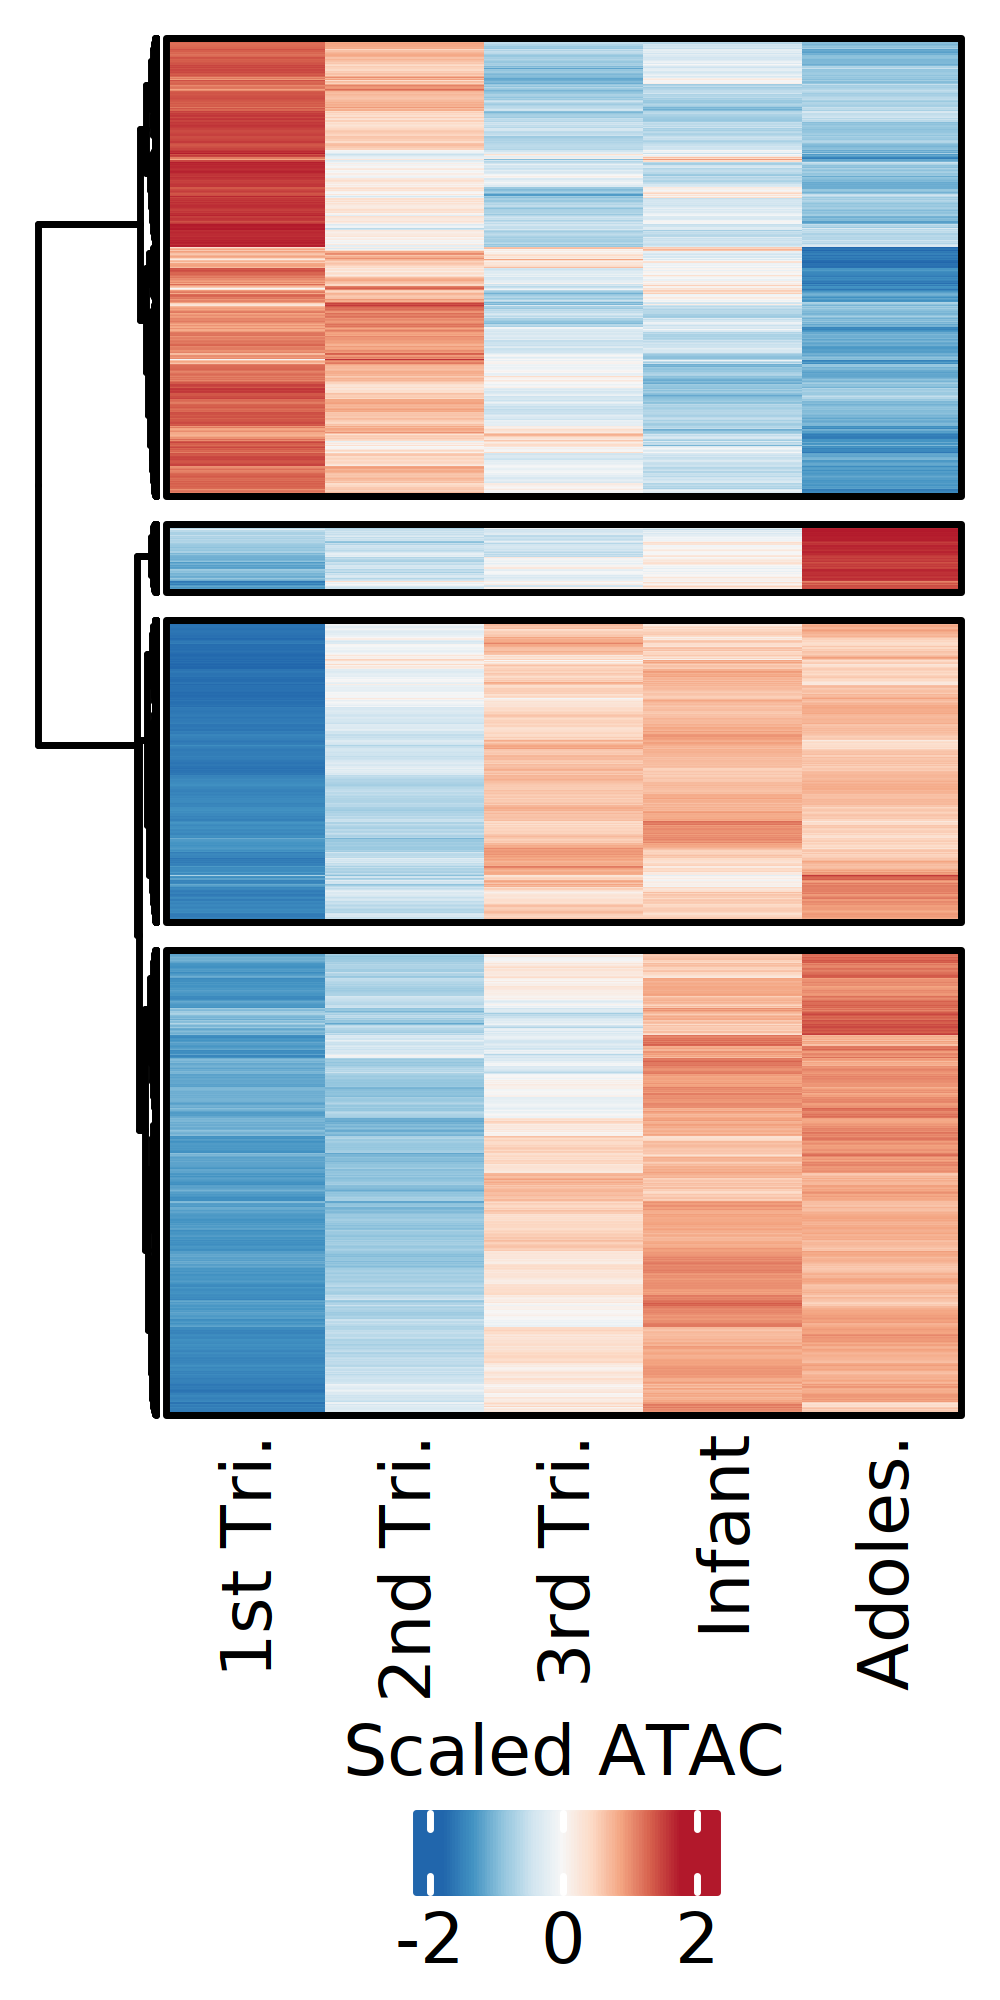

In [11]:
options(repr.plot.width = 2, repr.plot.height = 4,repr.plot.res=500)
t <- df[rownames(resdf[resdf$padj<0.05,]),]
p <- ComplexHeatmap::pheatmap(t(scale(t(t))), 
         cluster_cols = FALSE, 
         color  = my_palette,
         cluster_rows = T,
         clustering_method = 'ward.D2',
         cutree_rows=4,
         treeheight_row = unit(6, "mm"),
         show_rownames = FALSE,
         heatmap_legend_param = list(title = "Scaled ATAC",at = c(-2,0,2), 
                                     labels = c('-2','0','2'),
                                     legend_height = unit(1, "cm"),
                                     legend_width = unit(1.5, "cm"),
                                     title_position = "topcenter",
                                     legend_direction = "horizontal", 
                                     title_gp = gpar(fontsize = 10),
                                     labels_gp = gpar(fontsize = 10)),
         border_color=NA,
         border=TRUE)

draw(p, heatmap_legend_side="bottom")

In [28]:
# Extract clustering results
t <- df[rownames(resdf[resdf$padj<0.05,]),]

p2 <- pheatmap::pheatmap(t, 
         cluster_cols = FALSE, 
         cluster_rows = T,
         clustering_method = 'ward.D2',
         cutree_rows=4,
         scale = 'row',
                       silent=T)

t.clust <- as.data.frame(cbind(t, 
                      cluster = cutree(p2$tree_row, 
                                       k = 4)))

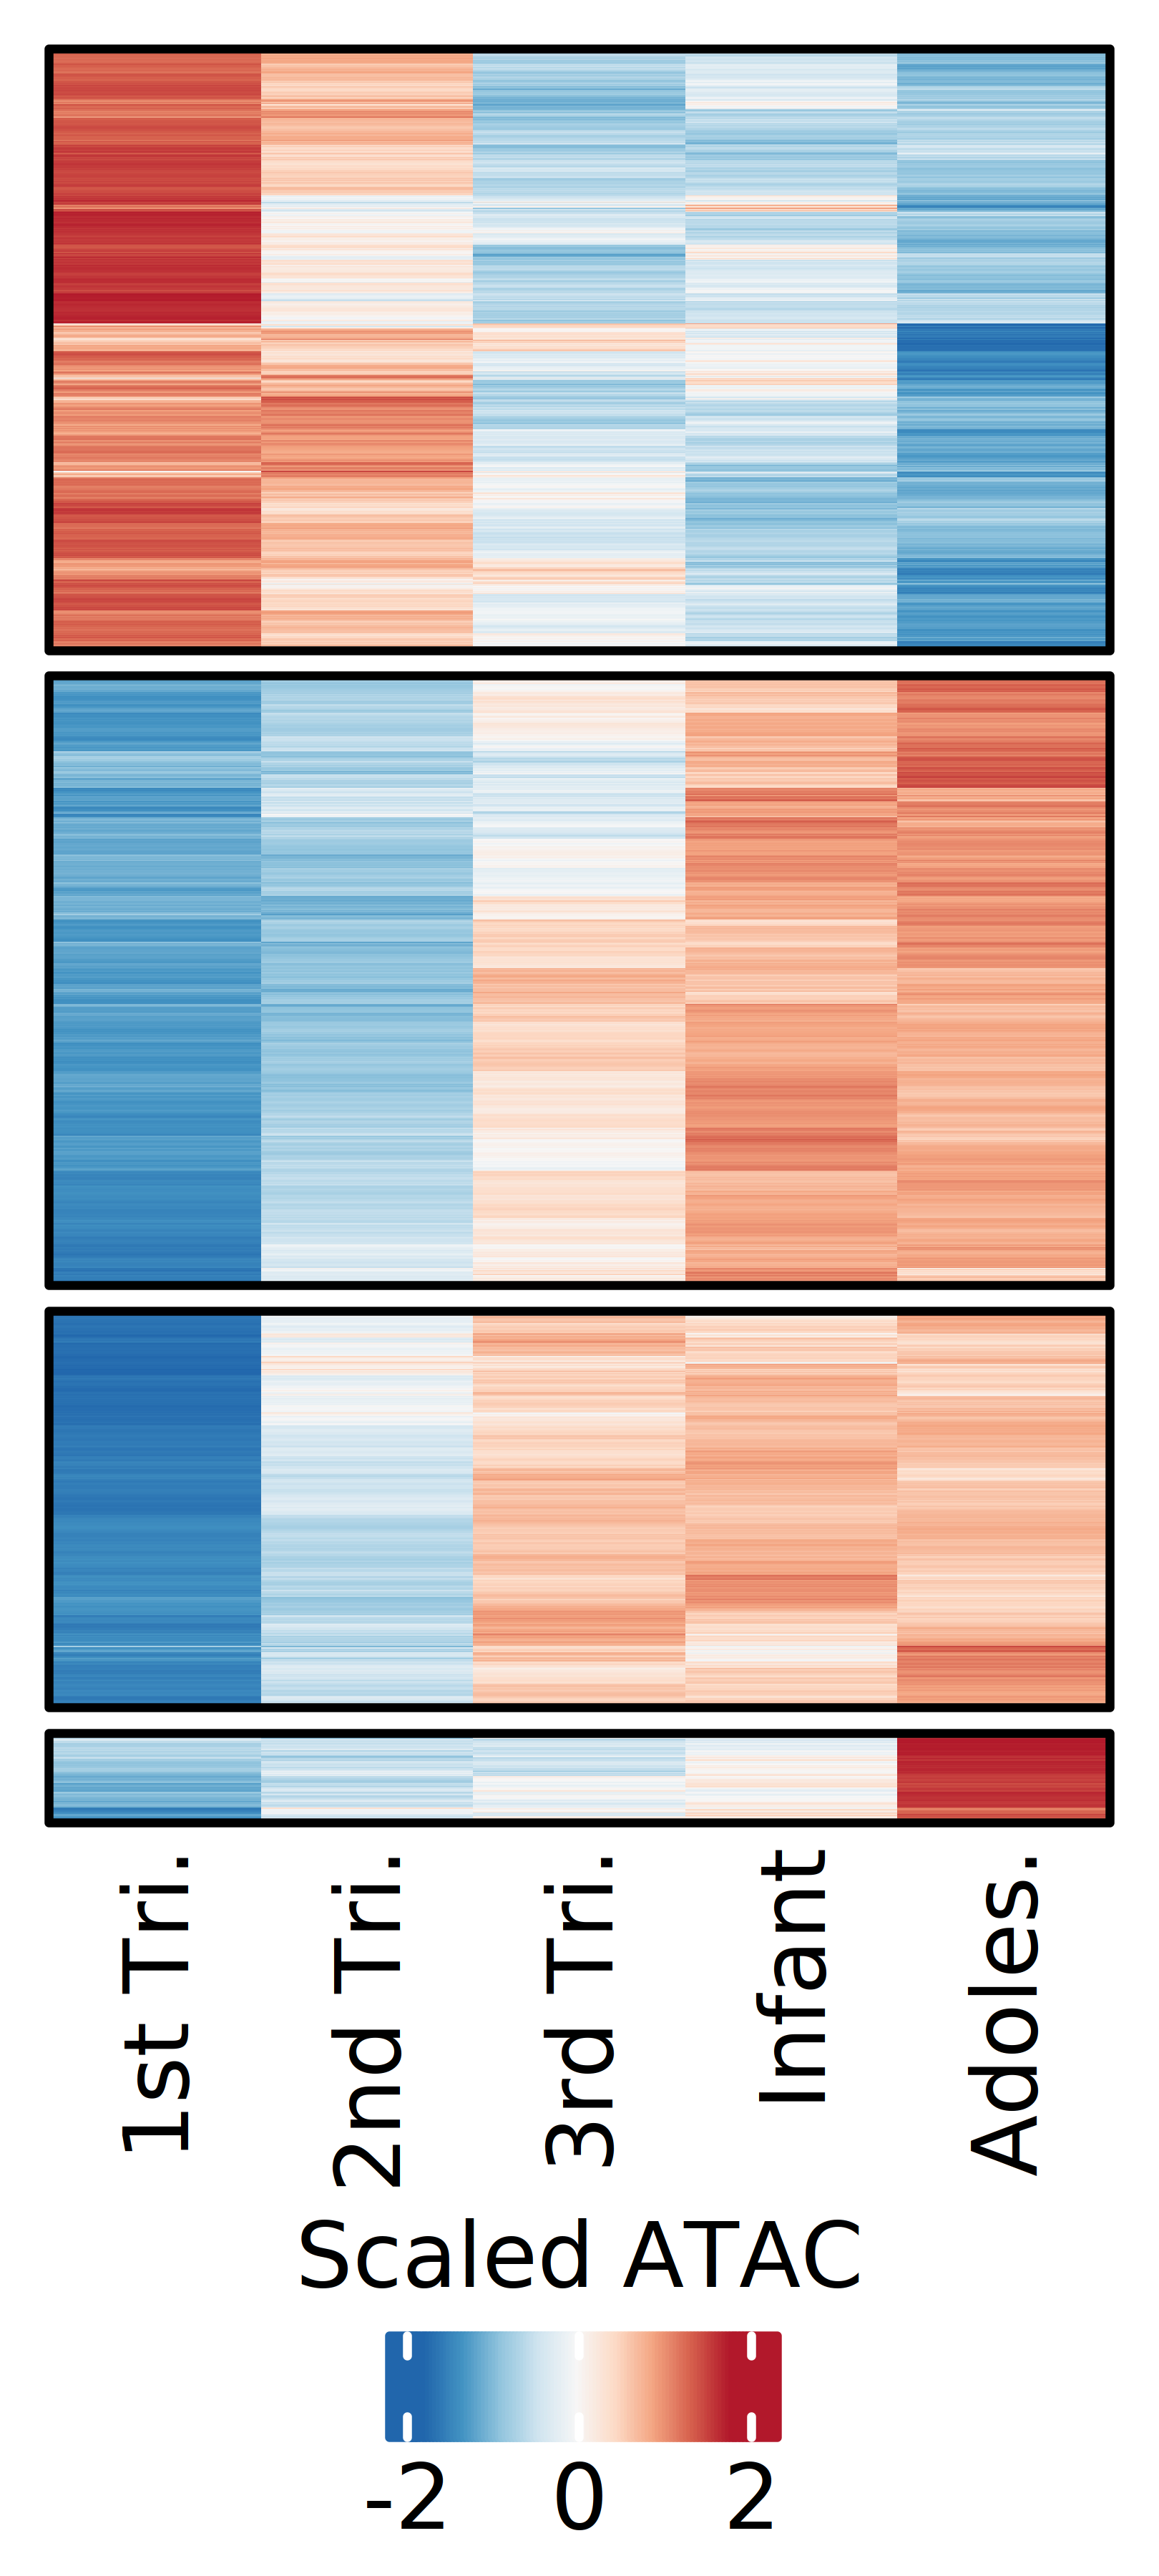

In [32]:
# Suppose you want the slices to appear in order 
new_order <- c(3, 1, 4, 2)

# Convert to factor with desired order
row_split <- factor(cutree(p2$tree_row, k = 4), levels = new_order)
row_order <- order.dendrogram(as.dendrogram(p2$tree_row))

options(repr.plot.width = 1.8, repr.plot.height = 4,repr.plot.res=900)
t <- df[rownames(resdf[resdf$padj<0.05,]),]
p <- ComplexHeatmap::pheatmap(t(scale(t(t))), 
         cluster_cols = FALSE, 
         color  = my_palette,
         cluster_rows = F,
         clustering_method = 'ward.D2',
         row_split = row_split,
         row_order = row_order,
         row_title =NULL,
         treeheight_row = unit(6, "mm"),
         show_rownames = FALSE,
         border = TRUE,
         heatmap_legend_param = list(title = "Scaled ATAC",at = c(-2,0,2), 
                                     labels = c('-2','0','2'),
                                     legend_height = unit(1, "cm"),
                                     legend_width = unit(1.5, "cm"),
                                     title_position = "topcenter",
                                     legend_direction = "horizontal", 
                                     title_gp = gpar(fontsize = 10),
                                     labels_gp = gpar(fontsize = 10)),
         border_color=NA)

draw(p, heatmap_legend_side="bottom")

In [31]:
table(t.clust$cluster)


   1    2    3    4 
2552  375 2518 1661 

In [33]:
# Process data
sample_df <- data.frame(t(scale(t(data.frame(assay(ntd)[rownames(t.clust),])))))
sample_df$peak <- rownames(sample_df)
sample_df_melt <- reshape2::melt(sample_df, id='peak')
sample_df_melt$Group <- rep(metadata_df[match(colnames(GetAssayData(human_multiome_astro_agg,slot='counts')),metadata_df$Sample),c('Group')],
    each=dim(t.clust)[1])
sample_df_melt$cluster <- as.character(rep(t.clust$cluster, times = (dim(sample_df)[2]-1)))

In [34]:
# Add time variable for plotting
sample_df_melt$Time <- ifelse(sample_df_melt$Group=='First_trimester',1,
                        ifelse(sample_df_melt$Group=='Second_trimester',2,
                               ifelse(sample_df_melt$Group=='Third_trimester',3,
                                      ifelse(sample_df_melt$Group=='Infancy',4,5))))

sample_df_melt_summary <- summarySE(sample_df_melt, measurevar="value", conf.interval = 0.95, groupvars=c('Time','cluster'))

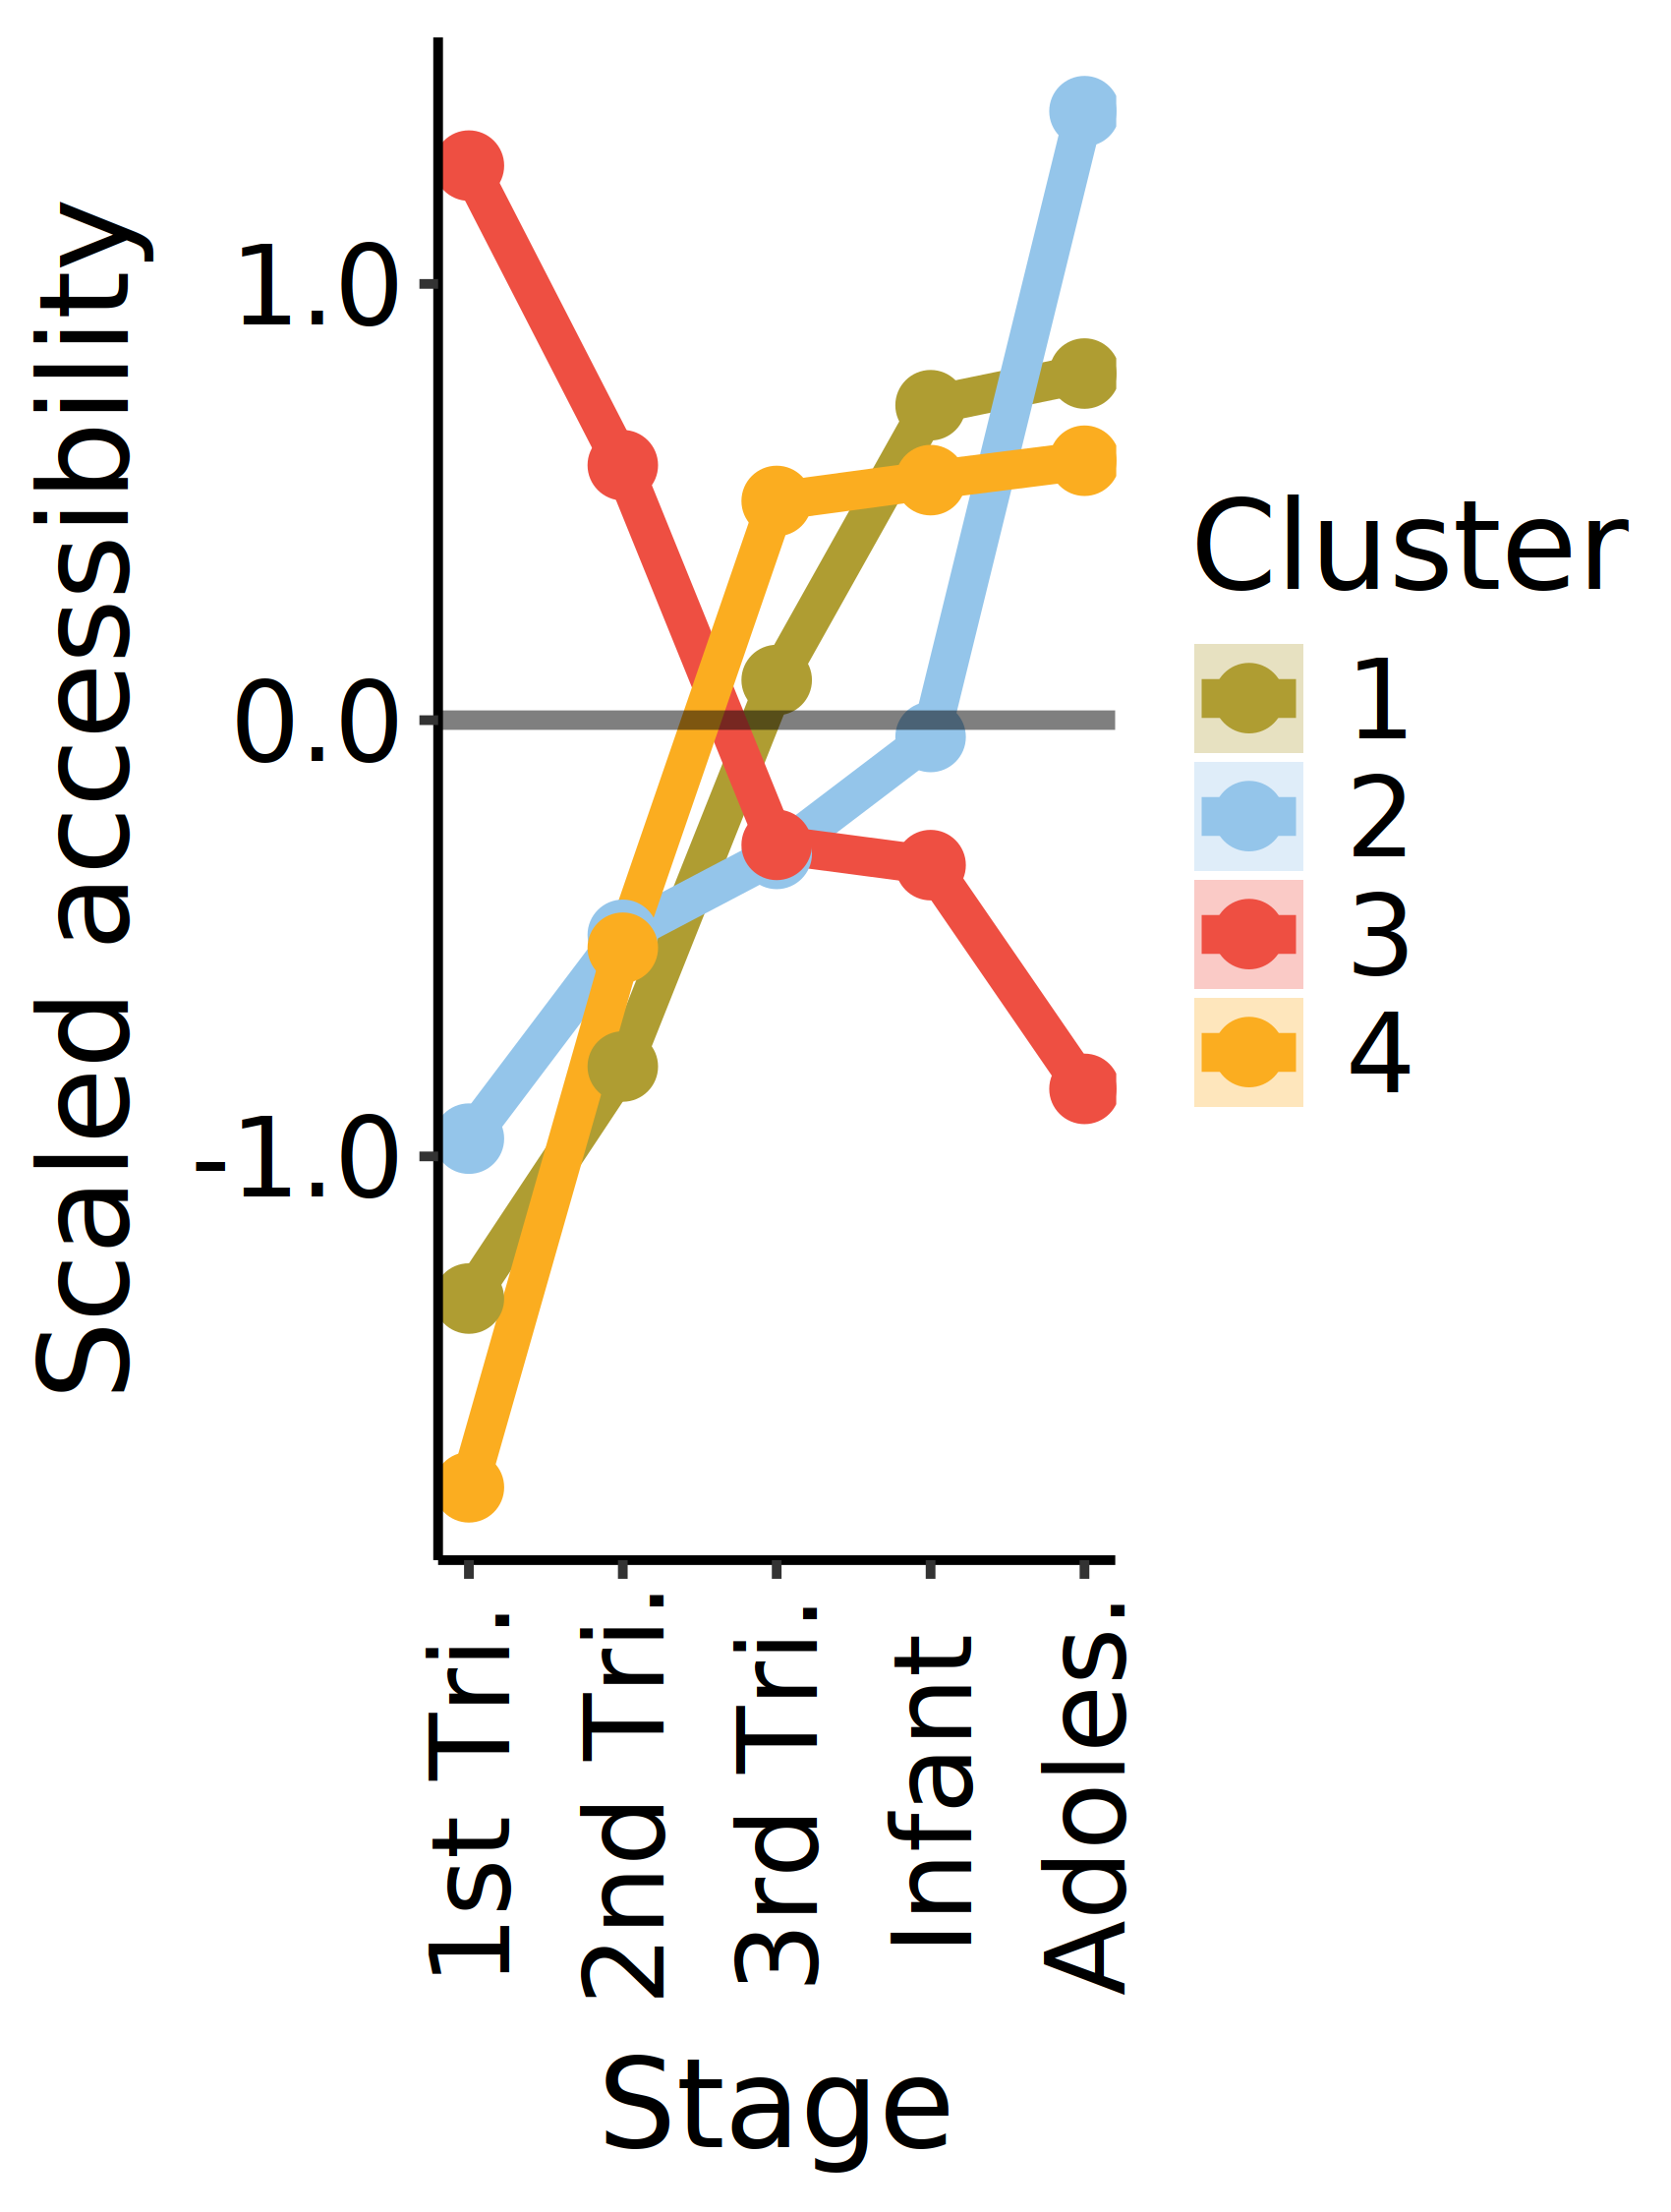

In [55]:
options(repr.plot.width=3.4, repr.plot.height=4.5,repr.plot.res=500)

scaleFUN <- function(x) sprintf("%.1f", x)
ggplot(sample_df_melt_summary, aes(x=Time, y=value, group=cluster, color=cluster)) + 
    geom_ribbon(aes(x=as.numeric(Time),ymax = value + se, ymin = value - se,fill=cluster,color=cluster),
              alpha = 0.3,
              linetype=0) + 
    geom_line(aes(group=cluster),linewidth=2) +
    geom_point(size=4) + 
geom_hline(yintercept=0,lwd=1,linetype=1,alpha=0.5) + theme_classic() +
ylab('Scaled accessibility') +
xlab('Stage') +
scale_y_continuous(labels=scaleFUN) +
theme(legend.position='right',
     axis.text=element_text(size=16,color='black'),
      legend.text=element_text(size=16,color='black'),
      legend.margin=margin(0,8,0,0),
      axis.text.x=element_text(angle=90,vjust=0.5,margin=margin(5,0,0,0)),
     axis.title=element_text(size=18,color='black'),
      legend.title=element_text(size=18,color='black'),
     axis.title.y = element_text(margin = margin(0,5,0,0)),
     axis.title.x = element_text(margin = margin(12,0,0,0))) + 
scale_x_continuous(breaks=seq(1,5,1),
                   labels = c('1st Tri.',
                           '2nd Tri.',
                           '3rd Tri.',
                           'Infant',
                           'Adoles.')) + 
scale_color_manual(name = 'Cluster', values = as.vector(paletteer::paletteer_d("fishualize::Pseudocheilinus_tetrataenia")[c(3,4,1,2)])) +
scale_fill_manual(name = 'Cluster', values = as.vector(paletteer::paletteer_d("fishualize::Pseudocheilinus_tetrataenia")[c(3,4,1,2)]))

# Compare to liftover mouse GR binding sites for Ext. Fig. 10

In [56]:
# Read in GR sites (lifted already to hg38)
GR_sites <- rtracklayer::import.bed('/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_DR_NR/CR01_count_edger_report_str_FC25.col.human.bed')

In [57]:
c1 <- t.clust[t.clust$cluster==1,]
c2 <- t.clust[t.clust$cluster==2,]
c3 <- t.clust[t.clust$cluster==3,]
c4 <- t.clust[t.clust$cluster==4,]

In [58]:
# Convert human maturation ATAC sites to granges objects
c1_gr <- GRanges(
    seqnames = do.call(rbind,strsplit(rownames(c1),'-'))[,1], 
    ranges = IRanges(start = as.numeric(do.call(rbind,strsplit(rownames(c1),'-'))[,2]),      
                     end = as.numeric(do.call(rbind,strsplit(rownames(c1),'-'))[,3])))

c2_gr <- GRanges(
    seqnames = do.call(rbind,strsplit(rownames(c2),'-'))[,1], 
    ranges = IRanges(start = as.numeric(do.call(rbind,strsplit(rownames(c2),'-'))[,2]),      
                     end = as.numeric(do.call(rbind,strsplit(rownames(c2),'-'))[,3])))

c3_gr <- GRanges(
    seqnames = do.call(rbind,strsplit(rownames(c3),'-'))[,1], 
    ranges = IRanges(start = as.numeric(do.call(rbind,strsplit(rownames(c3),'-'))[,2]),      
                     end = as.numeric(do.call(rbind,strsplit(rownames(c3),'-'))[,3])))

c4_gr <- GRanges(
    seqnames = do.call(rbind,strsplit(rownames(c4),'-'))[,1], 
    ranges = IRanges(start = as.numeric(do.call(rbind,strsplit(rownames(c4),'-'))[,2]),      
                     end = as.numeric(do.call(rbind,strsplit(rownames(c4),'-'))[,3])))

# Generate total ATAC sites as background for Fisher's test
DefaultAssay(human_multiome_astro_v2) <- 'peaks'
total_gr <- GRanges(
    seqnames = do.call(rbind,strsplit(rownames(human_multiome_astro_v2),'-'))[,1], 
    ranges = IRanges(start = as.numeric(do.call(rbind,strsplit(rownames(human_multiome_astro_v2),'-'))[,2]),      
                     end = as.numeric(do.call(rbind,strsplit(rownames(human_multiome_astro_v2),'-'))[,3])))

In [59]:
table(t.clust$cluster)


   1    2    3    4 
2552  375 2518 1661 

In [70]:
# Compute overlap with each cluster
overlap_df <- data.frame(overlap = c(length(findOverlaps(GR_sites, c1_gr)) / length(c1_gr),
                       length(findOverlaps(GR_sites, c2_gr)) / length(c2_gr),
                       length(findOverlaps(GR_sites, c3_gr)) / length(c3_gr),
                       length(findOverlaps(GR_sites, c4_gr)) / length(c4_gr)),
          oldcluster = c('1','2','3','4'),
           newcluster = c('3','1','4','2'))
overlap_df$overlap <- overlap_df$overlap * 100
overlap_df$x <- '1'

In [71]:
# Calculate overlaps for Fisher test
ov1 <- rbind(data.frame(neg = length(c1_gr) - length(findOverlaps(c1_gr,GR_sites)),
                        pos = length(findOverlaps(c1_gr,GR_sites))),
             data.frame(neg = length(total_gr[-subjectHits(findOverlaps(c1_gr,total_gr))]) - length(findOverlaps(GR_sites,total_gr[-subjectHits(findOverlaps(c1_gr,total_gr))])),
                        pos = length(findOverlaps(GR_sites,total_gr[-subjectHits(findOverlaps(c1_gr,total_gr))]))))

ov2 <- rbind(data.frame(neg = length(c2_gr) - length(findOverlaps(c2_gr, GR_sites)),
                        pos = length(findOverlaps(c2_gr,GR_sites))),
             data.frame(neg = length(total_gr[-subjectHits(findOverlaps(c2_gr,total_gr))]) - length(findOverlaps(GR_sites,total_gr[-subjectHits(findOverlaps(c2_gr,total_gr))])),
                        pos = length(findOverlaps(GR_sites,total_gr[-subjectHits(findOverlaps(c2_gr,total_gr))]))))

ov3 <- rbind(data.frame(neg = length(c3_gr) - length(findOverlaps(c3_gr,GR_sites)),
                        pos = length(findOverlaps(c3_gr,GR_sites))),
             data.frame(neg = length(total_gr[-subjectHits(findOverlaps(c3_gr,total_gr))]) - length(findOverlaps(GR_sites,total_gr[-subjectHits(findOverlaps(c3_gr,total_gr))])),
                        pos = length(findOverlaps(GR_sites,total_gr[-subjectHits(findOverlaps(c3_gr,total_gr))]))))

ov4 <- rbind(data.frame(neg = length(c4_gr) - length(findOverlaps(c4_gr,GR_sites)),
                        pos = length(findOverlaps(c4_gr,GR_sites))),
             data.frame(neg = length(total_gr[-subjectHits(findOverlaps(c4_gr,total_gr))]) - length(findOverlaps(GR_sites,total_gr[-subjectHits(findOverlaps(c4_gr,total_gr))])),
                        pos = length(findOverlaps(GR_sites,total_gr[-subjectHits(findOverlaps(c4_gr,total_gr))]))))

In [72]:
# Add Fisher test results to object
overlap_df$pval <- c(fisher.test(ov1,alternative='less')$p.value,
                     fisher.test(ov2,alternative='less')$p.value,
                     fisher.test(ov3,alternative='less')$p.value,
                     fisher.test(ov4,alternative='less')$p.value)
overlap_df$logpval <- -log10(overlap_df$pval)

In [80]:
# Set order for plotting
overlap_df$oldcluster <- factor(overlap_df$oldcluster, levels = rev(c('3','1','4','2')))

In [81]:
overlap_df

overlap   oldcluster newcluster x pval         logpval     
1  8.228840 1          3          1 1.246863e-18 1.790418e+01
2  2.400000 2          1          1 9.829240e-01 7.480076e-03
3  1.826847 3          4          1 1.000000e+00 3.256052e-13
4 14.810355 4          2          1 1.304991e-63 6.288439e+01

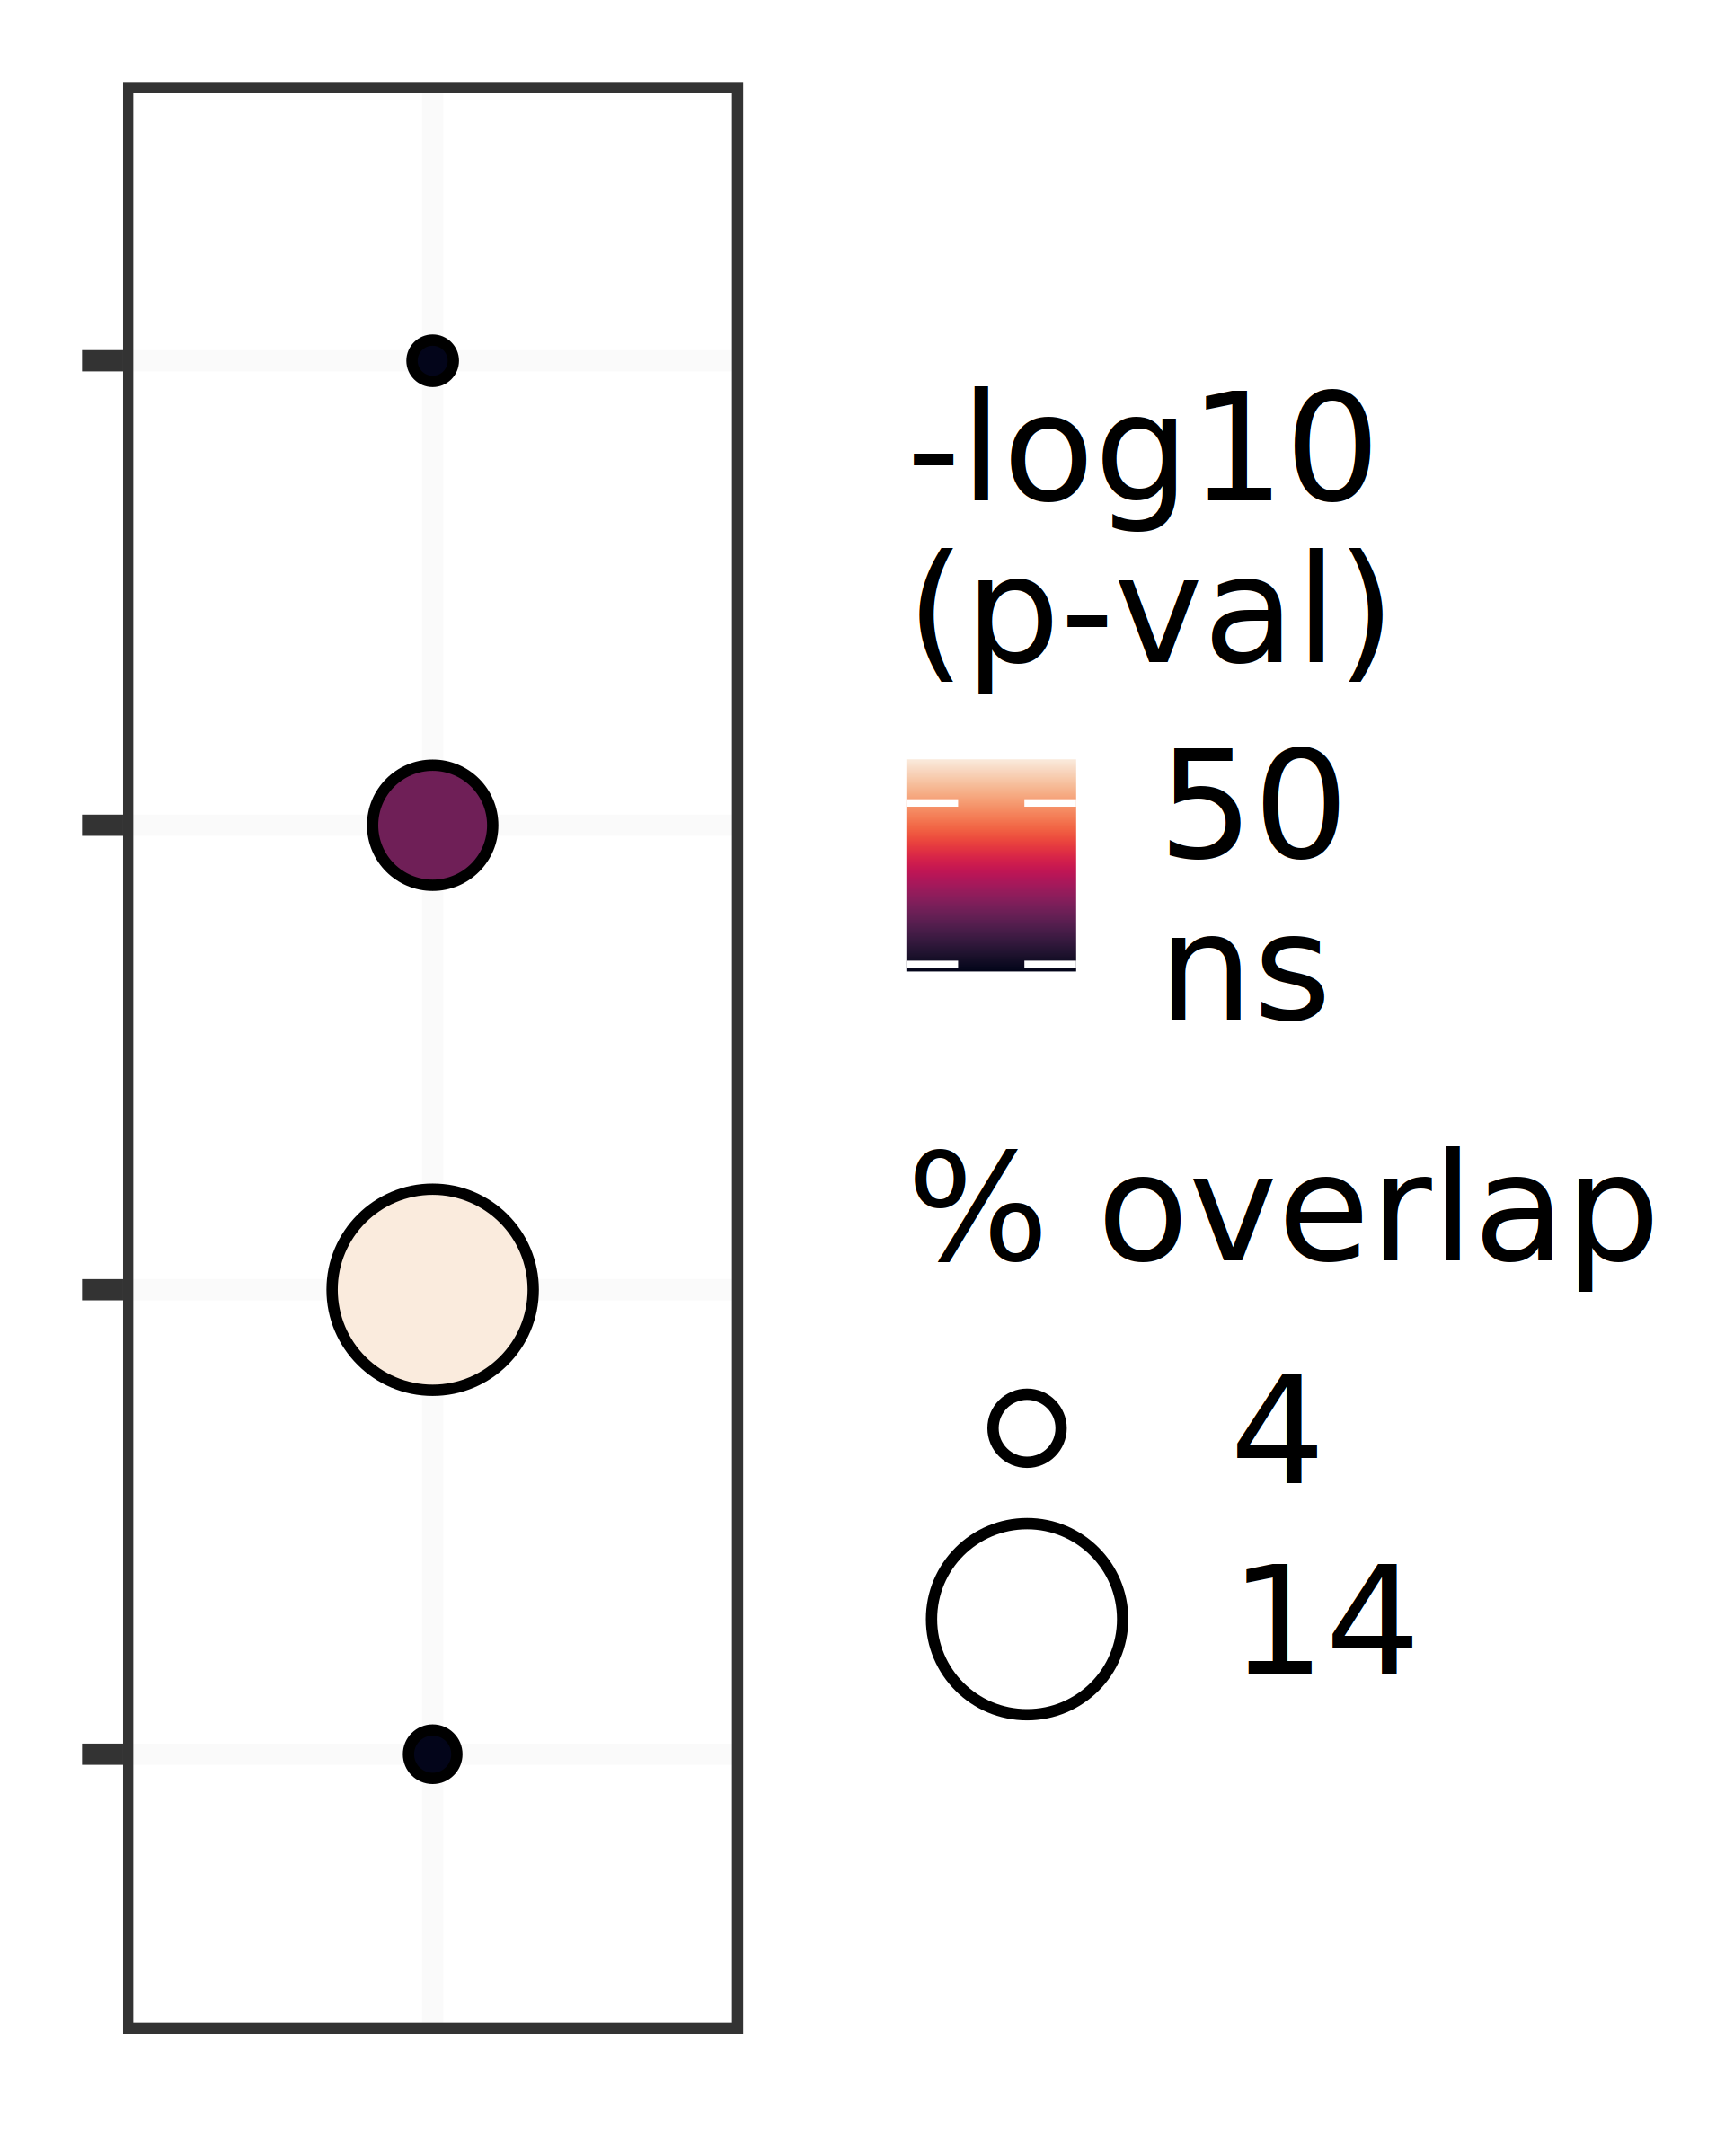

In [87]:
options(repr.plot.width=1.6, repr.plot.height=2.0,repr.plot.res=1200)

ggplot(overlap_df, aes(x=x, y=oldcluster, size = overlap, fill=logpval)) +
    geom_point(shape=21,alpha=1,stroke=0.4) + theme_bw() + scale_radius(breaks = c(4,14)) + theme(axis.title = element_blank(),
                                                                    axis.text.x = element_blank(),
                                                                    panel.grid.major = element_line(color = "grey98"),
                                                                    axis.text.y = element_blank(),
                                                                    legend.title=element_text(hjust=0,size=10),
                                                                    legend.text=element_text(size=10),
                                                                    legend.margin=margin(0,5,0,0),
                                                                    legend.key.height = unit(1,'mm'),
                                                                    legend.key.width = unit(4,'mm'),
                                                                    legend.position='right',
                                                                    axis.ticks.x = element_blank()) + labs(size = "% overlap",fill='-log10\n(p-val)') +
scale_fill_viridis(option='rocket',breaks=c(2,50),labels=c('ns','50')) 

# Generate human multiome UMAP for Ext. Fig. 10a

In [ ]:
unique(human_multiome_astro_v2$region_summary)

In [ ]:
unique(human_multiome_astro_v2$Group)

In [ ]:
options(repr.plot.width = 4.5*1.5, repr.plot.height = 3*1.5, repr.plot.res=500)

human_multiome_astro_v2$Group <- factor(human_multiome_astro_v2$Group,levels=
                                                 c('First_trimester','Second_trimester','Third_trimester','Infancy','Adolescence'))

p1 <- DimPlot(human_multiome_astro_v2, group.by = 'Group',shuffle=T) + theme_void() + theme(plot.title=element_blank(),
                                                                                            plot.margin=margin(0,10,0,0),
                                                                                            legend.position='none') + 
scale_color_manual(values = c(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[1],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[8],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[12],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[17],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[23]))

human_multiome_astro_v2$region_summary <- factor(human_multiome_astro_v2$region_summary,levels = c('General',
                                                                                                   'PFC',
                                                                                                   'V1'))
                                                 
p2 <- DimPlot(human_multiome_astro_v2, group.by = 'region_summary',shuffle=T) + theme_void() + theme(plot.title=element_blank(),
                                                                                                     plot.margin=margin(0,0,0,10),
                                                                                                    legend.position='none') + 
scale_color_manual(values=c('grey70',
                   paletteer::paletteer_d("colorBlindness::Blue2Orange8Steps")[1],
                   paletteer::paletteer_d("colorBlindness::Blue2Orange8Steps")[8]))

p1 + p2

In [ ]:
###

In [ ]:
human_multiome_astro_agg <- AggregateExpression(human_multiome_astro, group.by = 'Ident')$RNA

In [ ]:
smallestGroupSize <- 4
threshold <- mean(colSums(human_multiome_astro_agg) * 0.00001)
keep <- rowSums(human_multiome_astro_agg >= threshold) >= smallestGroupSize
cts_df_filt <- human_multiome_astro_agg[keep,]

# Create groupings
group <- factor(c(rep('Second_trimester',11),
              'Third_trimester',
              rep('First_trimester',4),
              rep('Infancy',4),
              'Third_trimester',
              rep('Adolescence',2),
              rep('Infancy',6),
              rep('Adolescence',6),
              rep('Third_trimester',3)))
# Create edgeR object
y <- DGEList(counts=cts_df_filt,group=group)
# Normalize, create model, estimate dispersions
y <- normLibSizes(y)
design <- model.matrix(~0 + group)

# Estimate & Fit dispersion
y <- estimateDisp(y, design)
fit <- glmQLFit(y, design)
# Collect results
res <- as.data.frame(topTags(glmQLFTest(fit, contrast=c(1,-1,0,0,0)),n=Inf))

# Generate RNA & track plots for Fig. 3 & Ext. Fig. 10

In [3]:
# Load in dataset
human_multiome_astro_v2 <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250427_human_multiome_astro_v2.rds')

In [4]:
# Aggregate counts
human_multiome_astro_agg <- AggregateExpression(human_multiome_astro_v2,
                                                assays = 'RNA',
                                                group.by = 'Ident',
                                                return.seurat = TRUE)

Centering and scaling data matrix



In [5]:
# Create metadata
meta_df <- unique(data.frame(human_multiome_astro_v2@meta.data[human_multiome_astro_v2$Ident %in% human_multiome_astro_v2$Ident,'Ident'],
           human_multiome_astro_v2@meta.data[human_multiome_astro_v2$Ident %in% human_multiome_astro_v2$Ident,c('Group','region_summary')]))
metadata_df <- data.frame(Sample = meta_df[,1],
                          Group = meta_df[,2],
                          Region = meta_df[,3],
                          Group_region = paste0(meta_df[,2], '_', meta_df[,3]))

In [5]:
# Create deseq2 object
deseq_obj <- DESeqDataSetFromMatrix(countData = GetAssayData(human_multiome_astro_agg,slot='counts'),
                              colData = metadata_df[match(colnames(GetAssayData(human_multiome_astro_agg,slot='counts')),metadata_df$Sample),],
                              design = ~ Group)

Warning message:
"The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead."
converting counts to integer mode



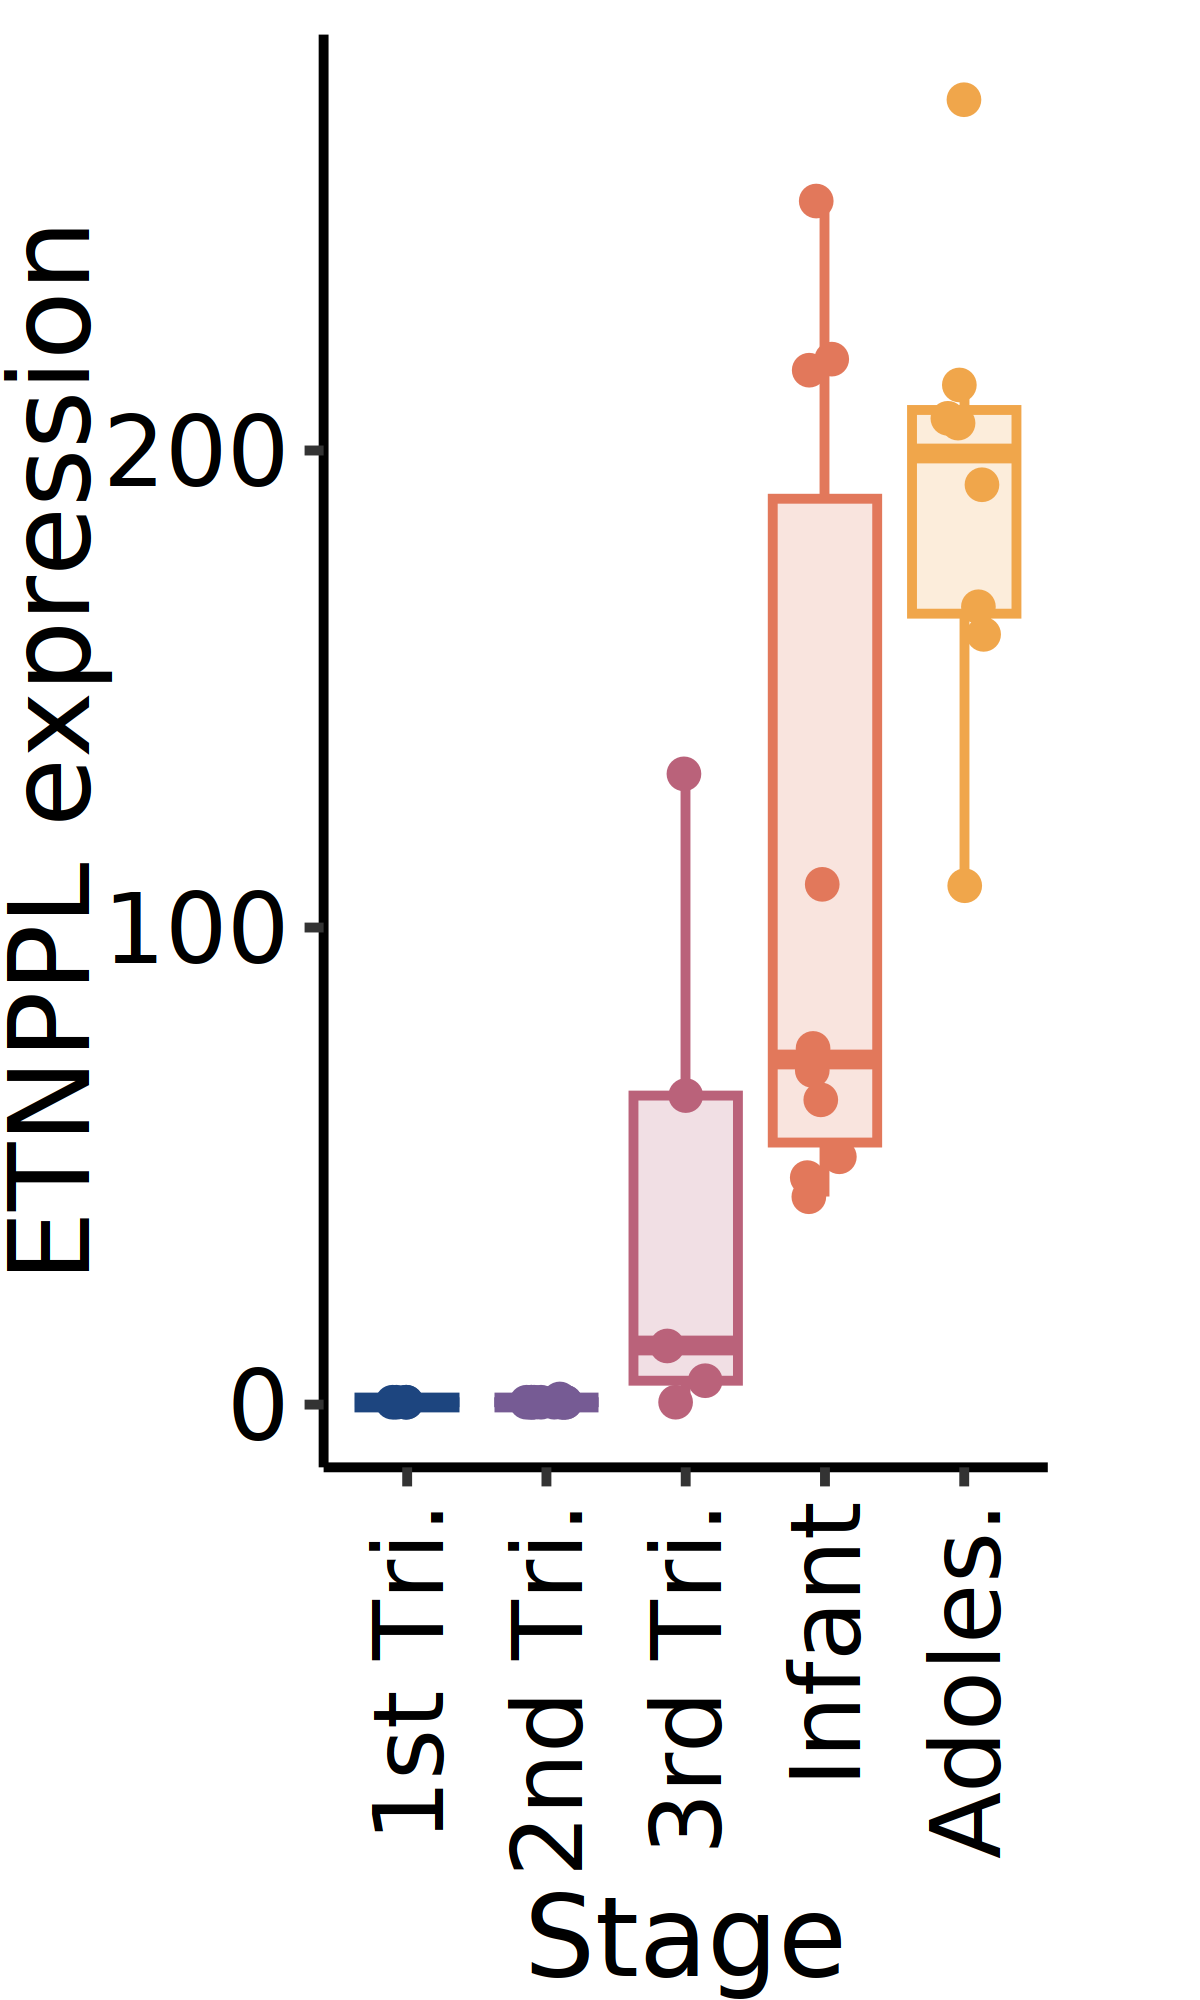

In [16]:
# Generate boxplots
options(repr.plot.width=2.4, repr.plot.height=4,repr.plot.res=500)
goi <- 'ETNPPL'
data <- plotCounts(deseq_obj, gene = goi, intgroup = c('Group'),returnData = TRUE)

data$Group <- gsub('First_trimester', '1st Tri.',data$Group)
data$Group <- gsub('Second_trimester', '2nd Tri.',data$Group)
data$Group <- gsub('Third_trimester', '3rd Tri.',data$Group)
data$Group <- gsub('Infancy', 'Infant',          data$Group)
data$Group <- gsub('Adolescence', 'Adoles.',     data$Group)

data$Group <- factor(data$Group, levels = c('1st Tri.','2nd Tri.',
                                           '3rd Tri.','Infant','Adoles.'))

ggplot(data, aes(x=Group, y=count, color=Group,fill=Group)) + 
 geom_boxplot(alpha=0.2,outlier.size=0)+
  geom_point(size=1.5, shape=21,position = position_jitterdodge(jitter.width=1))  + theme_classic()  + 
theme(axis.title = element_text(size=16,color='black'),
      axis.text = element_text(size=14,color='black'),
      axis.text.x = element_text(angle=90,vjust=0.5,hjust=1),
      legend.text = element_text(size=14,color='black'),
      axis.title.y = element_text(margin = margin(0,2,0,0)),
      axis.title.x = element_text(margin = margin(10,0,0,0)),
       plot.margin=margin(5,22,0,1),
        legend.box.margin=margin(0,0,-10,-10),
     legend.position='none') + #ylim(c(0,max(data$count) * 1.1)) +
scale_color_manual(values = c(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[1],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[8],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[12],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[17],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[23])) +
scale_fill_manual(values = c(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[1],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[8],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[12],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[17],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[23])) +
guides(fill = "none") + labs(color="") + labs(x = 'Stage', y = paste0(goi, ' expression'))

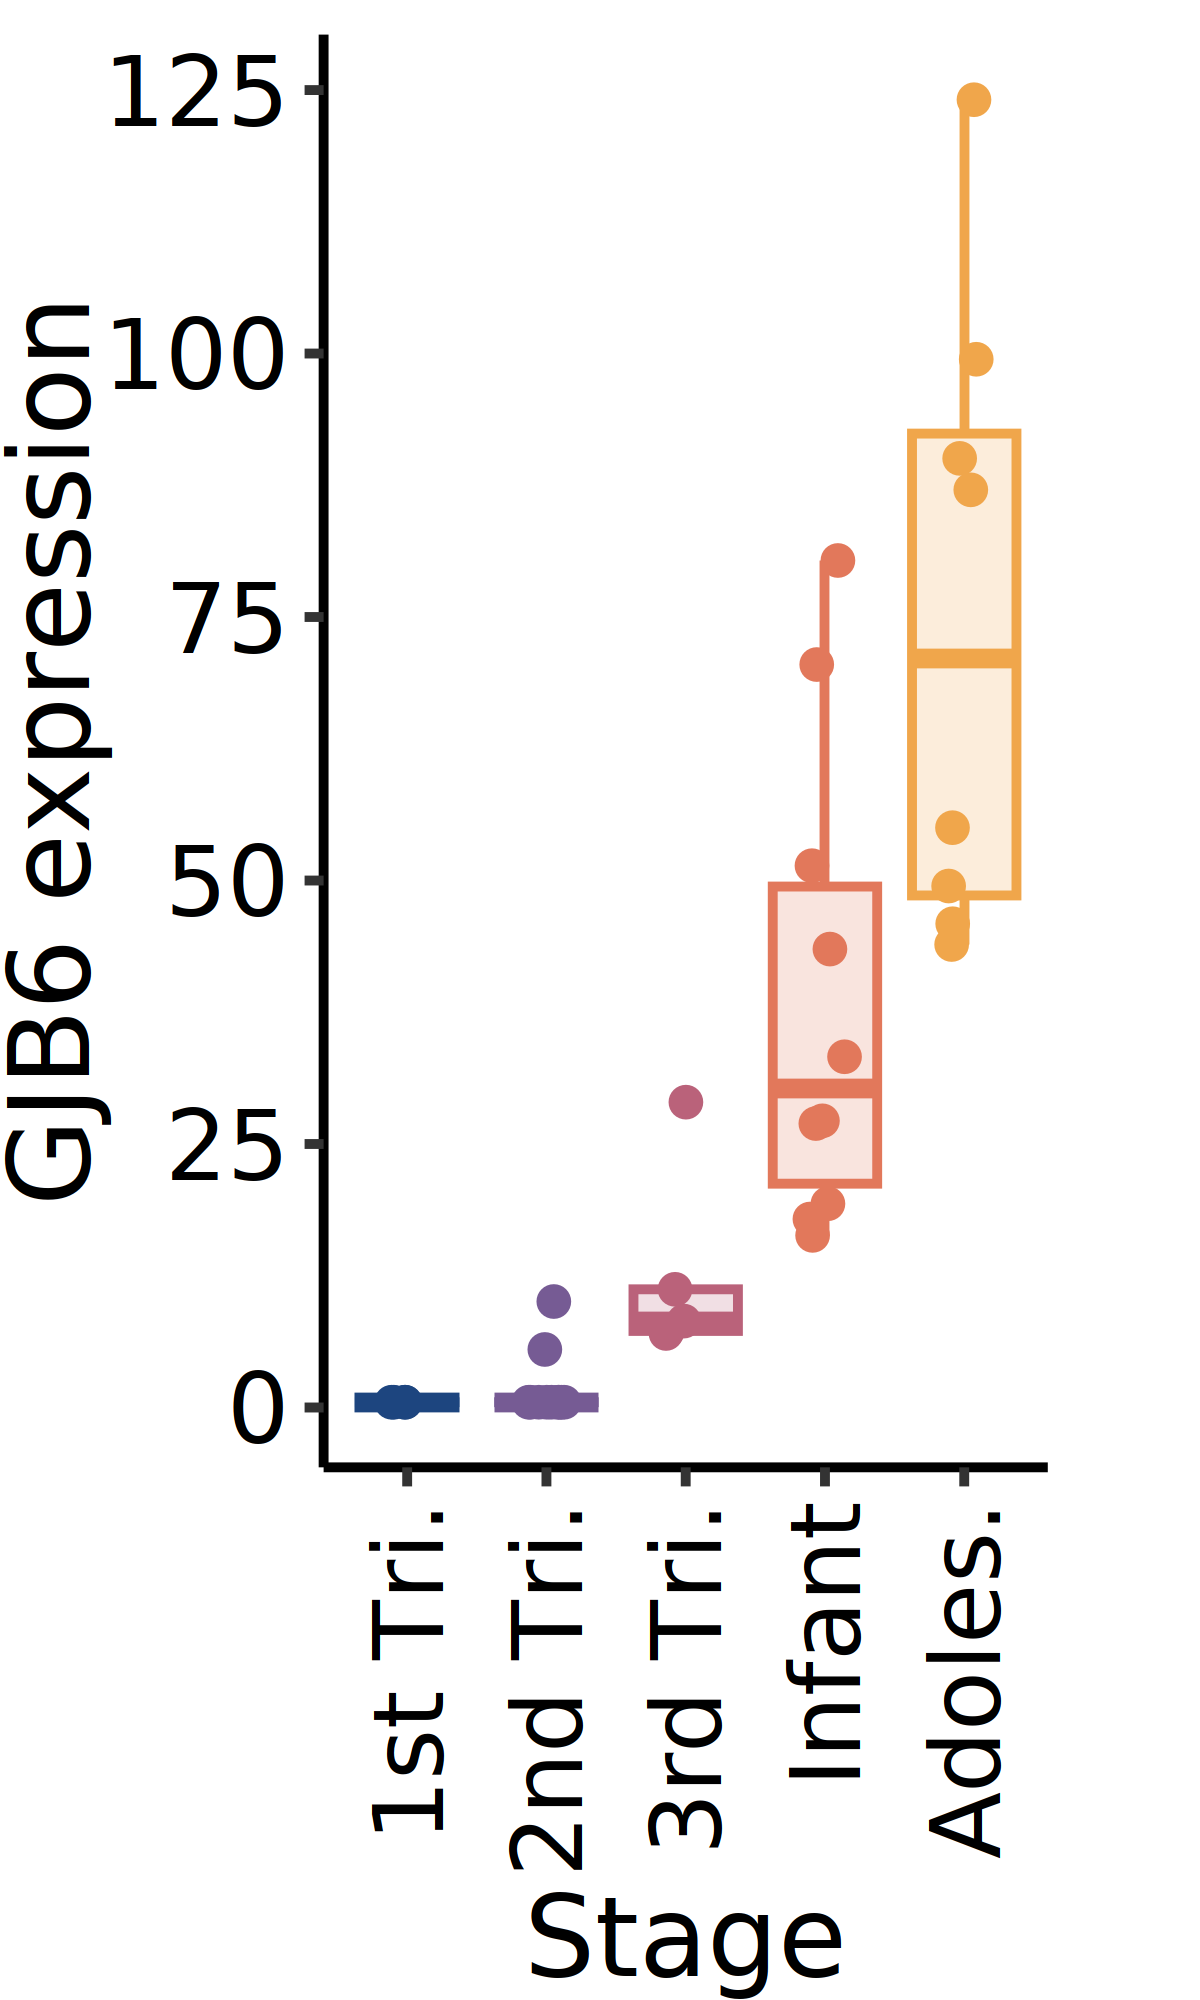

In [47]:
# Generate boxplots
options(repr.plot.width=2.4, repr.plot.height=4,repr.plot.res=500)
goi <- 'GJB6'
data <- plotCounts(deseq_obj, gene = goi, intgroup = c('Group'),returnData = TRUE)

data$Group <- gsub('First_trimester', '1st Tri.',data$Group)
data$Group <- gsub('Second_trimester', '2nd Tri.',data$Group)
data$Group <- gsub('Third_trimester', '3rd Tri.',data$Group)
data$Group <- gsub('Infancy', 'Infant',          data$Group)
data$Group <- gsub('Adolescence', 'Adoles.',     data$Group)

data$Group <- factor(data$Group, levels = c('1st Tri.','2nd Tri.',
                                           '3rd Tri.','Infant','Adoles.'))

ggplot(data, aes(x=Group, y=count, color=Group,fill=Group)) + 
 geom_boxplot(alpha=0.2,outlier.size=0)+
  geom_point(size=1.5, shape=21,position = position_jitterdodge(jitter.width=1))  + theme_classic()  + 
theme(axis.title = element_text(size=16,color='black'),
      axis.text = element_text(size=14,color='black'),
      axis.text.x = element_text(angle=90,vjust=0.5,hjust=1),
      legend.text = element_text(size=14,color='black'),
      axis.title.y = element_text(margin = margin(0,2,0,0)),
      axis.title.x = element_text(margin = margin(10,0,0,0)),
       plot.margin=margin(5,22,0,1),
        legend.box.margin=margin(0,0,-10,-10),
     legend.position='none') + #ylim(c(0,max(data$count) * 1.1)) +
scale_color_manual(values = c(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[1],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[8],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[12],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[17],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[23])) +
scale_fill_manual(values = c(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[1],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[8],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[12],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[17],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[23])) +
guides(fill = "none") + labs(color="") + labs(x = 'Stage', y = paste0(goi, ' expression'))

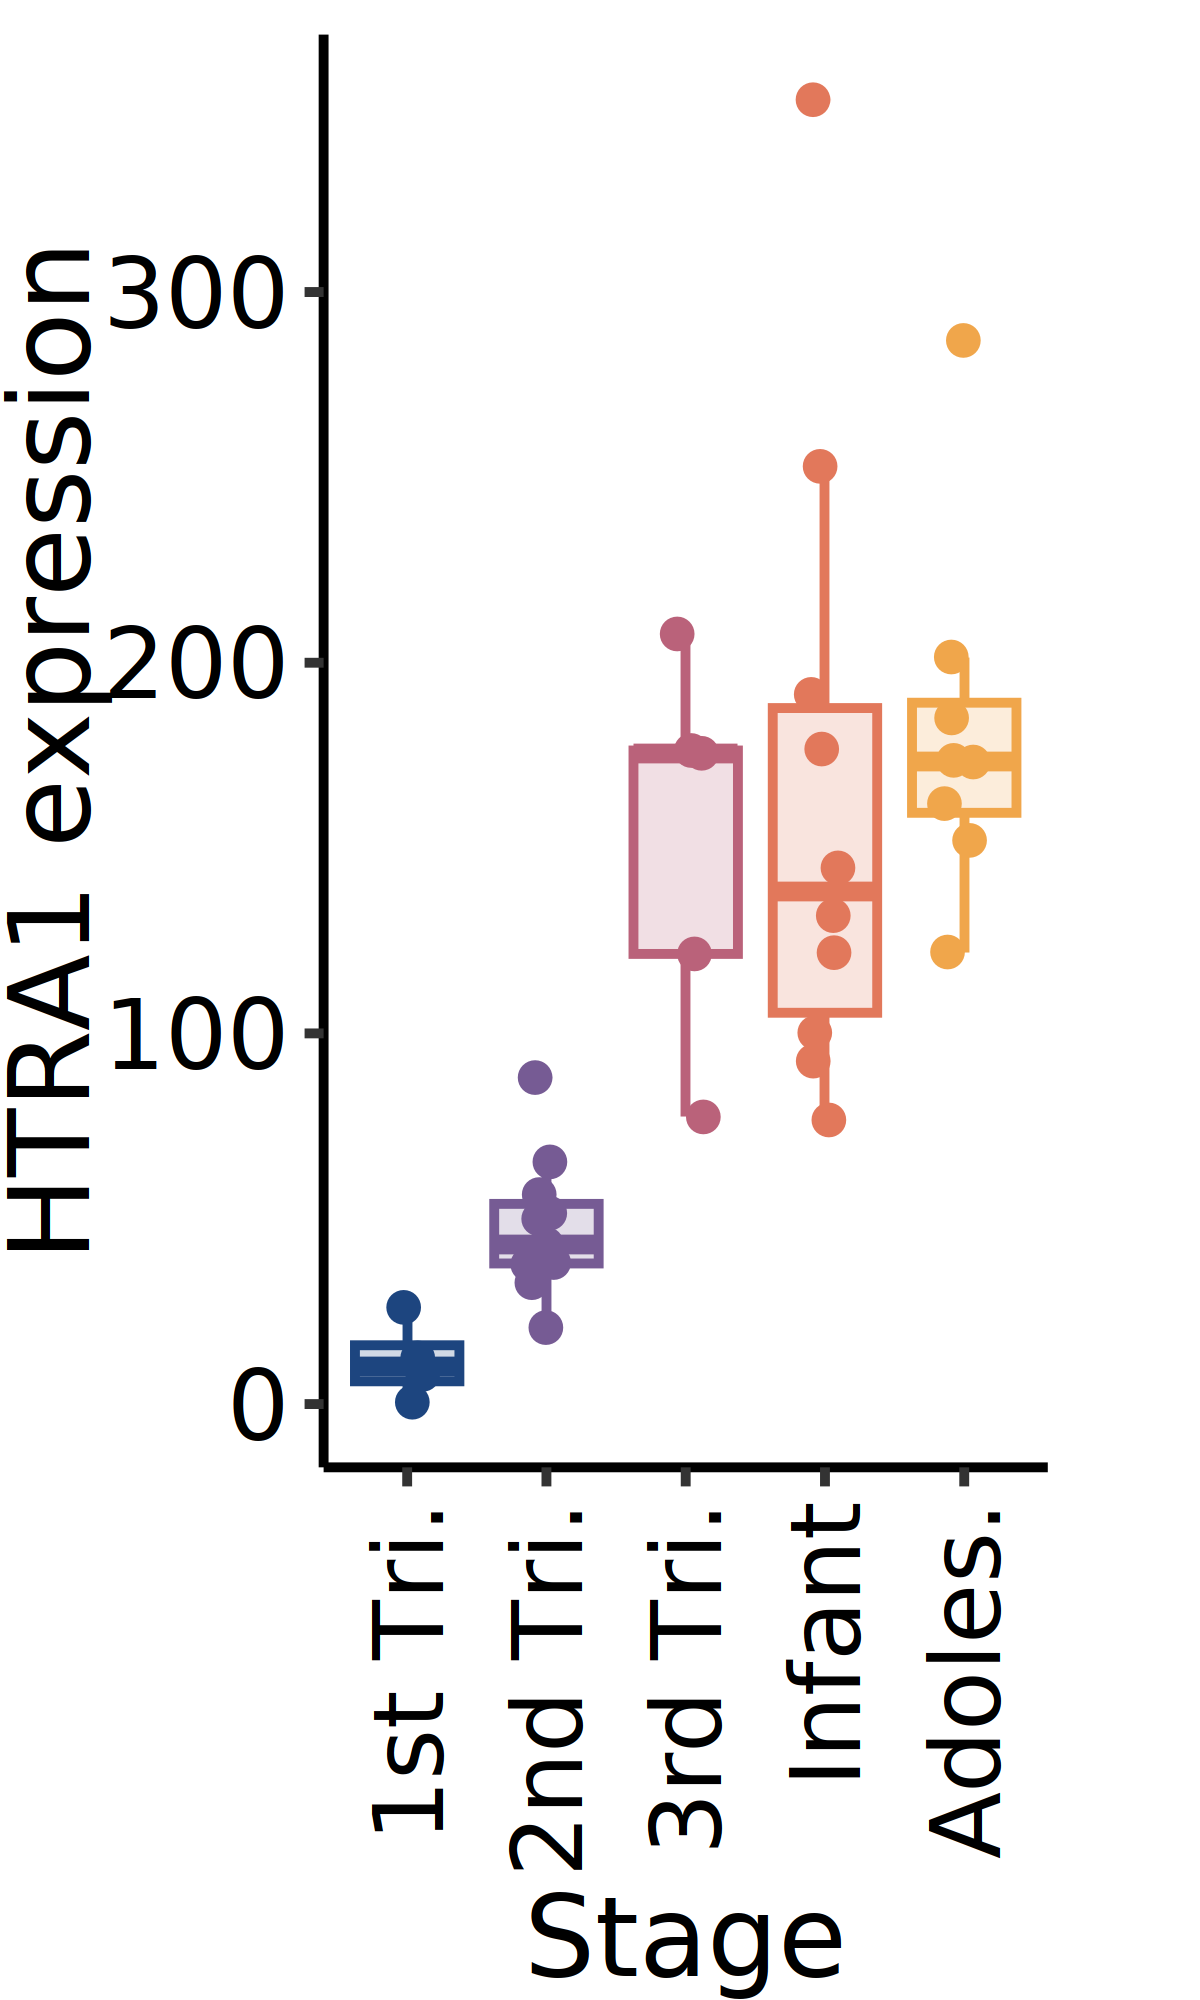

In [48]:
# Generate boxplots
options(repr.plot.width=2.4, repr.plot.height=4,repr.plot.res=500)
goi <- 'HTRA1'
data <- plotCounts(deseq_obj, gene = goi, intgroup = c('Group'),returnData = TRUE)

data$Group <- gsub('First_trimester', '1st Tri.',data$Group)
data$Group <- gsub('Second_trimester', '2nd Tri.',data$Group)
data$Group <- gsub('Third_trimester', '3rd Tri.',data$Group)
data$Group <- gsub('Infancy', 'Infant',          data$Group)
data$Group <- gsub('Adolescence', 'Adoles.',     data$Group)

data$Group <- factor(data$Group, levels = c('1st Tri.','2nd Tri.',
                                           '3rd Tri.','Infant','Adoles.'))

ggplot(data, aes(x=Group, y=count, color=Group,fill=Group)) + 
 geom_boxplot(alpha=0.2,outlier.size=0)+
  geom_point(size=1.5, shape=21,position = position_jitterdodge(jitter.width=1))  + theme_classic()  + 
theme(axis.title = element_text(size=16,color='black'),
      axis.text = element_text(size=14,color='black'),
      axis.text.x = element_text(angle=90,vjust=0.5,hjust=1),
      legend.text = element_text(size=14,color='black'),
      axis.title.y = element_text(margin = margin(0,2,0,0)),
      axis.title.x = element_text(margin = margin(10,0,0,0)),
       plot.margin=margin(5,22,0,1),
        legend.box.margin=margin(0,0,-10,-10),
     legend.position='none') + #ylim(c(0,max(data$count) * 1.1)) +
scale_color_manual(values = c(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[1],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[8],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[12],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[17],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[23])) +
scale_fill_manual(values = c(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[1],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[8],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[12],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[17],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[23])) +
guides(fill = "none") + labs(color="") + labs(x = 'Stage', y = paste0(goi, ' expression'))

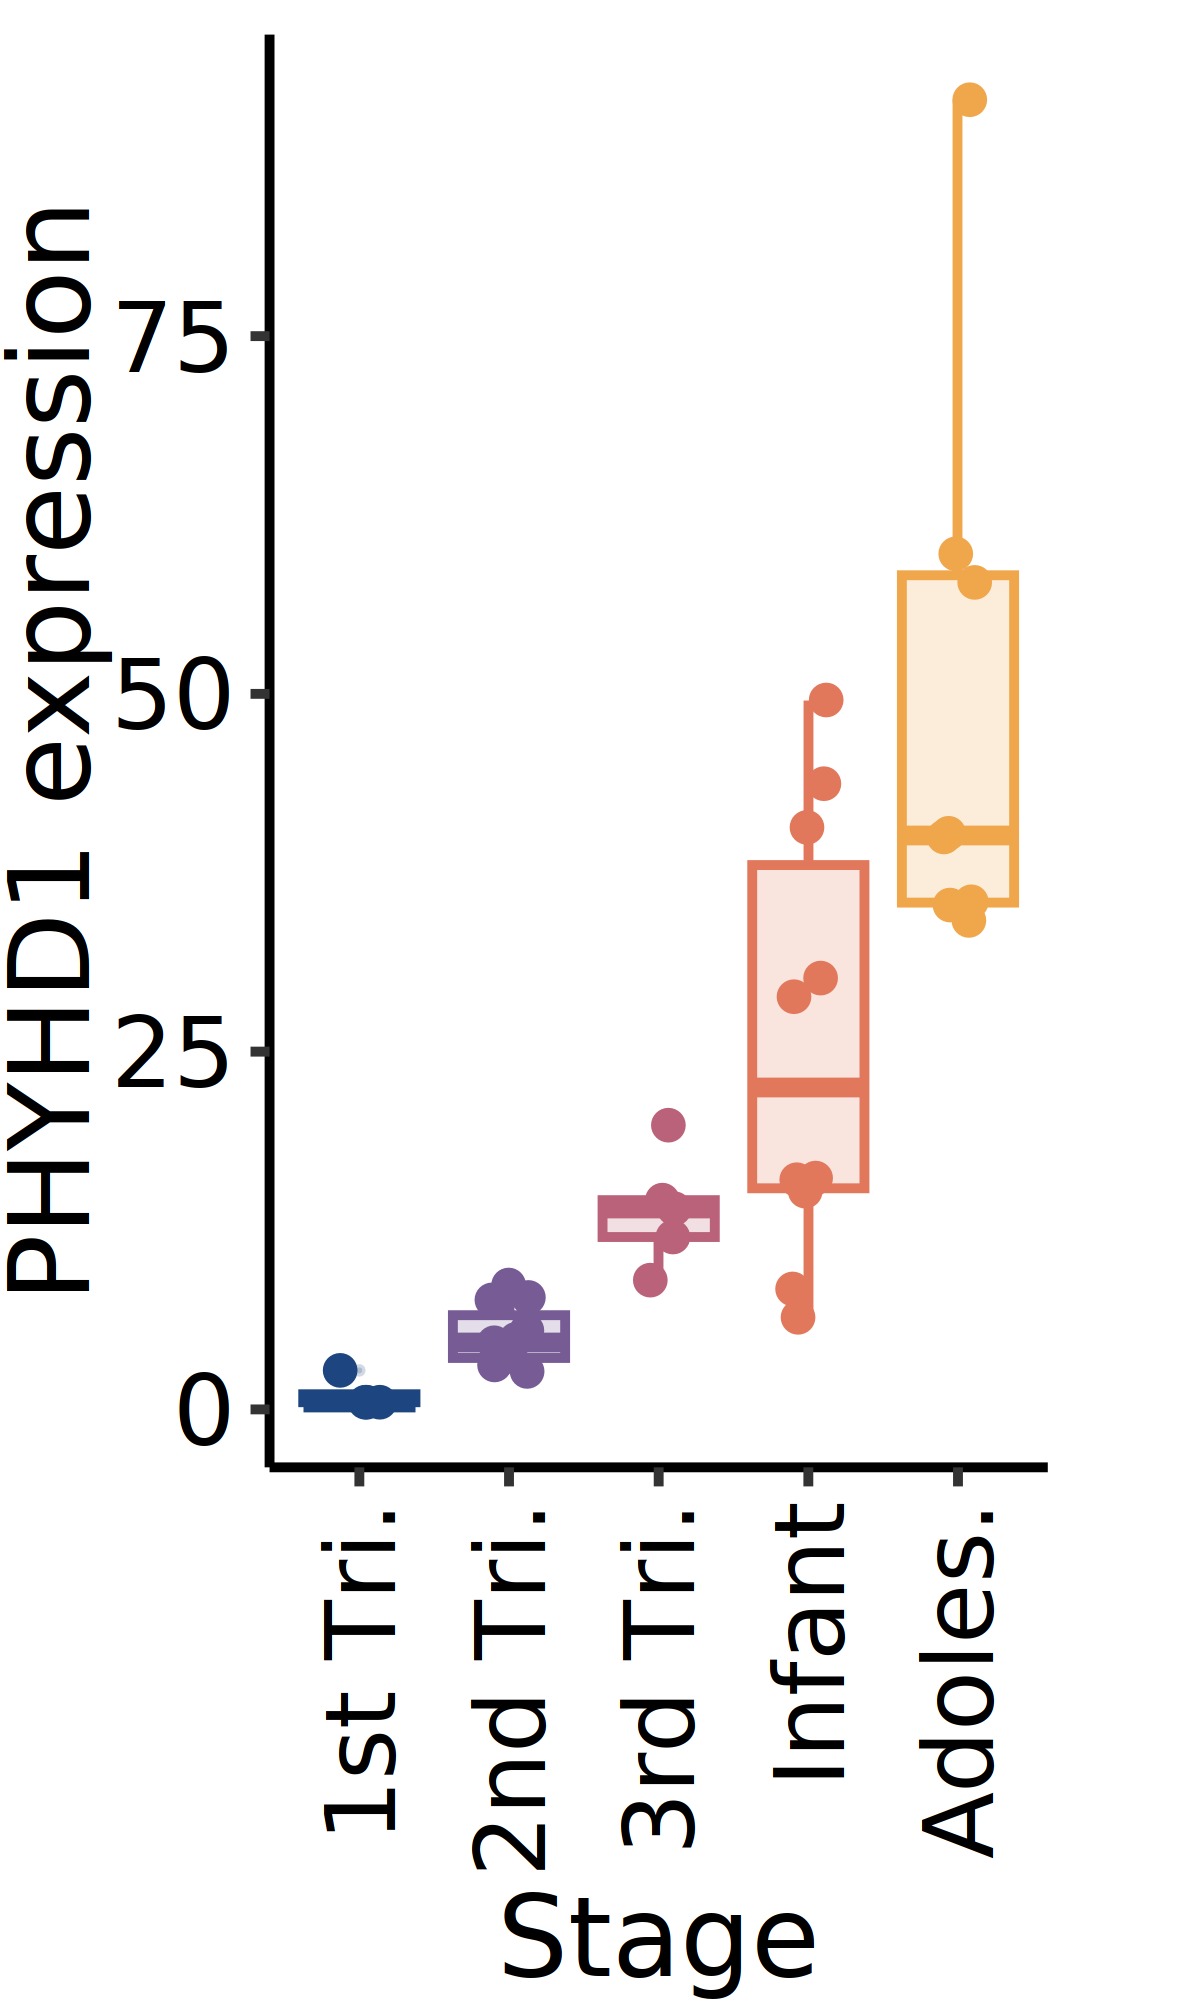

In [226]:
# Generate boxplots
options(repr.plot.width=2.4, repr.plot.height=4,repr.plot.res=500)
goi <- 'PHYHD1'
data <- plotCounts(deseq_obj, gene = goi, intgroup = c('Group'),returnData = TRUE)

data$Group <- gsub('First_trimester', '1st Tri.',data$Group)
data$Group <- gsub('Second_trimester', '2nd Tri.',data$Group)
data$Group <- gsub('Third_trimester', '3rd Tri.',data$Group)
data$Group <- gsub('Infancy', 'Infant',          data$Group)
data$Group <- gsub('Adolescence', 'Adoles.',     data$Group)

data$Group <- factor(data$Group, levels = c('1st Tri.','2nd Tri.',
                                           '3rd Tri.','Infant','Adoles.'))

ggplot(data, aes(x=Group, y=count, color=Group,fill=Group)) + 
 geom_boxplot(alpha=0.2,outlier.size=0)+
  geom_point(size=1.5, shape=21,position = position_jitterdodge(jitter.width=1))  + theme_classic()  + 
theme(axis.title = element_text(size=16,color='black'),
      axis.text = element_text(size=14,color='black'),
      axis.text.x = element_text(angle=90,vjust=0.5,hjust=1),
      legend.text = element_text(size=14,color='black'),
      axis.title.y = element_text(margin = margin(0,2,0,0)),
      axis.title.x = element_text(margin = margin(10,0,0,0)),
       plot.margin=margin(5,22,0,1),
        legend.box.margin=margin(0,0,-10,-10),
     legend.position='none') + #ylim(c(0,max(data$count) * 1.1)) +
scale_color_manual(values = c(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[1],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[8],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[12],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[17],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[23])) +
scale_fill_manual(values = c(colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[1],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[8],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[12],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[17],
                              colorRampPalette(paletteer_d("PNWColors::Sunset2"))(24)[23])) +
guides(fill = "none") + labs(color="") + labs(x = 'Stage', y = paste0(goi, ' expression'))

In [6]:
# Change group labels for plotting
human_multiome_astro_v2$Group_plotting <- ifelse(human_multiome_astro_v2$Group == 'First_trimester','1st Tri.',
                                                 ifelse(human_multiome_astro_v2$Group == 'Second_trimester','2nd Tri.',
                                                        ifelse(human_multiome_astro_v2$Group == 'Third_trimester','3rd Tri.',
                                                               ifelse(human_multiome_astro_v2$Group == 'Infancy','Infant','Adoles.'))))

human_multiome_astro_v2$Group_plotting <- factor(human_multiome_astro_v2$Group_plotting,
                                                 levels = c('1st Tri.',
                                                            '2nd Tri.',
                                                            '3rd Tri.',
                                                            'Infant',
                                                            'Adoles.'))

Testing 1 genes and 109614 peaks

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': GL000194.1, GL000195.1, GL000205.2, GL000219.1, KI270713.1, KI270727.1, KI270728.1
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message in brewer.pal(1000, "Reds"):
"n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for fill is alrea

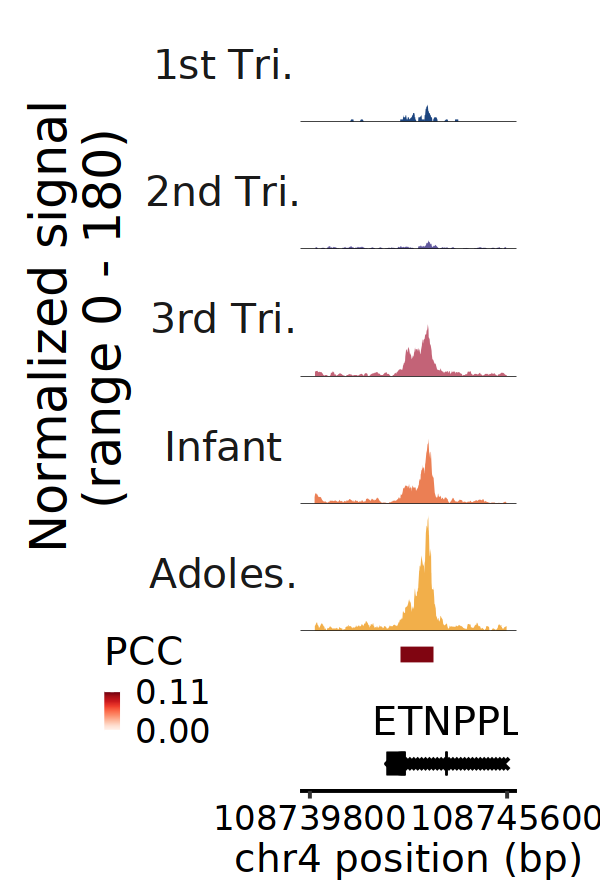

In [11]:
# Generate ETNPPL track
options(repr.plot.width = 3, repr.plot.height = 4.4, repr.plot.res = 700)

roi <- 'chr4-108739887-108745637'
min <- floor(as.numeric(str_split(roi,'-')[[1]][2]) / 100) * 100
max <- floor(as.numeric(str_split(roi,'-')[[1]][3]) / 100) * 100
goi <- 'ETNPPL' 
human_multiome_astro_v2 <- LinkPeaks(human_multiome_astro_v2, peak.assay = 'peaks', expression.assay = 'RNA', genes.use = goi,
                                 score_cutoff = 0.01)

#expr_plot <- ExpressionPlot(
#  object = human_multiome_astro,
#  features = goi,
#  assay = "RNA",
#    group.by = 'plot_groups'
#) + ylab('')

cov_plot <- CoveragePlot(
  object = human_multiome_astro_v2,
  region = roi,
    assay='peaks',
  annotation = FALSE,
  peaks = FALSE,
    links =FALSE,
    group.by = 'Group_plotting'
) + theme(axis.line.y = element_blank(), 
          text = element_text(size=18),
          axis.ticks.y = element_blank(), 
          axis.title.y = element_blank(),
          axis.label.y = element_text(hjust=1),
          plot.title = element_text(hjust=1)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

DefaultAssay(human_multiome_astro_v2) <-'peaks'
gene_plot <- AnnotationPlot(
  object = human_multiome_astro_v2,
  region = roi
) + scale_color_manual(values='black') + ylab('') +
theme(
      axis.text = element_text(size=12,color='black'),
      axis.title = element_text(size=14,color='black'),
      axis.line.y = element_blank(),
      plot.margin=margin(0,0,0,0)) + 
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

gene_plot$layers[[4]]$aes_params$size <- 5 # Increase gene font size

peak_plot <- PeakPlot(
  object = human_multiome_astro_v2,
  region = roi
) + theme(axis.text.x = element_text(color = 'black', size = 7),
          axis.line.y = element_blank())
df <- as.data.frame(Links(human_multiome_astro_v2)) 
poi <- paste0(peak_plot$data$seqnames,'-',
       peak_plot$data$start,'-',
       peak_plot$data$end)
peak_plot$data$PCC <- df[df$peak %in% poi,'score']
peak_plot <- peak_plot + aes(color = peak_plot$data$PCC) + 
                          theme(legend.position='left',
                                axis.line.y = element_blank(),
                                legend.text=element_text(size=12),
                                legend.title=element_text(size=14,margin=margin(0,0,8,0)),
                                  legend.key.height = unit(0.1, "cm"),
                                legend.margin = margin(20,-110,0,0),
                                legend.background = element_rect(fill = "transparent", color = NA),
                                legend.box.background = element_rect(fill = "transparent", color = NA),
                                legend.key.width = unit(0.2, "cm"),
                               plot.margin=margin(0,0,0,0)) + labs(color = "PCC") + ylab('') + 
scale_color_gradientn(colors = brewer.pal(1000, 'Reds'),
                     limits=c(0,ceiling(max(peak_plot$data$PCC)*100)/100 ),
                      breaks = seq(0, ceiling(max(peak_plot$data$PCC)*100)/100, 
                                   by = ceiling((max(peak_plot$data$PCC))*100)/100)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

CombineTracks(
  plotlist = list(cov_plot, peak_plot,gene_plot),
  heights = c(16, 0.5,3),
  widths = c(10, 2)) & 
scale_fill_manual(values = paletteer_d("PNWColors::Sunset2")) & theme(plot.margin = margin(0,15,0,0))

Testing 1 genes and 109614 peaks

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': GL000194.1, GL000195.1, GL000205.2, GL000219.1, KI270713.1, KI270727.1, KI270728.1
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message in brewer.pal(1000, "Reds"):
"n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for fill is alrea

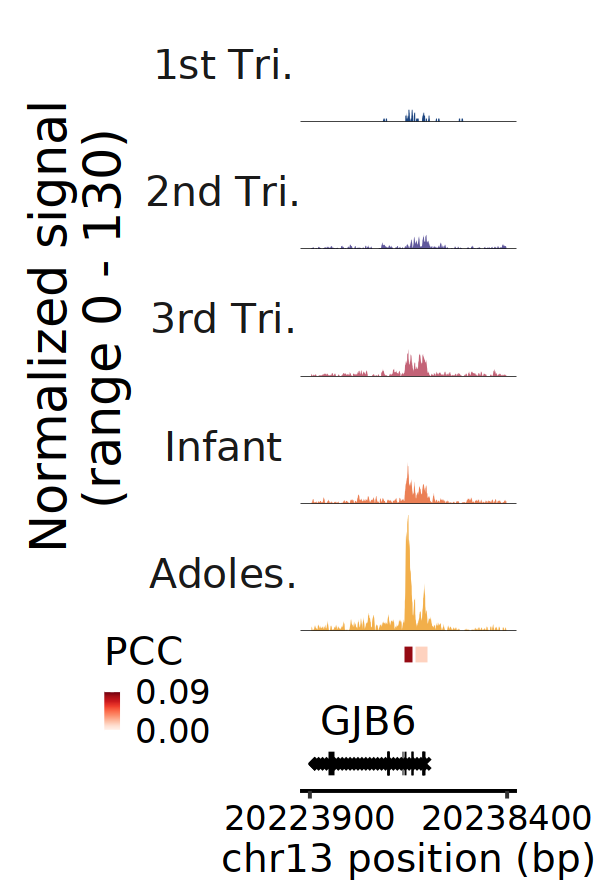

In [12]:
# Generate GJB6 track for supplement
options(repr.plot.width = 3, repr.plot.height = 4.4, repr.plot.res = 700)

roi <- regionize('chr13:20228936-20233410')
min <- floor(as.numeric(str_split(roi,'-')[[1]][2]) / 100) * 100
max <- floor(as.numeric(str_split(roi,'-')[[1]][3]) / 100) * 100
goi <- 'GJB6' 
human_multiome_astro_v2 <- LinkPeaks(human_multiome_astro_v2, peak.assay = 'peaks', expression.assay = 'RNA', genes.use = goi,
                                 score_cutoff = 0.01)

#expr_plot <- ExpressionPlot(
#  object = human_multiome_astro,
#  features = goi,
#  assay = "RNA",
#    group.by = 'plot_groups'
#) + ylab('')

cov_plot <- CoveragePlot(
  object = human_multiome_astro_v2,
  region = roi,
    assay='peaks',
  annotation = FALSE,
  peaks = FALSE,
    links =FALSE,
    group.by = 'Group_plotting'
) + theme(axis.line.y = element_blank(), 
          text = element_text(size=18),
          axis.ticks.y = element_blank(), 
          axis.title.y = element_blank(),
          axis.label.y = element_text(hjust=1),
          plot.title = element_text(hjust=1)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

DefaultAssay(human_multiome_astro_v2) <-'peaks'
gene_plot <- AnnotationPlot(
  object = human_multiome_astro_v2,
  region = roi
) + scale_color_manual(values='black') + ylab('') +
theme(
      axis.text = element_text(size=12,color='black'),
      axis.title = element_text(size=14,color='black'),
      axis.line.y = element_blank(),
      plot.margin=margin(0,0,0,0)) + 
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

gene_plot$layers[[4]]$aes_params$size <- 5 # Increase gene font size

peak_plot <- PeakPlot(
  object = human_multiome_astro_v2,
  region = roi
) + theme(axis.text.x = element_text(color = 'black', size = 7),
          axis.line.y = element_blank())
df <- as.data.frame(Links(human_multiome_astro_v2)) 
poi <- paste0(peak_plot$data$seqnames,'-',
       peak_plot$data$start,'-',
       peak_plot$data$end)
peak_plot$data$PCC <- df[df$peak %in% poi,'score']
peak_plot <- peak_plot + aes(color = peak_plot$data$PCC) + 
                          theme(legend.position='left',
                                axis.line.y = element_blank(),
                                legend.text=element_text(size=12),
                                legend.title=element_text(size=14,margin=margin(0,0,8,0)),
                                  legend.key.height = unit(0.1, "cm"),
                                legend.margin = margin(20,-110,0,0),
                                legend.background = element_rect(fill = "transparent", color = NA),
                                legend.box.background = element_rect(fill = "transparent", color = NA),
                                legend.key.width = unit(0.2, "cm"),
                               plot.margin=margin(0,0,0,0)) + labs(color = "PCC") +ylab('') + 
scale_color_gradientn(colors = brewer.pal(1000, 'Reds'),
                     limits=c(0,ceiling(max(peak_plot$data$PCC)*100)/100 ),
                      breaks = seq(0, ceiling(max(peak_plot$data$PCC)*100)/100, 
                                   by = ceiling((max(peak_plot$data$PCC))*100)/100)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

CombineTracks(
  plotlist = list(cov_plot, peak_plot,gene_plot),
  heights = c(16, 0.5,3),
  widths = c(10, 2)) & 
scale_fill_manual(values = paletteer_d("PNWColors::Sunset2")) & theme(plot.margin = margin(0,15,0,0))

Testing 1 genes and 109614 peaks

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': GL000194.1, GL000195.1, GL000205.2, GL000219.1, KI270713.1, KI270727.1, KI270728.1
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message in brewer.pal(1000, "Reds"):
"n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for fill is alrea

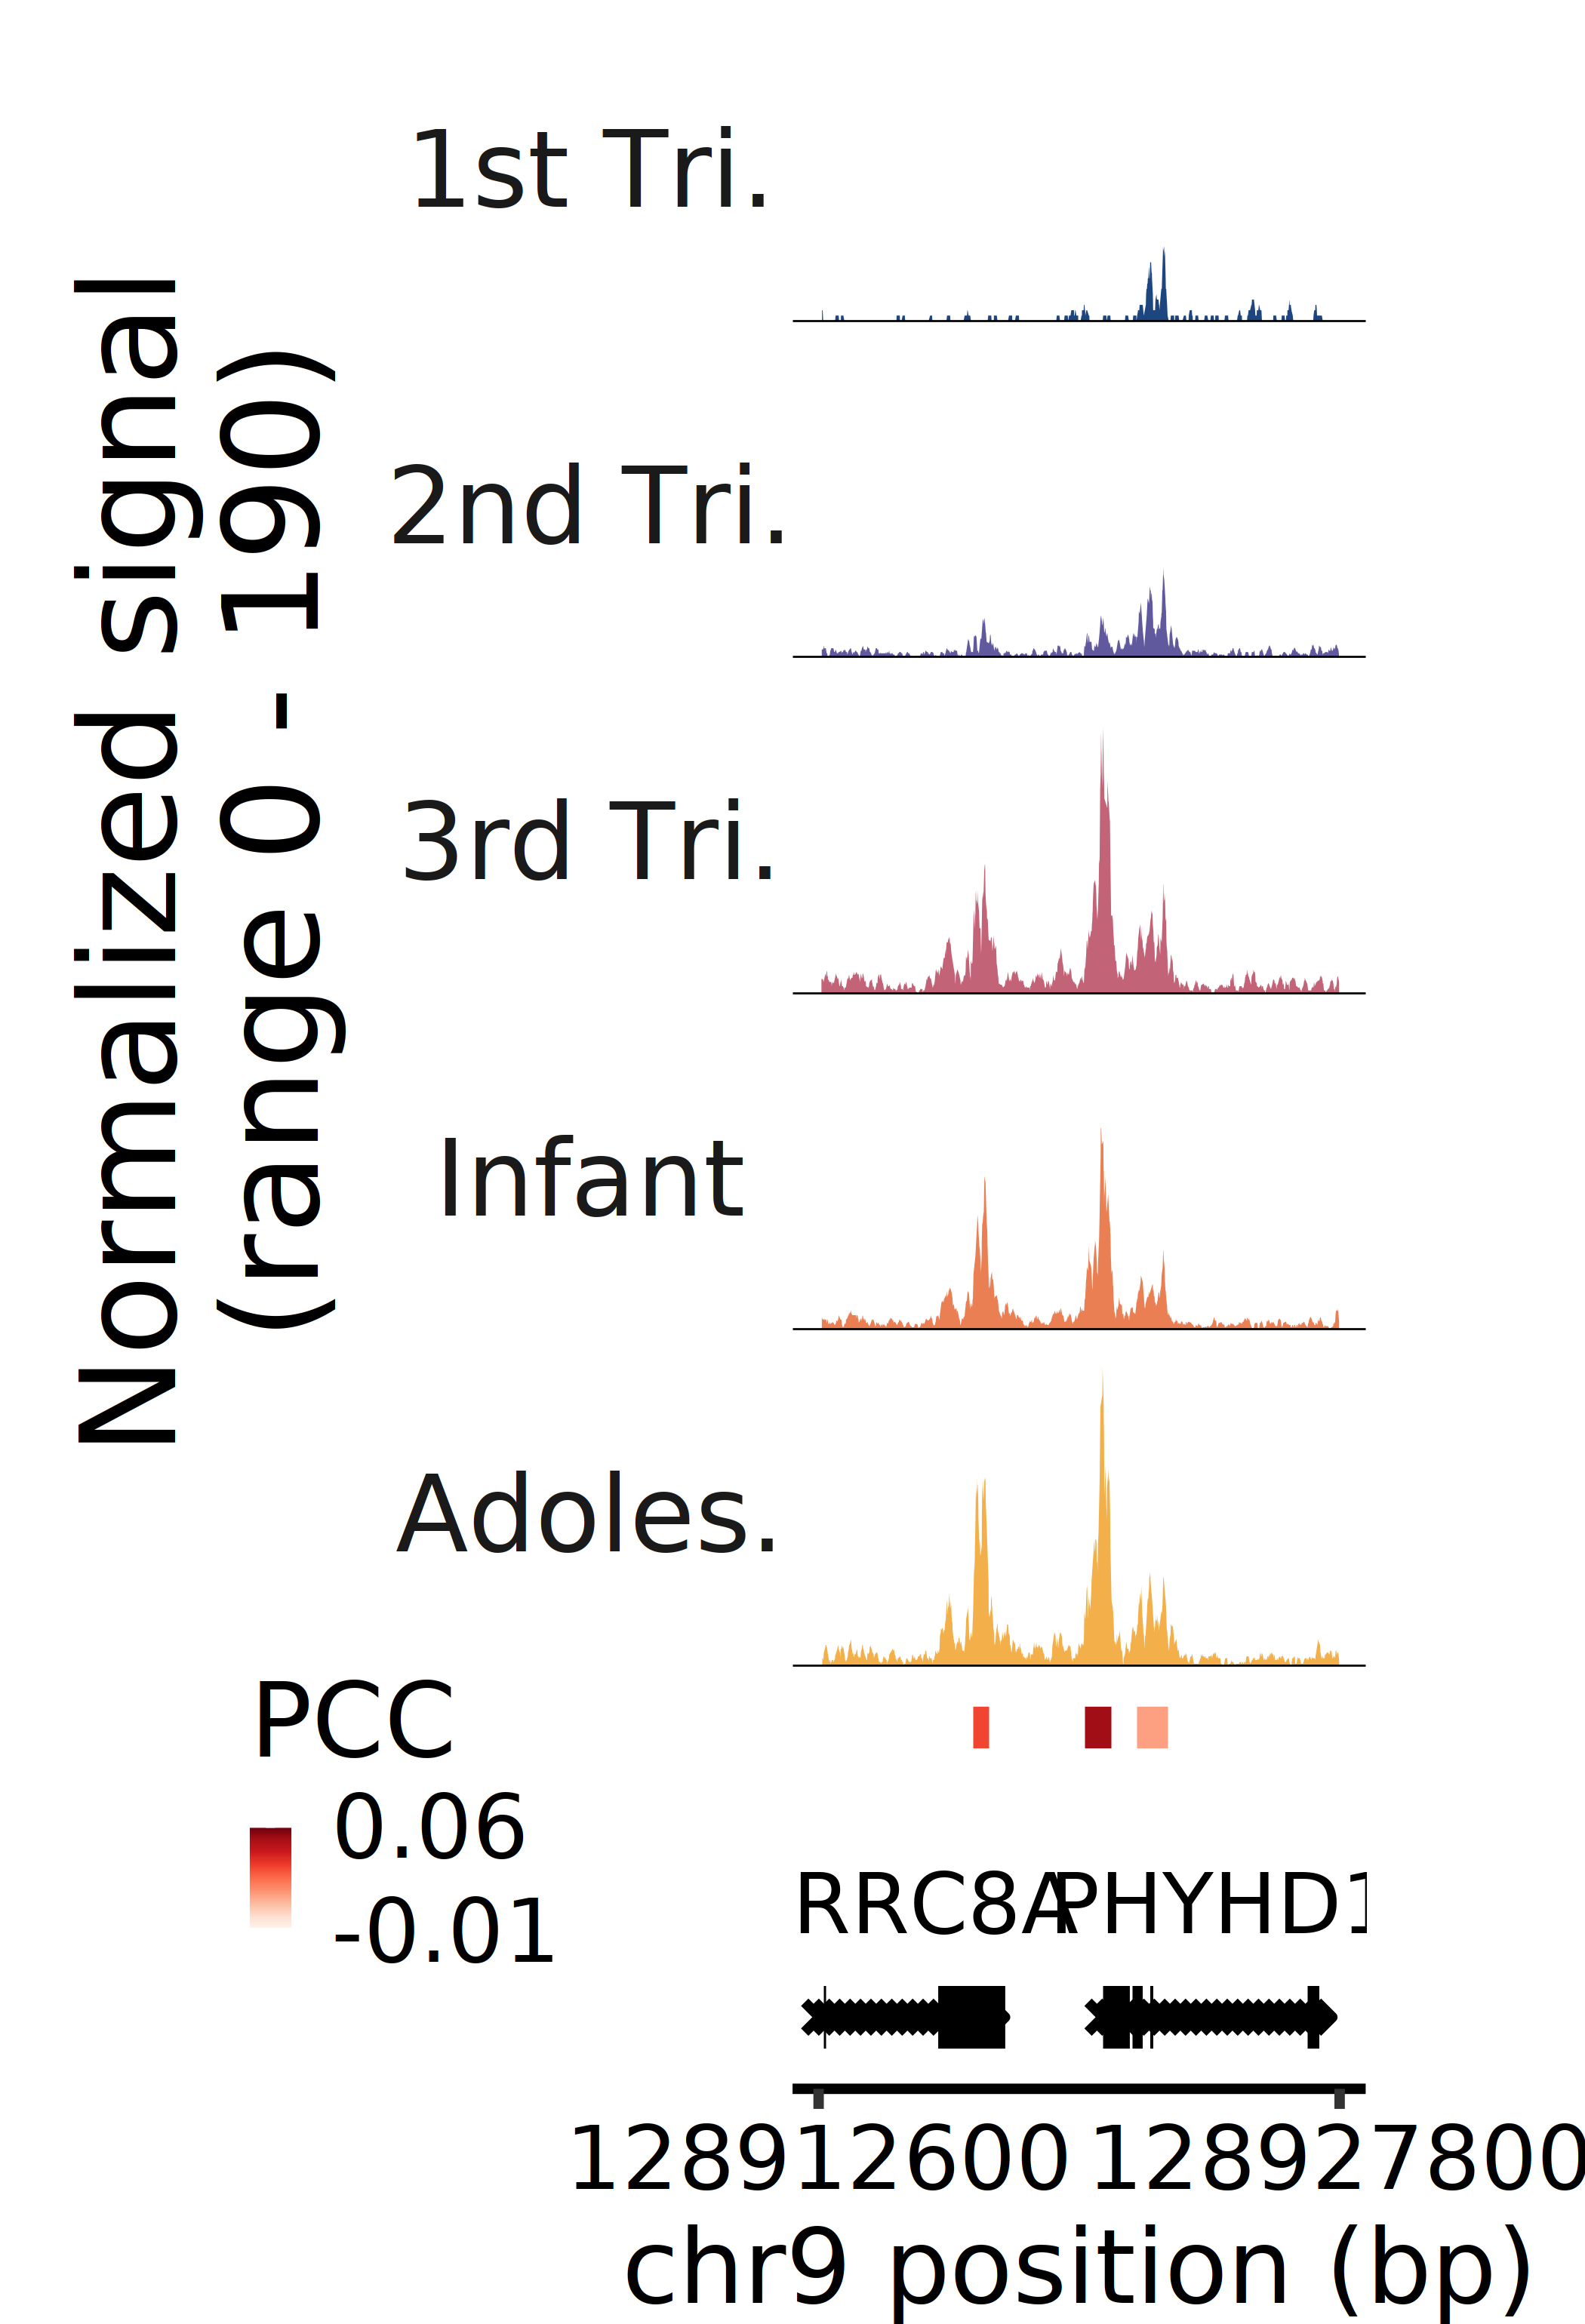

In [13]:
# Generate GJB6 track for supplement
options(repr.plot.width = 3, repr.plot.height = 4.4, repr.plot.res = 700)

roi <- regionize('chr9:128917629-128922835')
min <- floor(as.numeric(str_split(roi,'-')[[1]][2]) / 100) * 100
max <- floor(as.numeric(str_split(roi,'-')[[1]][3]) / 100) * 100
goi <- 'LRRC8A' 
human_multiome_astro_v2 <- LinkPeaks(human_multiome_astro_v2, peak.assay = 'peaks', expression.assay = 'RNA', genes.use = goi,
                                 score_cutoff = 0,pvalue_cutoff = 1)

# Collect peaks for plotting
roi_gr <- GRanges(seqnames = str_split(roi,'-')[[1]][1],
        IRanges(start = as.numeric(str_split(roi,'-')[[1]][2]),
                end = as.numeric(str_split(roi,'-')[[1]][3])))

links_gr <- GRanges(seqnames = do.call(rbind,str_split(Links(human_multiome_astro_v2)$peak,'-'))[,1],
                    IRanges(start = as.numeric(do.call(rbind,str_split(Links(human_multiome_astro_v2)$peak,'-'))[,2]),
                            end = as.numeric(do.call(rbind,str_split(Links(human_multiome_astro_v2)$peak,'-'))[,3])))

cov_plot <- CoveragePlot(
  object = human_multiome_astro_v2,
  region = roi,
    assay='peaks',
  annotation = FALSE,
  peaks = FALSE,
    links =FALSE,
    group.by = 'Group_plotting'
) + theme(axis.line.y = element_blank(), 
          text = element_text(size=18),
          axis.ticks.y = element_blank(), 
          axis.title.y = element_blank(),
          axis.label.y = element_text(hjust=1),
          plot.title = element_text(hjust=1)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

DefaultAssay(human_multiome_astro_v2) <-'peaks'
gene_plot <- AnnotationPlot(
  object = human_multiome_astro_v2,
  region = roi
) + scale_color_manual(values='black') + ylab('') +
theme(
      axis.text = element_text(size=12,color='black'),
      axis.title = element_text(size=14,color='black'),
      axis.line.y = element_blank(),
      plot.margin=margin(0,0,0,0)) + 
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

gene_plot$layers[[4]]$aes_params$size <- 4 # Increase gene font size

peak_plot <- PeakPlot(
  object = human_multiome_astro_v2,
   region = roi
) + theme(axis.text.x = element_text(color = 'black', size = 7),
          axis.line.y = element_blank())
df <- as.data.frame(Links(human_multiome_astro_v2)) 
poi <- paste0(peak_plot$data$seqnames,'-',
       peak_plot$data$start,'-',
       peak_plot$data$end)
peak_plot$data$PCC <- df[queryHits(findOverlaps(links_gr, roi_gr)),'score']
peak_plot <- peak_plot + aes(color = peak_plot$data$PCC) + 
                          theme(legend.position='left',
                                axis.line.y = element_blank(),
                                legend.text=element_text(size=12),
                                legend.title=element_text(size=14,margin=margin(0,0,8,0)),
                                  legend.key.height = unit(0.1, "cm"),
                                legend.margin = margin(20,-110,0,0),
                                legend.background = element_rect(fill = "transparent", color = NA),
                                legend.box.background = element_rect(fill = "transparent", color = NA),
                                legend.key.width = unit(0.2, "cm"),
                               plot.margin=margin(0,0,0,0)) + labs(color = "PCC") +ylab('') + 
scale_color_gradientn(colors = brewer.pal(1000, 'Reds'),
                     limits=c(floor(min(peak_plot$data$PCC)*100)/100,ceiling(max(peak_plot$data$PCC)*100)/100 ),
                      breaks = seq(floor(min(peak_plot$data$PCC)*100)/100, ceiling(max(peak_plot$data$PCC)*100)/100, 
                                   by = ceiling(max(peak_plot$data$PCC)*100)/100 - floor(min(peak_plot$data$PCC)*100)/100)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

CombineTracks(
  plotlist = list(cov_plot, peak_plot,gene_plot),
  heights = c(16, 0.5,3),
  widths = c(10, 2)) & 
scale_fill_manual(values = paletteer_d("PNWColors::Sunset2")) & theme(plot.margin = margin(0,15,0,0))

Testing 1 genes and 109614 peaks

Warning message in .merge_two_Seqinfo_objects(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': GL000194.1, GL000195.1, GL000205.2, GL000219.1, KI270713.1, KI270727.1, KI270728.1
  - in 'y': chrM
  Make sure to always combine/compare objects based on the same reference
  genome (use suppressWarnings() to suppress this warning)."
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message in brewer.pal(1000, "Reds"):
"n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
"
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for fill is alrea

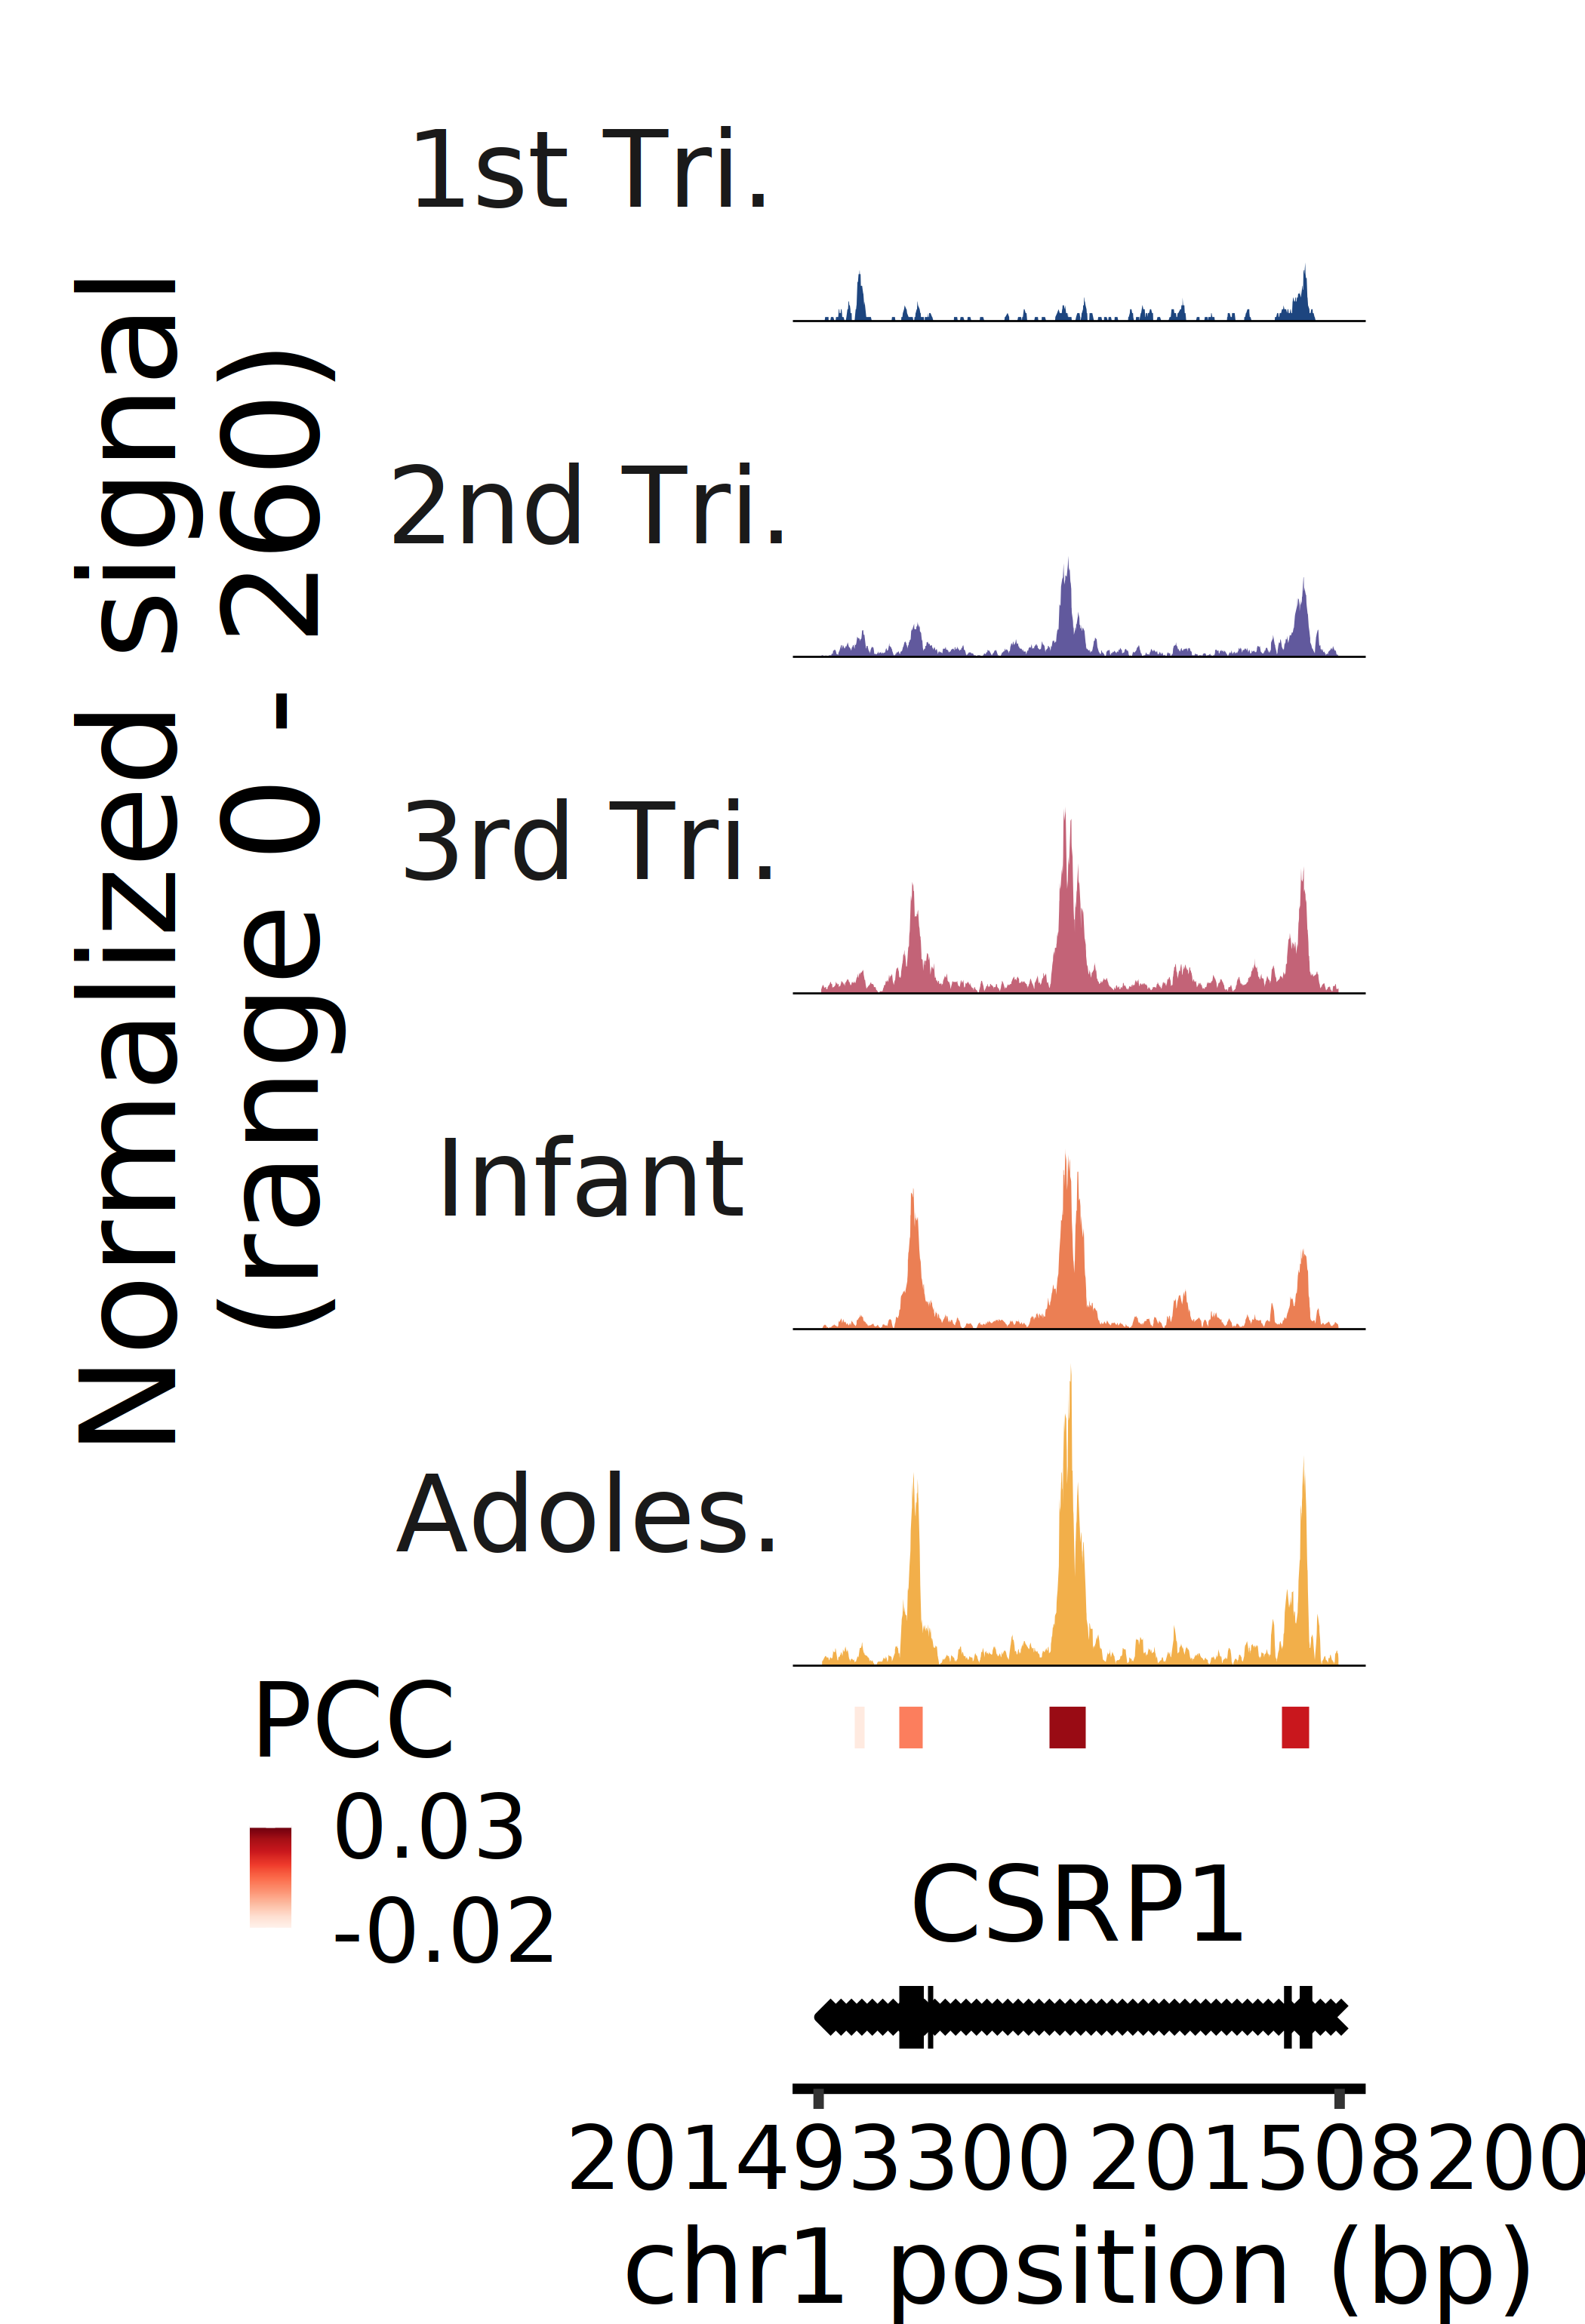

In [14]:
# Generate CSRP1 track for supplement
options(repr.plot.width = 3, repr.plot.height = 4.4, repr.plot.res = 700)

roi <- regionize('chr1:201498321-201503221')
min <- floor(as.numeric(str_split(roi,'-')[[1]][2]) / 100) * 100
max <- floor(as.numeric(str_split(roi,'-')[[1]][3]) / 100) * 100
goi <- 'CSRP1' 
human_multiome_astro_v2 <- LinkPeaks(human_multiome_astro_v2, peak.assay = 'peaks', expression.assay = 'RNA', genes.use = goi,
                                 score_cutoff = 0,pvalue_cutoff = 1)

#expr_plot <- ExpressionPlot(
#  object = human_multiome_astro,
#  features = goi,
#  assay = "RNA",
#    group.by = 'plot_groups'
#) + ylab('')

cov_plot <- CoveragePlot(
  object = human_multiome_astro_v2,
  region = roi,
    assay='peaks',
  annotation = FALSE,
  peaks = FALSE,
    links =FALSE,
    group.by = 'Group_plotting'
) + theme(axis.line.y = element_blank(), 
          text = element_text(size=18),
          axis.ticks.y = element_blank(), 
          #axis.title.y = element_blank(),
          axis.label.y = element_text(hjust=1),
          plot.title = element_text(hjust=1)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

DefaultAssay(human_multiome_astro_v2) <-'peaks'
gene_plot <- AnnotationPlot(
  object = human_multiome_astro_v2,
  region = roi
) + scale_color_manual(values='black') + ylab('') +
theme(
      axis.text = element_text(size=12,color='black'),
      axis.title = element_text(size=14,color='black'),
      axis.line.y = element_blank(),
      plot.margin=margin(0,0,0,0)) + 
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

gene_plot$layers[[4]]$aes_params$size <- 5 # Increase gene font size

peak_plot <- PeakPlot(
  object = human_multiome_astro_v2,
  region = roi
) + theme(axis.text.x = element_text(color = 'black', size = 7),
          axis.line.y = element_blank())
df <- as.data.frame(Links(human_multiome_astro_v2)) 
poi <- paste0(peak_plot$data$seqnames,'-',
       peak_plot$data$start,'-',
       peak_plot$data$end)
peak_plot$data$PCC <- df[df$peak %in% poi,'score']
peak_plot <- peak_plot + aes(color = peak_plot$data$PCC) + 
                          theme(legend.position='left',
                                axis.line.y = element_blank(),
                                legend.text=element_text(size=12),
                                legend.title=element_text(size=14,margin=margin(0,0,8,0)),
                                  legend.key.height = unit(0.1, "cm"),
                                legend.margin = margin(20,-110,0,0),
                                legend.background = element_rect(fill = "transparent", color = NA),
                                legend.box.background = element_rect(fill = "transparent", color = NA),
                                legend.key.width = unit(0.2, "cm"),
                               plot.margin=margin(0,0,0,0)) + labs(color = "PCC") +ylab('') + 
scale_color_gradientn(colors = brewer.pal(1000, 'Reds'),
                     limits=c(floor(min(peak_plot$data$PCC)*100)/100,ceiling(max(peak_plot$data$PCC)*100)/100 ),
                      breaks = seq(floor(min(peak_plot$data$PCC)*100)/100, ceiling(max(peak_plot$data$PCC)*100)/100, 
                                   by = ceiling(max(peak_plot$data$PCC)*100)/100 - floor(min(peak_plot$data$PCC)*100)/100)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

CombineTracks(
  plotlist = list(cov_plot, peak_plot,gene_plot),
  heights = c(16, 0.5,3),
  widths = c(10, 2)) & 
scale_fill_manual(values = paletteer_d("PNWColors::Sunset2")) & theme(plot.margin = margin(0,15,0,0))

In [15]:
# Load in mouse multiome data
final_obj_motif_chromVAR <- readRDS('/n/groups/neuroduo/Bruno/RDS_files/230810_final_obj_motif_chromVAR.rds')

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
"Removed 92 rows containing non-finite outside the scale range (`stat_align()`)."
Warning message in plot_theme(plot):
"The `axis.label.y` theme element is not defined in the element hierarchy."
Warning message:
"Removed 40 rows containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Re

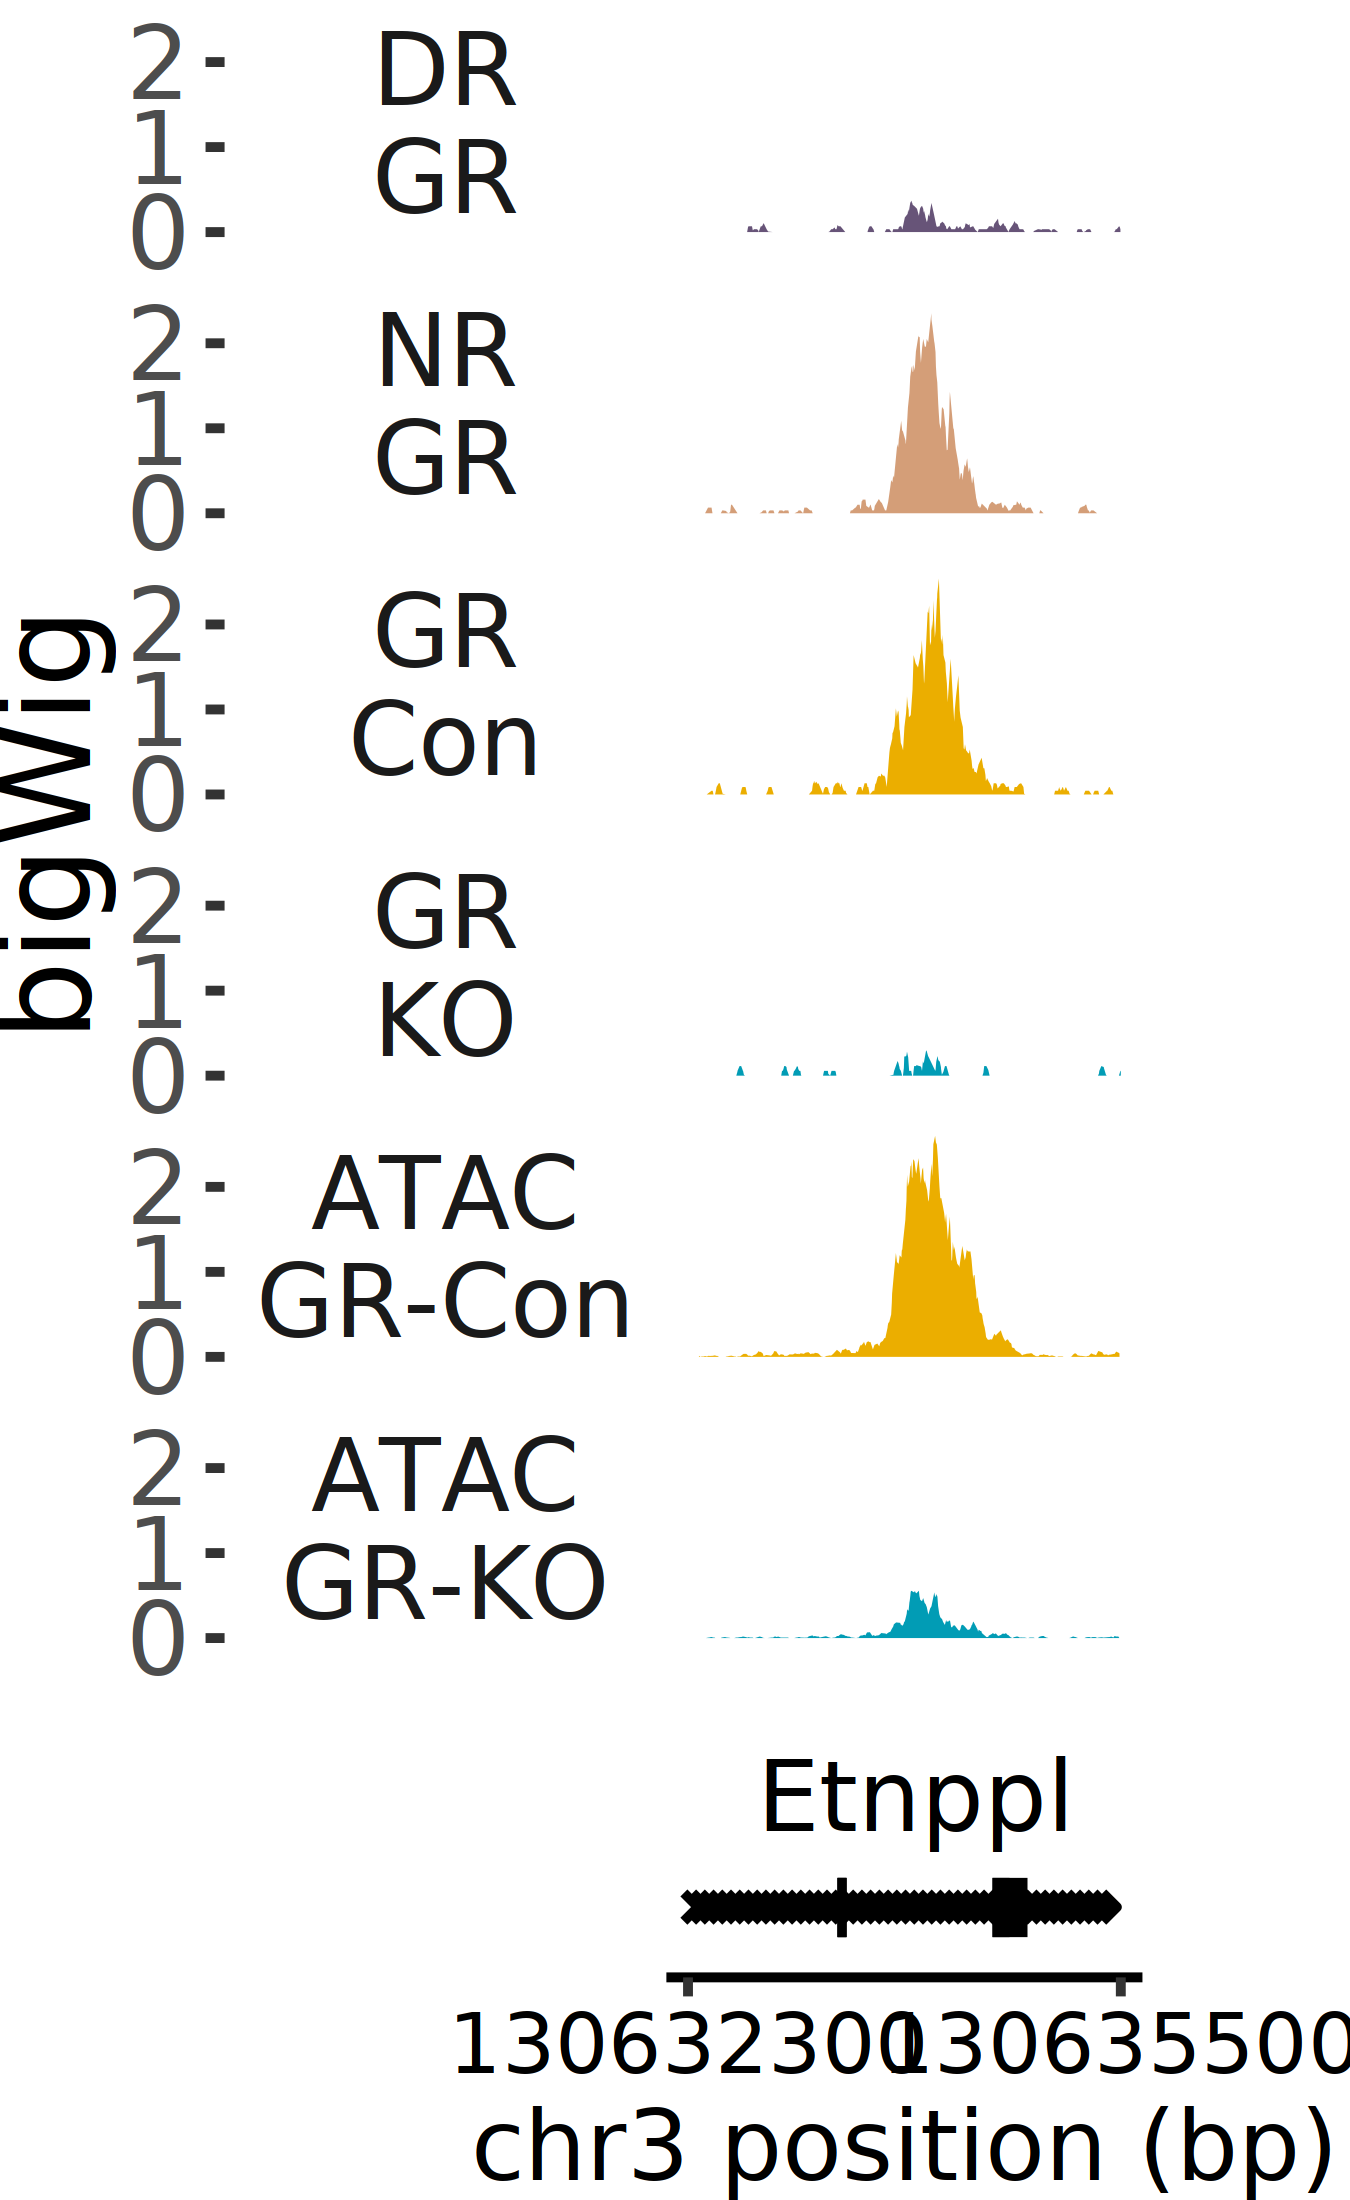

In [17]:
options(repr.plot.width = 2.7, repr.plot.height = 4.4, repr.plot.res = 500)
# Etnppl
roi <- 'chr3-130632373-130635599'
min <- floor(as.numeric(str_split(roi,'-')[[1]][2]) / 100) * 100
max <- floor(as.numeric(str_split(roi,'-')[[1]][3]) / 100) * 100

cov_plot <- BigwigTrack(
    bigwig = list('DR\nGR' =  '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_DR_NR/Astro_DR_GR_merge.bw',
                  'NR\nGR' =  '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_DR_NR/Astro_NR_GR_merge.bw',
                  'GR\nCon' = '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_cre_delta/delCre_pos_GR_merge.bw',
                  'GR\nKO' = '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_cre_delta/Cre_pos_GR_merge.bw',
                  'ATAC\nGR-Con' = '/n/groups/neuroduo/Bruno/Astro_GR_KO_ATAC/BAMs/ATAC_deltaCre_GR.merge.bw',
                  'ATAC\nGR-KO' = '/n/groups/neuroduo/Bruno/Astro_GR_KO_ATAC/BAMs/ATAC_Cre_GR.merge.bw'),
  region = roi,
    smooth=5) + theme(legend.position='none',
                        axis.title.y=element_blank(),
                        axis.ticks.y=element_blank(),
                        axis.text.y=element_blank(),
                        text = element_text(size=18),
                        axis.label.y = element_text(hjust=1),
                        axis.line.y = element_blank(),
                        plot.title = element_text(hjust=1)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) )) + 
scale_fill_manual(values = c("#675478","#D49E78",
                            rep(c('#EBAE00','#019CB5'),2)))

gene_plot <- AnnotationPlot(
  object = final_obj_motif_chromVAR,
  region = roi
) + scale_color_manual(values='black') + ylab('') +
theme(
      axis.text = element_text(size=12,color='black'),
      axis.title = element_text(size=14,color='black'),
      axis.line.y = element_blank(),
      plot.margin=margin(0,0,0,0)) + 
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

gene_plot$layers[[4]]$aes_params$size <- 5 # Increase gene font size

CombineTracks(
  plotlist = list(cov_plot,gene_plot),
      heights = c(16, 3)) & theme(plot.margin = margin(0,15,0,0))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
"Removed 15 rows containing non-finite outside the scale range (`stat_align()`)."
Warning message in plot_theme(plot):
"The `axis.label.y` theme element is not defined in the element hierarchy."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_segment()`)."


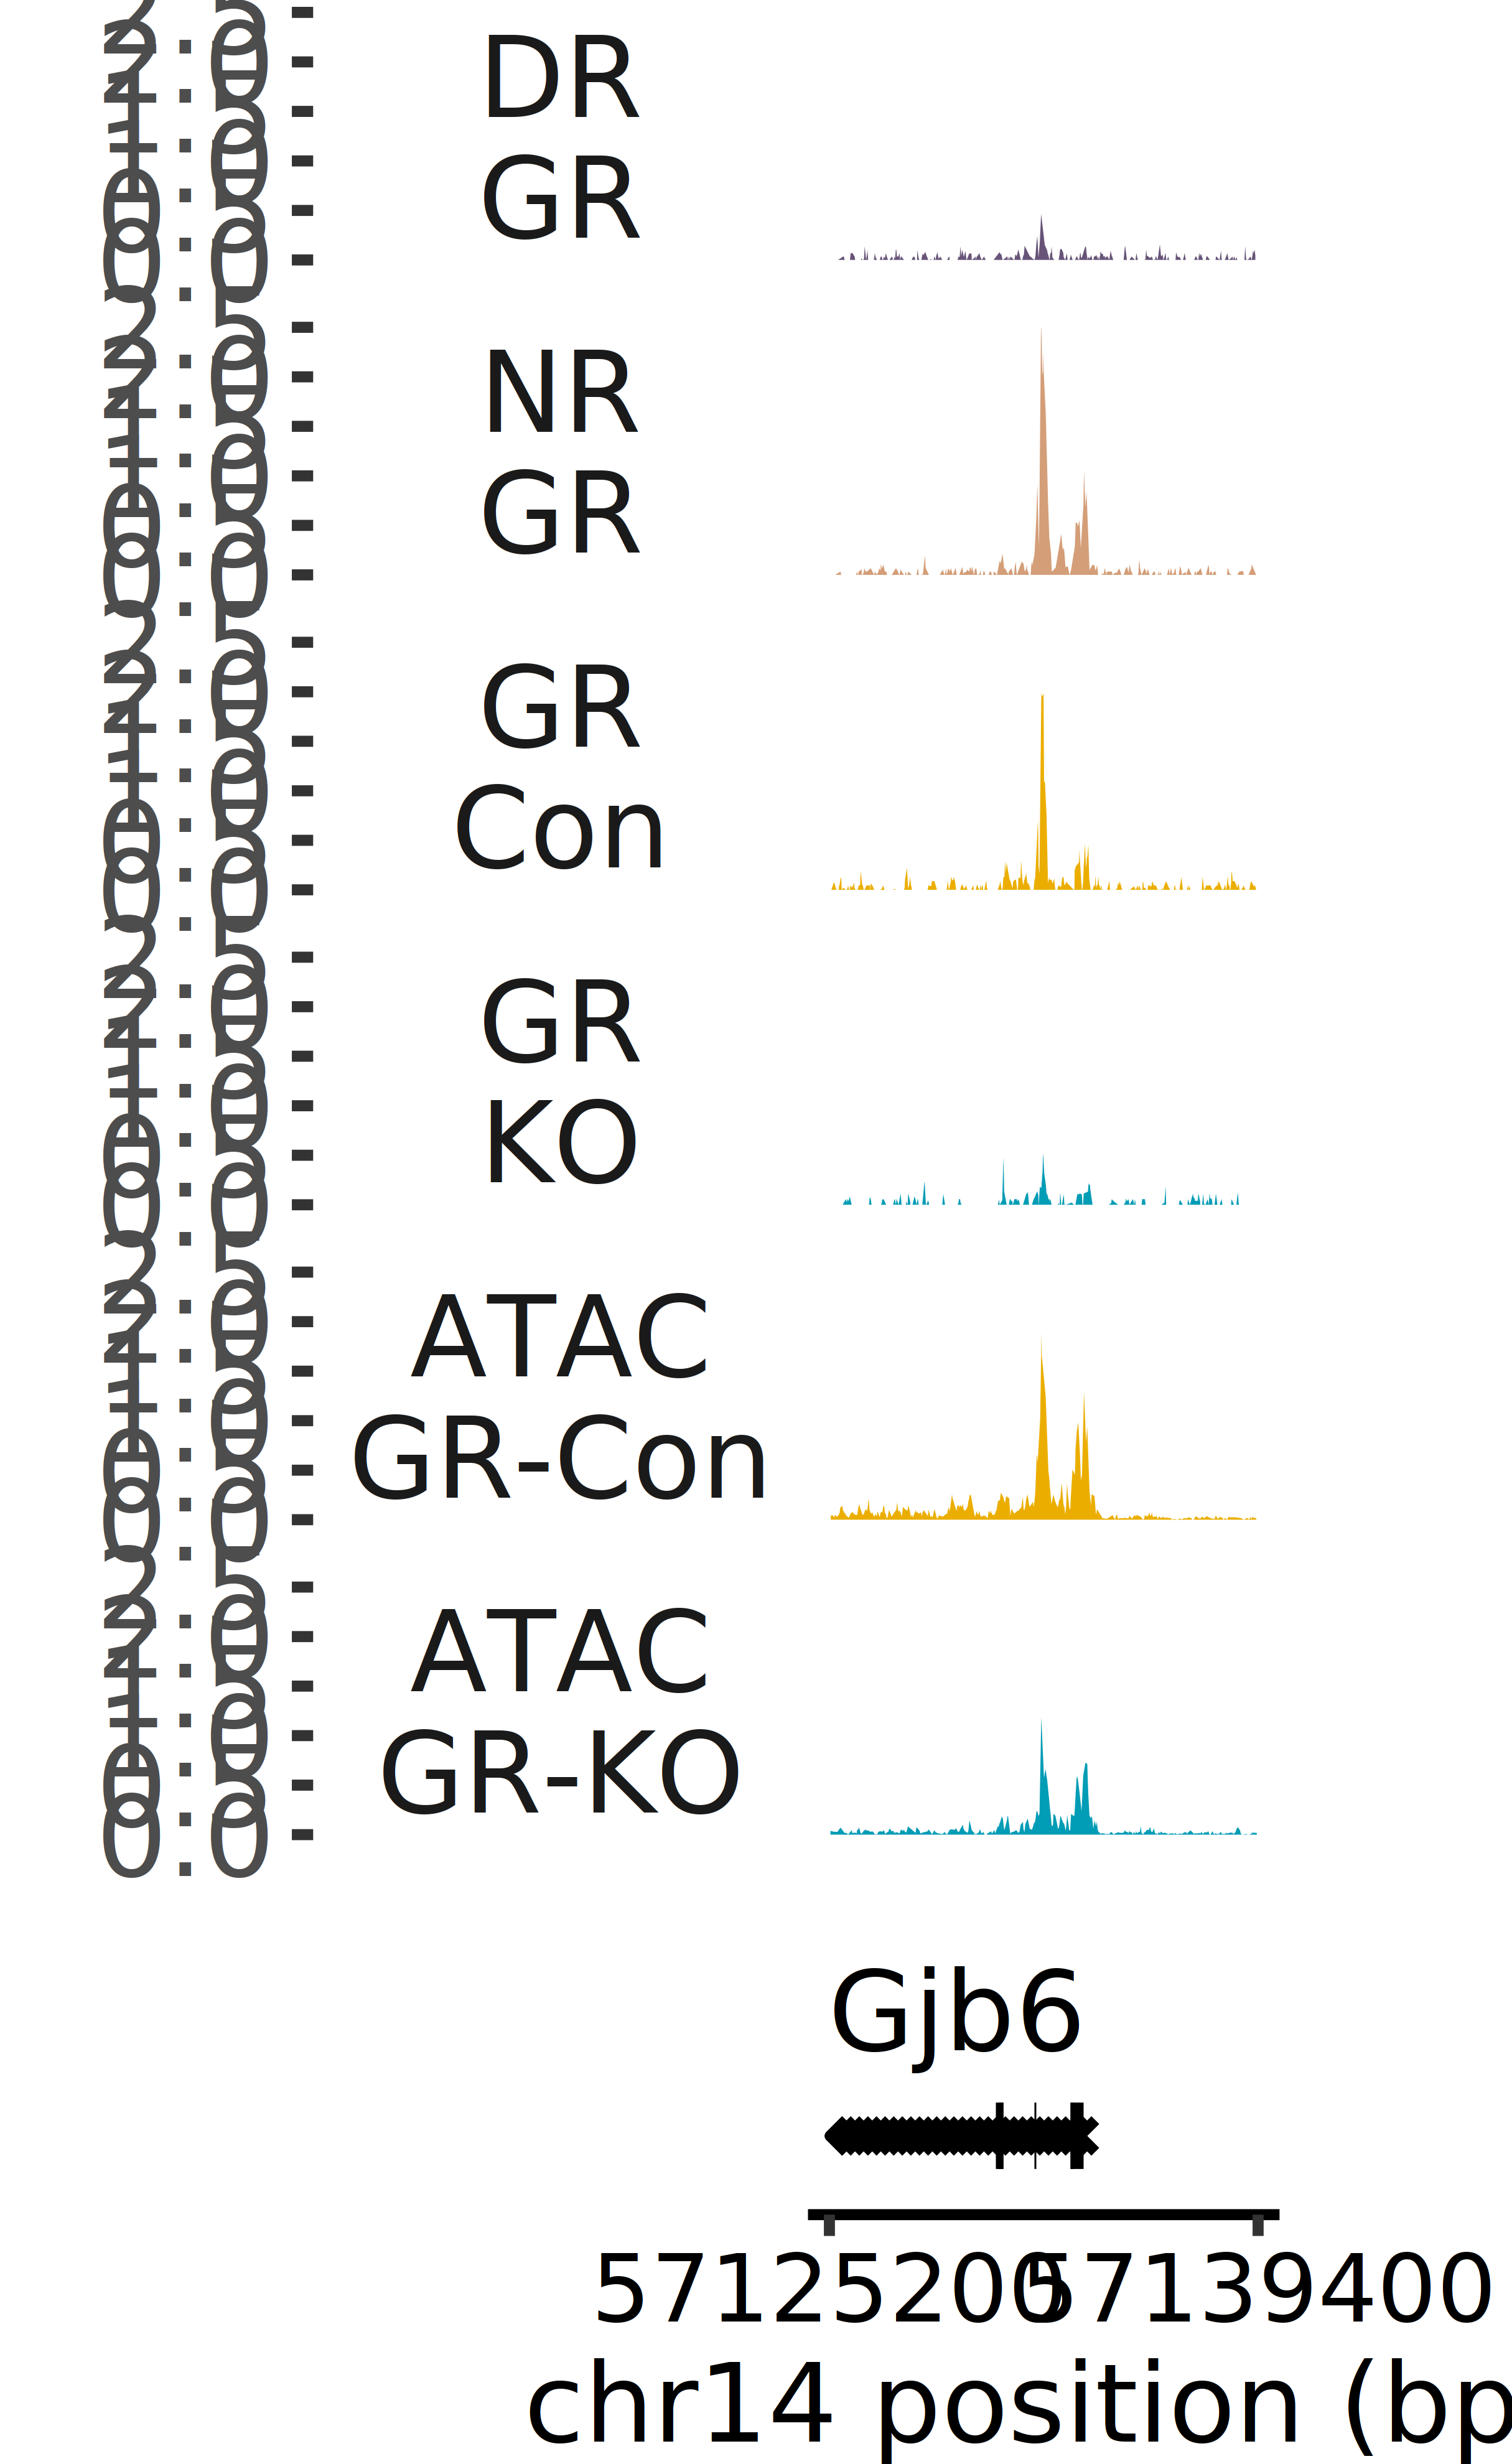

In [18]:
options(repr.plot.width = 2.7, repr.plot.height = 4.4, repr.plot.res = 900)
# Gjb6
roi <- regionize('chr14:57130226-57134463')
min <- floor(as.numeric(str_split(roi,'-')[[1]][2]) / 100) * 100
max <- floor(as.numeric(str_split(roi,'-')[[1]][3]) / 100) * 100



cov_plot <- BigwigTrack(
    bigwig = list('DR\nGR' =  '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_DR_NR/Astro_DR_GR_merge.bw',
                  'NR\nGR' =  '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_DR_NR/Astro_NR_GR_merge.bw',
                  'GR\nCon' = '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_cre_delta/delCre_pos_GR_merge.bw',
                  'GR\nKO' = '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_cre_delta/Cre_pos_GR_merge.bw',
                  'ATAC\nGR-Con' = '/n/groups/neuroduo/Bruno/Astro_GR_KO_ATAC/BAMs/ATAC_deltaCre_GR.merge.bw',
                  'ATAC\nGR-KO' = '/n/groups/neuroduo/Bruno/Astro_GR_KO_ATAC/BAMs/ATAC_Cre_GR.merge.bw'),
  region = roi,
    smooth=10) + theme(legend.position='none',
                        axis.title.y=element_blank(),
                        axis.ticks.y=element_blank(),
                        axis.text.y=element_blank(),
                        text = element_text(size=18),
                        axis.label.y = element_text(hjust=1),
                        axis.line.y = element_blank(),
                        plot.title = element_text(hjust=1)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) )) + 
scale_fill_manual(values = c("#675478","#D49E78",
                            rep(c('#EBAE00','#019CB5'),2)))

gene_plot <- AnnotationPlot(
  object = final_obj_motif_chromVAR,
  region = roi
) + scale_color_manual(values='black') + ylab('') +
theme(
      axis.text = element_text(size=12,color='black'),
      axis.title = element_text(size=14,color='black'),
      axis.line.y = element_blank(),
      plot.margin=margin(0,0,0,0)) + 
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

gene_plot$layers[[4]]$aes_params$size <- 5 # Increase gene font size

CombineTracks(
  plotlist = list(cov_plot,gene_plot),
      heights = c(16, 3)) & theme(plot.margin = margin(0,15,0,0))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
"Removed 3 rows containing non-finite outside the scale range (`stat_align()`)."
Warning message in plot_theme(plot):
"The `axis.label.y` theme element is not defined in the element hierarchy."
Warning message:
"Removed 9 rows containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."


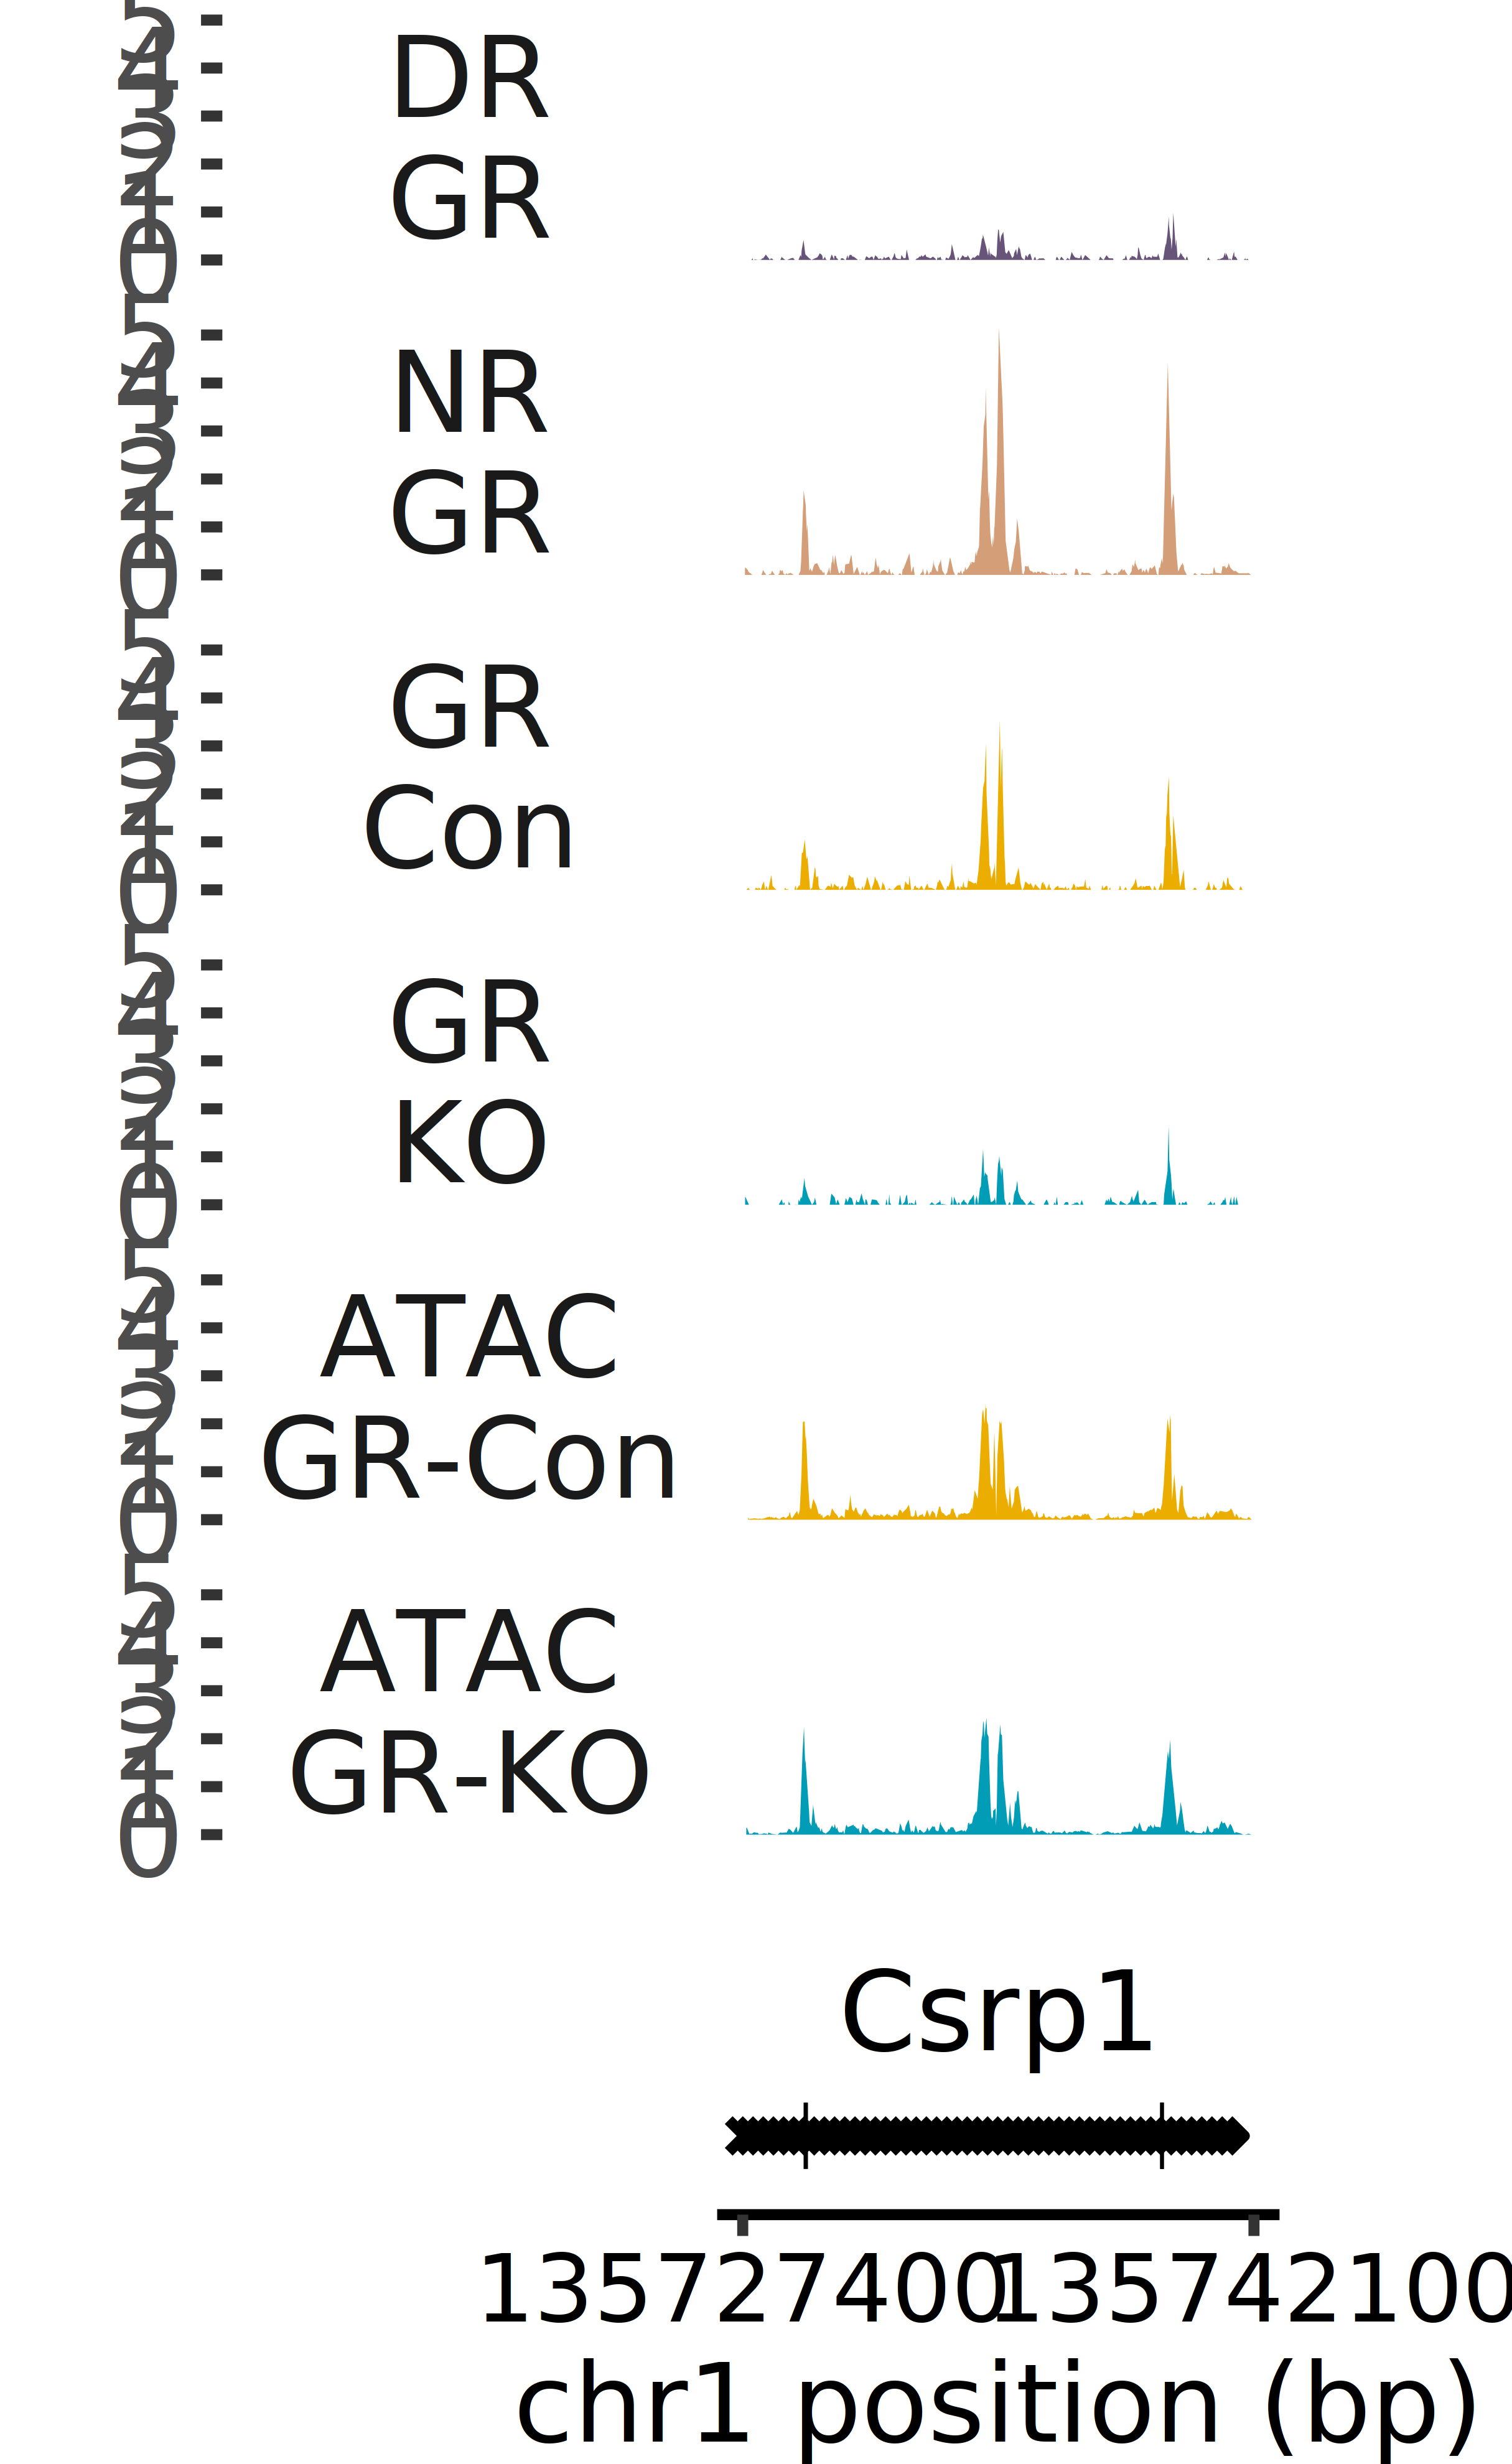

In [19]:
options(repr.plot.width = 2.7, repr.plot.height = 4.4, repr.plot.res = 900)
# Csrp1
roi <- regionize('chr1:135732451-135737114')
min <- floor(as.numeric(str_split(roi,'-')[[1]][2]) / 100) * 100
max <- floor(as.numeric(str_split(roi,'-')[[1]][3]) / 100) * 100



cov_plot <- BigwigTrack(
    bigwig = list('DR\nGR' =  '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_DR_NR/Astro_DR_GR_merge.bw',
                  'NR\nGR' =  '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_DR_NR/Astro_NR_GR_merge.bw',
                  'GR\nCon' = '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_cre_delta/delCre_pos_GR_merge.bw',
                  'GR\nKO' = '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_cre_delta/Cre_pos_GR_merge.bw',
                  'ATAC\nGR-Con' = '/n/groups/neuroduo/Bruno/Astro_GR_KO_ATAC/BAMs/ATAC_deltaCre_GR.merge.bw',
                  'ATAC\nGR-KO' = '/n/groups/neuroduo/Bruno/Astro_GR_KO_ATAC/BAMs/ATAC_Cre_GR.merge.bw'),
  region = roi,
    smooth=10) + theme(legend.position='none',
                        axis.title.y=element_blank(),
                        axis.ticks.y=element_blank(),
                        axis.text.y=element_blank(),
                        text = element_text(size=18),
                        axis.label.y = element_text(hjust=1),
                        axis.line.y = element_blank(),
                        plot.title = element_text(hjust=1)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) )) + 
scale_fill_manual(values = c("#675478","#D49E78",
                            rep(c('#EBAE00','#019CB5'),2)))

gene_plot <- AnnotationPlot(
  object = final_obj_motif_chromVAR,
  region = roi
) + scale_color_manual(values='black') + ylab('') +
theme(
      axis.text = element_text(size=12,color='black'),
      axis.title = element_text(size=14,color='black'),
      axis.line.y = element_blank(),
      plot.margin=margin(0,0,0,0)) + 
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

gene_plot$layers[[4]]$aes_params$size <- 5 # Increase gene font size

CombineTracks(
  plotlist = list(cov_plot,gene_plot),
      heights = c(16, 3)) & theme(plot.margin = margin(0,15,0,0))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
"Removed 10 rows containing non-finite outside the scale range (`stat_align()`)."
Warning message in plot_theme(plot):
"The `axis.label.y` theme element is not defined in the element hierarchy."
Warning message:
"Removed 91 rows containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_segment()`)."


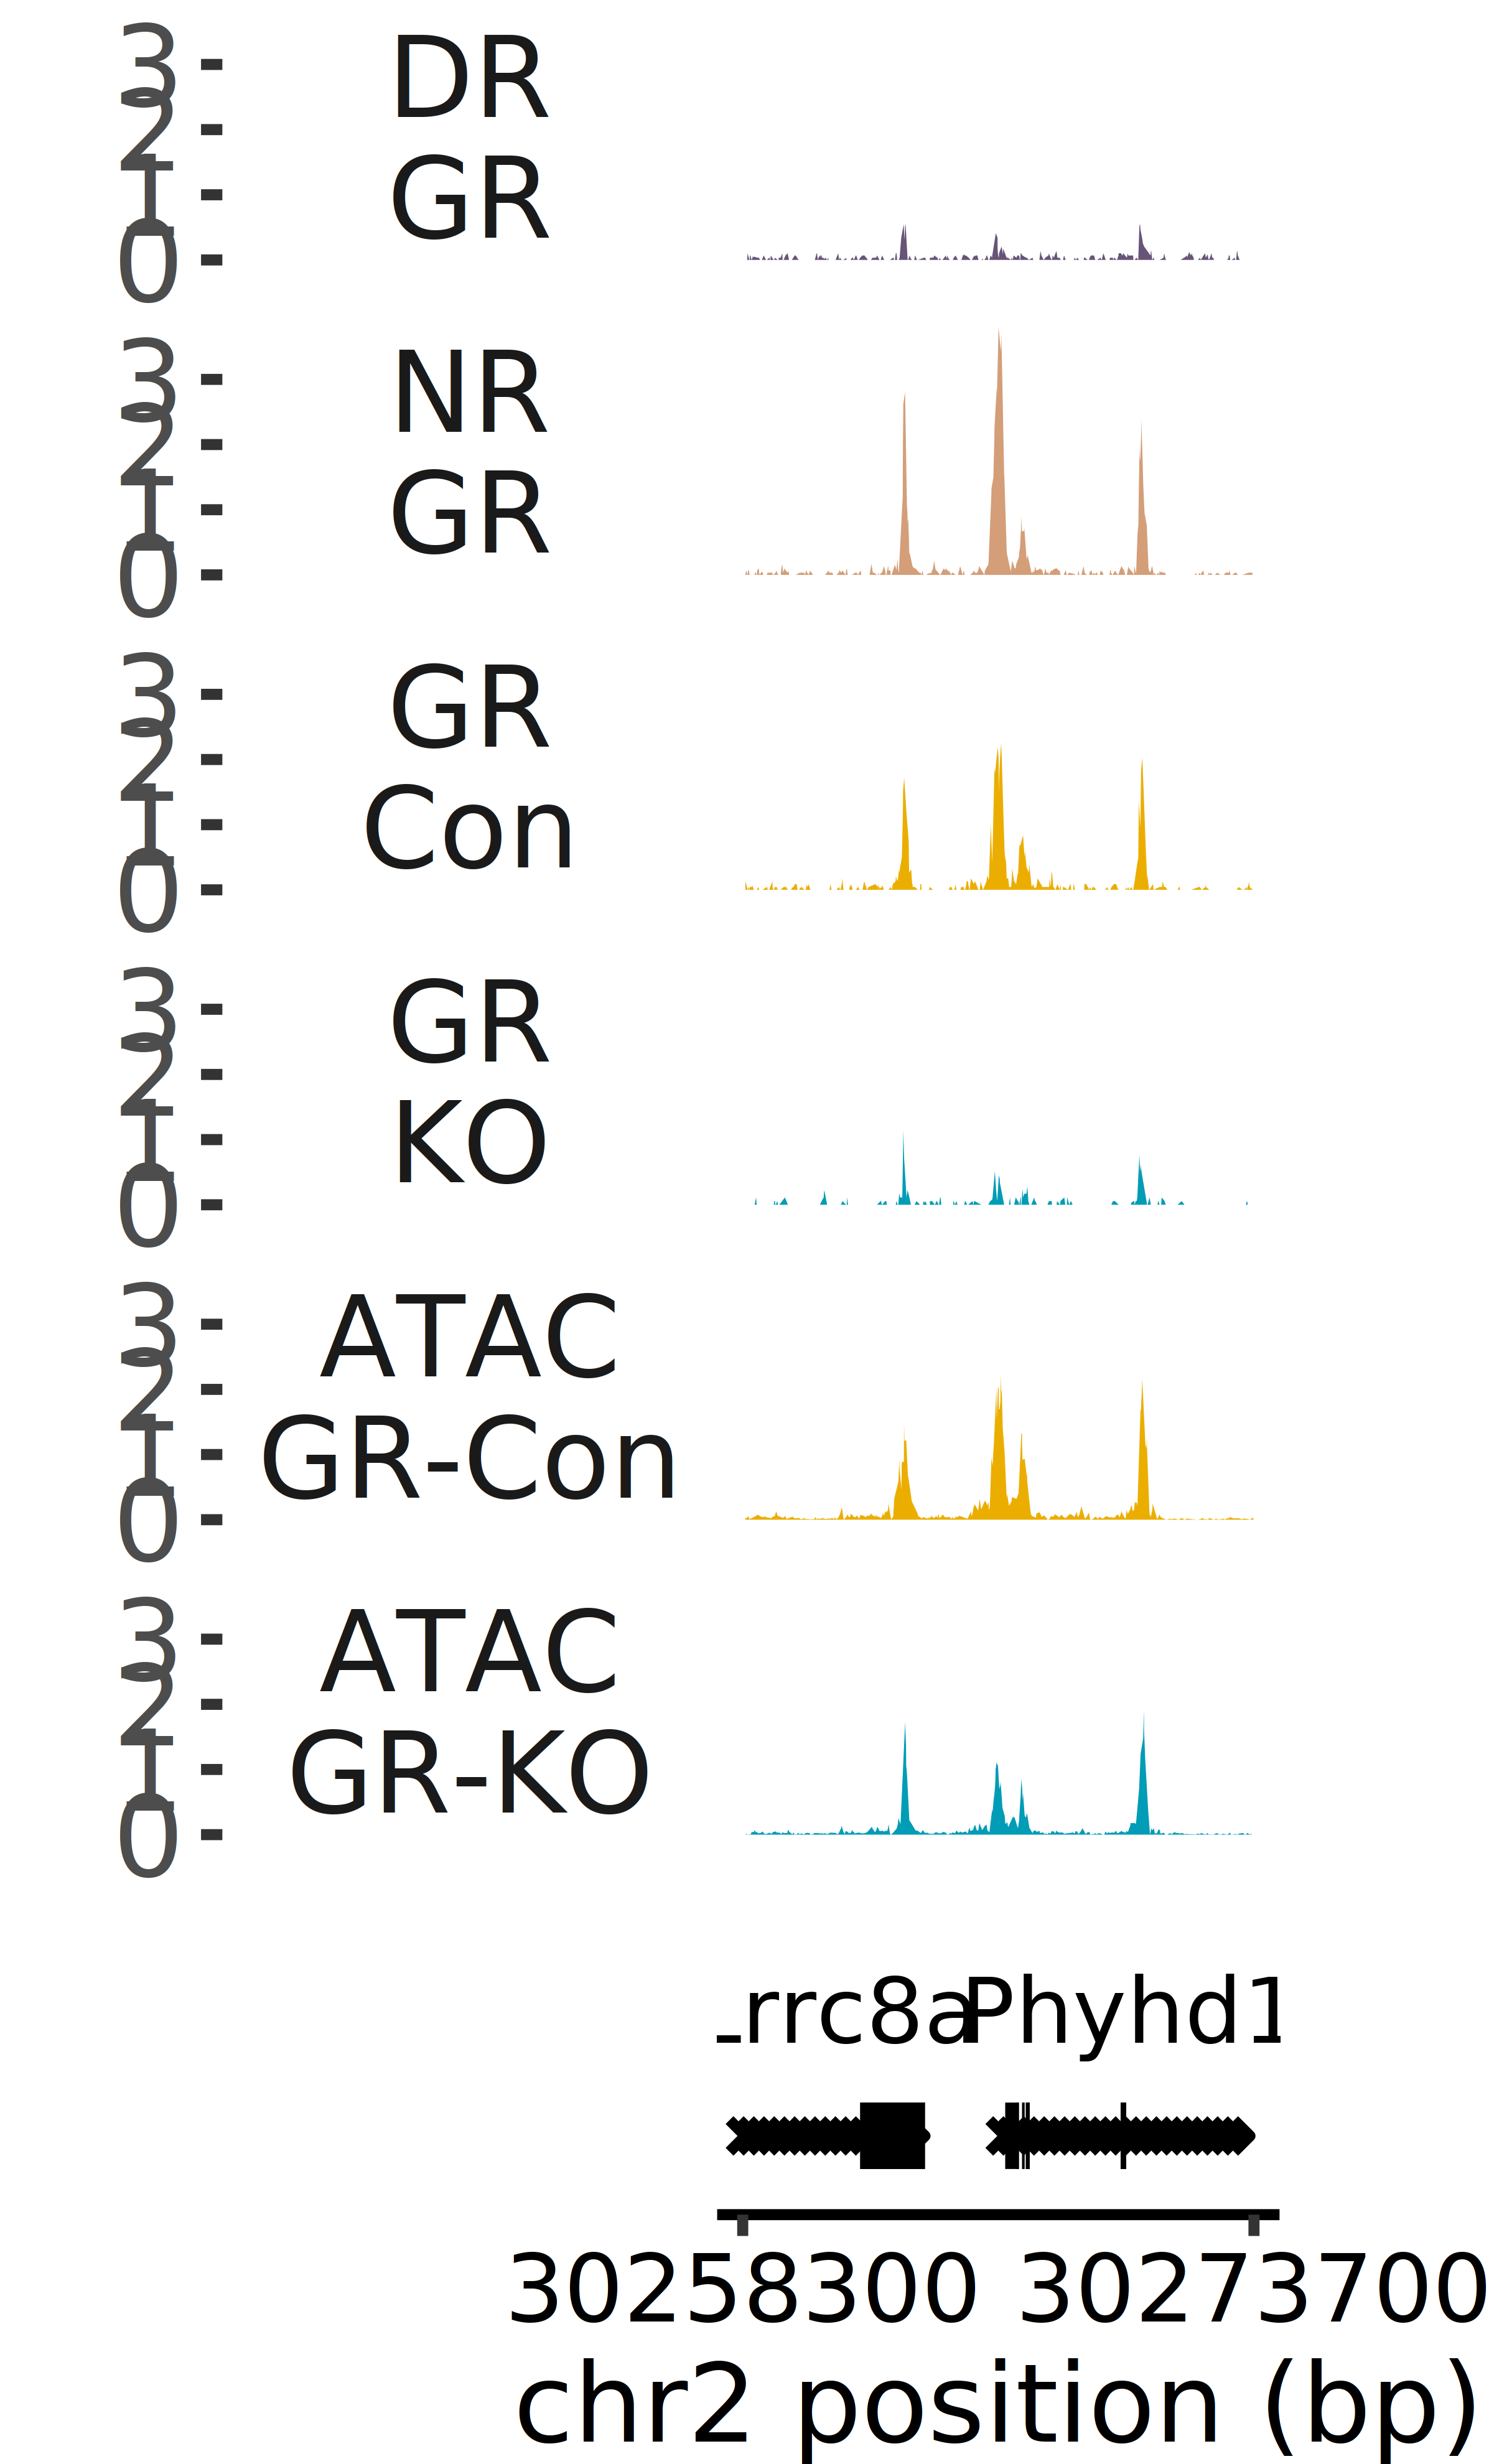

In [20]:
options(repr.plot.width = 2.7, repr.plot.height = 4.4, repr.plot.res = 900)
# Lrrc8a/Phyhd1
roi <- regionize('chr2:30,263,378-30,268,744')
min <- floor(as.numeric(str_split(roi,'-')[[1]][2]) / 100) * 100
max <- floor(as.numeric(str_split(roi,'-')[[1]][3]) / 100) * 100



cov_plot <- BigwigTrack(
    bigwig = list('DR\nGR' =  '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_DR_NR/Astro_DR_GR_merge.bw',
                  'NR\nGR' =  '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_DR_NR/Astro_NR_GR_merge.bw',
                  'GR\nCon' = '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_cre_delta/delCre_pos_GR_merge.bw',
                  'GR\nKO' = '/n/groups/neuroduo/Bruno/Cell_type_GR_CnR_v2/Astro_cre_delta/Cre_pos_GR_merge.bw',
                  'ATAC\nGR-Con' = '/n/groups/neuroduo/Bruno/Astro_GR_KO_ATAC/BAMs/ATAC_deltaCre_GR.merge.bw',
                  'ATAC\nGR-KO' = '/n/groups/neuroduo/Bruno/Astro_GR_KO_ATAC/BAMs/ATAC_Cre_GR.merge.bw'),
  region = roi,
    smooth=2) + theme(legend.position='none',
                        axis.title.y=element_blank(),
                        axis.ticks.y=element_blank(),
                        axis.text.y=element_blank(),
                        text = element_text(size=18),
                        axis.label.y = element_text(hjust=1),
                        axis.line.y = element_blank(),
                        plot.title = element_text(hjust=1)) +
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) )) + 
scale_fill_manual(values = c("#675478","#D49E78",
                            rep(c('#EBAE00','#019CB5'),2)))

Annotation(final_obj_motif_chromVAR)[Annotation(final_obj_motif_chromVAR)$gene_name == 'Gm28035'] <- NULL

gene_plot <- AnnotationPlot(
  object = final_obj_motif_chromVAR,
  region = roi
) + scale_color_manual(values='black') + ylab('') +
theme(
      axis.text = element_text(size=12,color='black'),
      axis.title = element_text(size=14,color='black'),
      axis.line.y = element_blank(),
      plot.margin=margin(0,0,0,0)) + 
scale_x_continuous(limits = c(min,max), breaks = seq(min, max, by = (max - min) ))

gene_plot$layers[[4]]$aes_params$size <- 4.1 # Increase gene font size

CombineTracks(
  plotlist = list(cov_plot,gene_plot),
      heights = c(16, 3)) & theme(plot.margin = margin(0,15,0,0))

In [244]:
gene_plot$layers[[2]]$data <- gene_plot$layers[[2]]$data[2:3,]
gene_plot$layers[[1]]$data <- gene_plot$layers[[1]]$data[2:3,]
gene_plot$layers[[3]]$data <- gene_plot$layers[[3]]$data[2:3,]
gene_plot$layers[[4]]$data <- gene_plot$layers[[4]]$data[2:3,]


In [266]:
gene_plot$layers[[1]]apping

ERROR: Error in gene_plot$layers[[1]]@mapping: no applicable method for `@` applied to an object of class "LayerInstance"


# Re-call peaks on entire dataset

In [ ]:
human_multiome_jaspar_V2 <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/human_multiome_jaspar_V2_w_chromvar.rds')

In [ ]:
options(future.globals.maxSize = 200 * 1024 ^ 3) # for 200 Gb RAM

In [ ]:
# Call peaks on entire dataset, grouped by cell subclass
options(future.globals.maxSize = 200 * 1024 ^ 3) # for 200 Gb RAM

human_multiome_jaspar_V2 <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/human_multiome_jaspar_V2_w_chromvar.rds')

library(future)
plan("multicore", workers = 7)

DefaultAssay(human_multiome_jaspar_V2) <- 'ATAC'
peaks_subclass <- CallPeaks(
  object = human_multiome_jaspar_V2,
    group.by = 'subclass',
    outdir = '/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte',
    fragment.tempdir = '/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte',
  macs2.path = '/n/groups/neuroduo/Bruno/jupytervenv_gcc92_gdal314/bin/macs2',
)

saveRDS(peaks_subclass, '/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/peaks_subclass.rds')

options(future.globals.maxSize = 200 * 1024 ^ 3) # for 250 Gb RAM

# Quantify reads in peaks
plan("multicore", workers = 9)

macs2_counts <- FeatureMatrix(
  fragments = Fragments(human_multiome_jaspar_V2),
  features = peaks_whole,
    process_n = 5000,
  cells = colnames(human_multiome_jaspar_V2)
)

saveRDS(macs2_counts, '/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250419_peaks_subclass_macs2.rds')

# Create new chromatin assay with re-called peaks
annotation <- GetGRangesFromEnsDb(ensdb =  EnsDb.Hsapiens.v86)
seqlevelsStyle(annotation) <- "UCSC"
human_multiome_jaspar_V2[["peaks_subclass"]] <- CreateChromatinAssay(
  counts = macs2_counts,
  fragments = Fragments(human_multiome_jaspar_V2),
  annotation = annotation,
  genome = "hg38"
)

saveRDS(human_multiome_jaspar_V2, '/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250419_human_multiome_jaspar_V2_peaks_subclass.rds')

# Run RegionStats
DefaultAssay(human_multiome_jaspar_V2) <- 'peaks_subclass'
human_multiome_jaspar_V2 <- RegionStats(human_multiome_jaspar_V2, genome = BSgenome.Hsapiens.UCSC.hg38)

# Get JASPAR database
jaspar_pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE)
)

# Add jaspar motifs
human_multiome_jaspar_V3 <- AddMotifs(
  object = human_multiome_jaspar_V2,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  pfm = jaspar_pfm,
  assay = 'peaks_subclass'
)

# Drop out any peaks on non-standard chromosomes
main.chroms <- standardChromosomes(BSgenome.Hsapiens.UCSC.hg38)
keep.peaks <- as.logical(seqnames(granges(human_multiome_jaspar_V3)) %in% main.chroms)
human_multiome_jaspar_V3 <- human_multiome_jaspar_V3[keep.peaks, ]

# Run ChromVAR
register(MulticoreParam(4))
human_multiome_jaspar_V3 <- RunChromVAR(
  object = human_multiome_jaspar_V3,
    new.assay.name = "chromvar_peaks_subclass",
  genome = BSgenome.Hsapiens.UCSC.hg38,
  assay = 'peaks_subclass'   
)

# Save final dataset
saveRDS(human_multiome_jaspar_V3,'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250419_human_multiome_jaspar_V3_w_chromvarpeakcall.rds')

In [ ]:
peaks_subclass

In [ ]:
human_multiome_jaspar_V2

In [ ]:
# Call peaks on entire dataset, grouped by cell type w/q <0.01 to increase stringency
DefaultAssay(human_multiome_jaspar_V2) <- 'ATAC'
peaks_celltype_str <- CallPeaks(
  object = human_multiome_jaspar_V2,
    group.by = 'type_updated',
    additional.args="-q 0.01",
  macs2.path = '/n/groups/neuroduo/Bruno/jupytervenv_gcc92_gdal314/bin/macs2',
)

In [ ]:
# Call peaks on entire dataset, not grouped by cell type
DefaultAssay(human_multiome_jaspar_V2) <- 'ATAC'
peaks_whole <- CallPeaks(
  object = human_multiome_jaspar_V2,
  macs2.path = '/n/groups/neuroduo/Bruno/jupytervenv_gcc92_gdal314/bin/macs2',
)

In [ ]:
saveRDS(peaks_whole, '/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250417_peaks_whole_nogroupby.rds')

In [ ]:
# Read in peaks
peaks_whole <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250415_peaks_whole.rds')

In [ ]:
peaks_whole

In [ ]:
peaks_whole_nogroupby <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250417_peaks_whole_nogroupby.rds')

In [ ]:
peaks_whole_nogroupby

In [ ]:
#human_multiome_jaspar_V2_down <- human_multiome_jaspar_V2[, sample(colnames(human_multiome_jaspar_V2), size = 10000, replace=F)]

In [ ]:
options(future.globals.maxSize = 250 * 1024 ^ 3) # for 250 Gb RAM

In [ ]:
# Quantify reads in peaks
plan("multicore", workers = 9)

macs2_counts <- FeatureMatrix(
  fragments = Fragments(human_multiome_jaspar_V2),
  features = peaks_whole,
    process_n = 5000,
  cells = colnames(human_multiome_jaspar_V2)
)

In [ ]:
saveRDS(macs2_counts, '/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250417_macs2_counts.rds')

In [ ]:
# Read in macs2 counts
macs2_counts <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250417_macs2_counts.rds')

In [ ]:
# Create new chromatin assay with re-called peaks
annotation <- GetGRangesFromEnsDb(ensdb =  EnsDb.Hsapiens.v86)
seqlevelsStyle(annotation) <- "UCSC"
human_multiome_jaspar_V2[["peaksv2"]] <- CreateChromatinAssay(
  counts = macs2_counts,
  fragments = Fragments(human_multiome_jaspar_V2),
  annotation = annotation,
  genome = "hg38"
)

In [ ]:
# Run RegionStats
DefaultAssay(human_multiome_jaspar_V2) <- 'peaksv2'
human_multiome_jaspar_V2 <- RegionStats(human_multiome_jaspar_V2, genome = BSgenome.Hsapiens.UCSC.hg38)

In [ ]:
# Get JASPAR database
jaspar_pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE)
)

In [ ]:
# Add jaspar motifs
human_multiome_jaspar_V3 <- AddMotifs(
  object = human_multiome_jaspar_V2,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  pfm = jaspar_pfm,
  assay = 'peaksv2'
)

In [ ]:
# Drop out any peaks on non-standard chromosomes
main.chroms <- standardChromosomes(BSgenome.Hsapiens.UCSC.hg38)

keep.peaks <- as.logical(seqnames(granges(human_multiome_jaspar_V3)) %in% main.chroms)
human_multiome_jaspar_V3 <- human_multiome_jaspar_V3[keep.peaks, ]

In [ ]:
options(future.globals.maxSize = 200 * 1024 ^ 3) # for 200 Gb RAM

In [ ]:
# Quantify reads in peaks
#register(SerialParam())
register(MulticoreParam(4))

human_multiome_jaspar_V3 <- RunChromVAR(
  object = human_multiome_jaspar_V3,
    new.assay.name = "chromvar_peaksv2",
  genome = BSgenome.Hsapiens.UCSC.hg38,
  assay = 'peaksv2'   
)

In [ ]:
human_multiome_jaspar_V3

In [ ]:
# Save RDS file
saveRDS(human_multiome_jaspar_V3,'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250418_human_multiome_jaspar_V3_w_chromvarpeakcall.rds')

In [ ]:
human_multiome_jaspar_V3 <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/250418_human_multiome_jaspar_V3_w_chromvarpeakcall.rds')

In [ ]:
astro_V3 <- subset(human_multiome_jaspar_V3,subset = subclass %in% c('Astrocyte'))

In [ ]:
inhib_V3 <- subset(human_multiome_jaspar_V3,subset = type_updated %in% c('EN-L2_3-IT'))

In [ ]:
inhib_V3_down <- inhib_V3[, sample(colnames(inhib_V3), size =5000, replace=F)]

In [ ]:
DefaultAssay(astro_V3) <- 'chromvar_peaksv2'
Idents(inhib_V3) <- 'Group'
test_res <- FindMarkers(
                        object = inhib_V3,
                        ident.1 = 'Adolescence',
                        ident.2 = 'First_trimester',
                        mean.fxn = rowMeans,
                        assay='chromvar_peaksv2',
                        fc.name = "avg_diff")

In [ ]:
test_res[test_res$avg_diff>0,]#['MA0113.3',]

In [ ]:
DefaultAssay(astro_V3) <- 'chromvar_peaksv2'
Idents(astro_V3) <- 'Group'
test_res <- FindMarkers(
                        object = astro_V3,
                        ident.1 = 'Adolescence',
                        ident.2 = 'First_trimester',
                        mean.fxn = rowMeans,
                        assay='chromvar_peaksv2',
                        fc.name = "avg_diff")


In [ ]:
test_res[test_res$avg_diff>0,]#['MA0476.1',]

In [ ]:
test_res[test_res$avg_diff>0,]

In [ ]:
human_multiome_jaspar_V2[['RNA']] <- human_multiome[['RNA']]

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 10, repr.plot.res = 200)
DotPlot(human_multiome_jaspar_V2, assay='RNA',group.by='type_updated',features=c('PLCXD3','GPNMB','RSPO2','RALYL')) + theme(legend.position='none')

# Run chromVAR on entire dataset

In [ ]:
DefaultAssay(human_multiome) <- 'ATAC'
human_multiome <- RegionStats(human_multiome, genome = BSgenome.Hsapiens.UCSC.hg38)

In [ ]:
# Get JASPAR database
jaspar_pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(collection = "CORE", tax_group = 'vertebrates', all_versions = FALSE)
)

In [ ]:
# Add jaspar motifs
human_multiome_jaspar <- AddMotifs(
  object = human_multiome,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  pfm = jaspar_pfm,
  assay = 'ATAC'
)

In [ ]:
# Drop out any peaks on non-standard chromosomes
DefaultAssay(human_multiome_jaspar) <- 'ATAC'
main.chroms <- standardChromosomes(BSgenome.Hsapiens.UCSC.hg38)
keep.peaks <- as.logical(seqnames(granges(human_multiome_jaspar)) %in% main.chroms)
human_multiome_jaspar_V2 <- human_multiome_jaspar[keep.peaks, ]

In [ ]:
# Run chromVAR for entire human dataset, using JASPAR db
#register(SerialParam())
register(MulticoreParam(4))

human_multiome_jaspar_V2 <- RunChromVAR(
  object = human_multiome_jaspar_V2,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  assay = 'ATAC'   
)

In [ ]:
# Save RDS file
saveRDS(human_multiome_jaspar_V2,'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/human_multiome_jaspar_V2_w_chromvar.rds')

# Find differential motifs across all cell types

In [ ]:
# Re-run separately with astrocyte data
Idents(human_multiome_astro_homer) <- 'Group'
DefaultAssay(human_multiome_astro_homer) <- 'peaks'
diff_chromvar_results_astro <- FindMarkers(
  object = human_multiome_astro_homer,
  ident.1 = 'Adolescence',
  ident.2 = 'First_trimester',
  only.pos = FALSE,
  mean.fxn = rowMeans,
  assay='chromvar_jaspar',
  fc.name = "avg_diff"
)
diff_chromvar_results_astro$TF <- ConvertMotifID(Motifs(human_multiome_jaspar_V2),id=rownames(diff_chromvar_results_astro),assay='chromvar_jaspar')

# Arrange data
diff_chromvar_results_astro$group  <- ifelse(grepl('FOS|JUN',diff_chromvar_results_astro$TF),'AP1',
                   ifelse(grepl('NR3C1|NR3C2',diff_chromvar_results_astro$TF),'NR3C1','NO'))
diff_chromvar_results_astro$group <- factor(diff_chromvar_results_astro$group, levels = c('AP1','NR3C1','NO'))
diff_chromvar_results_astro <- diff_chromvar_results_astro[rev(order(diff_chromvar_results_astro$avg_diff)),]
diff_chromvar_results_astro$ordered <- nrow(diff_chromvar_results_astro):1
diff_chromvar_results_astro <- diff_chromvar_results_astro[rev(order(diff_chromvar_results_astro$group)),]
diff_chromvar_results_astro_pos <- diff_chromvar_results_astro[diff_chromvar_results_astro$avg_diff >0,]

In [ ]:
# Make Volcano plot
options(repr.plot.width = 1.2, repr.plot.height = 2, repr.plot.res = 300)

p<-ggplot(diff_chromvar_results_astro_pos, aes(x = ordered, y = avg_diff ,col=group,size=group,alpha=group)) + 
  geom_point(shape=16)  +theme_classic() + theme(axis.text.x=element_blank(),
                                                 axis.title.x=element_blank(),
                                                 axis.line.x = element_blank(),
                                                 axis.ticks.x = element_blank(),
                                                 legend.position='none') +    
scale_color_manual(values = c( 'firebrick',
                               'dodgerblue',
                               'grey80')) +
    scale_size_manual(values= c(2,2,1)) +
    scale_alpha_manual(values= c(1,1,0.6)) + ylab('ChromVAR FC\nadolescent vs. FT')
p

In [ ]:
# Make Volcano plot
options(repr.plot.width=2.5, repr.plot.height=5,repr.plot.res=300)

diff_chromvar_results_astro_pos <- diff_chromvar_results_astro_pos[rev(order(diff_chromvar_results_astro_pos$group)),]

p8 <- ggplot(data = diff_chromvar_results_astro_pos, 
             aes(x = avg_diff, 
                 y = -log10(p_val), 
                 col = group)) + geom_point(aes(size=group)) + 
    theme_classic() + 
    scale_color_manual(values = c( 'firebrick',
                                   'dodgerblue',
                                  "grey80")) +
    scale_size_manual(values= c(3,3,1)) + 
    #scale_alpha_manual(values= c(1,1,0.7)) + 
    theme(axis.text = element_text(size = 18, color = 'black'),
          axis.title = element_text(size = 18),
          axis.line = element_line(size = 1),
          axis.ticks.length=unit(.25, "cm"),
          plot.title = element_text(size = 20, hjust = 0.5),
          legend.position = 'None') +
    xlab('Adolescent vs. FT\nChromVAR score') +
    ylab('-log10(p-value)') #+ ylim(c(0,220)) + xlim(c(0,5))
    #ggtitle(paste0(cti, ' vision-dependent genes')) +
p8

In [ ]:
diff_chromvar_results <- list()
for (x in EN_nonIT_list) {
  seurat_sub <- subset(human_multiome_jaspar_V2, subset = type_updated %in% c(x,'RG-vRG',
                                                                  'RG-tRG',
                                                                  'RG-oRG',
                                                                  'IPC-EN',
                                                                  'EN-Newborn',
                                                                  'EN-Non-IT-Immature'))
    Idents(seurat_sub) <- 'Group'
    DefaultAssay(seurat_sub) <- 'ATAC'
    test_res <- FindMarkers(
                        object = seurat_sub,
                        ident.1 = 'Adolescence',
                        ident.2 = 'First_trimester',
                        only.pos = FALSE,
                        mean.fxn = rowMeans,
                        assay='chromvar',
                        fc.name = "avg_diff")

    test_res$TF <- ConvertMotifID(Motifs(seurat_sub),id=rownames(test_res),assay='chromvar')
    
    diff_chromvar_results[x] <- test_res
}

In [ ]:
Idents(human_multiome_astro) <- 'Group'
DefaultAssay(human_multiome_astro) <- 'peaks'
test <- FindMarkers(
  object = human_multiome_astro,
  ident.1 = 'Adolescence',
  ident.2 = 'First_trimester',
  only.pos = FALSE,
  mean.fxn = rowMeans,
  assay='chromvar_jaspar',
  fc.name = "avg_diff"
)
test$TF <- ConvertMotifID(Motifs(human_multiome_astro),id=rownames(test),assay='chromvar_jaspar')

In [ ]:
human_multiome_astro_homer

# Plotting chromVar analysis

In [ ]:
options(repr.plot.width = 2, repr.plot.height = 4, repr.plot.res = 300)

DefaultAssay(human_multiome_astro) <- 'chromvar_jaspar'
VlnPlot(human_multiome_astro, group.by='Group', features= 'MA1134.1',pt.size=0) + 
ggtitle('') + 
theme(legend.position = 'none') + geom_boxplot(fill='white',outlier.size=0) + ylab('AP-1 chromVAR score') + xlab('') + scale_fill_manual(values = paletteer_d("PNWColors::Sunset2"))

In [ ]:
human_multiome_astro_homer[['chromvar_jaspar']] <- human_multiome_astro_jaspar[['chromvar']]

In [ ]:
human_multiome_astro_homer <- RenameAssays(
  human_multiome_astro_homer,
  assay.name = 'chromvar',
  new.assay.name = 'chromvar_homer')

In [ ]:
# Save RDS file after running chromvar
saveRDS(human_multiome_astro_homer,'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/240121_human_multiome_astro_w_peaks_chromvar.rds')

In [ ]:
human_multiome_astro_homer <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/240121_human_multiome_astro_w_peaks_chromvar.rds')

In [ ]:
Idents(human_multiome_astro_homer) <- 'Group'
test <- FindMarkers(
  object = human_multiome_astro_homer,
  ident.1 = 'Adolescence',
  ident.2 = 'First_trimester',
  only.pos = FALSE,
  mean.fxn = rowMeans,
  assay='chromvar_jaspar',
  fc.name = "avg_diff"
)

DefaultAssay(human_multiome_astro_homer) <- 'chromvar_jaspar'
test$TF <- ConvertMotifID(Motifs(human_multiome_astro_homer),id=rownames(test),assay='chromvar_jaspar')

In [ ]:
Motifs(human_multiome_astro_homer)

In [ ]:
test

In [ ]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=300)
test['MA0112.3',]

In [ ]:
# Make Volcano plot
options(repr.plot.width=3, repr.plot.height=5)

# Add a column of NAs
test$significant <- "NO"
# Set differential motifs to "induced or repressed"
test$significant[ (test$avg_diff > 1) & (test$p_val_adj < 0.01)] <- "Up"
test$significant[ (test$avg_diff < -1) & (test$p_val_adj < 0.01)] <- "Down"
test$significant <- factor(test$significant, levels = c("NO","Up","Down"))

test_pos <- test[test$avg_diff>0,]

p8 <- ggplot(data = test_pos %>% arrange(significant), aes(x = avg_diff, y = -log10(p_val), col = significant)) + geom_point() + 
    theme_classic() + 
    scale_color_manual(values = c( "grey70",paletteer_d("PNWColors::Sunset2")[5],
                                  paletteer_d("PNWColors::Sunset2")[1])) +
    theme(axis.text = element_text(size = 20, color = 'black'),
          axis.title = element_text(size = 20),
          axis.line = element_line(size = 1),
          axis.ticks.length=unit(.25, "cm"),
          plot.title = element_text(size = 20, hjust = 0.5),
          legend.position = 'None') +
    xlab('Adolescence vs. FT\nChromVAR score') +
    ylab('-log10(p-value)') + ylim(c(0,220)) + xlim(c(0,5))
    #ggtitle(paste0(cti, ' vision-dependent genes')) +
p8

In [ ]:
# Make Volcano plot
options(repr.plot.width=3, repr.plot.height=5)

# Add a column of NAs
test$significant <- "NO"
# Set differential motifs to "induced or repressed"
test$significant[ (test$avg_diff > 1) & (test$p_val_adj < 0.01)] <- "Up"
test$significant[ (test$avg_diff < -1) & (test$p_val_adj < 0.01)] <- "Down"
test$significant <- factor(test$significant, levels = c("NO","Up","Down"))

test_pos <- test[test$avg_diff>0,]

p8 <- ggplot(data = test_pos %>% arrange(significant), aes(x = avg_diff, y = -log10(p_val), col = significant)) + geom_point() + 
    theme_classic() + 
    scale_color_manual(values = c( "grey70",paletteer_d("PNWColors::Sunset2")[5],
                                  paletteer_d("PNWColors::Sunset2")[1])) +
    theme(axis.text = element_text(size = 20, color = 'black'),
          axis.title = element_text(size = 20),
          axis.line = element_line(size = 1),
          axis.ticks.length=unit(.25, "cm"),
          plot.title = element_text(size = 20, hjust = 0.5),
          legend.position = 'None') +
    xlab('Adolescence vs. FT\nChromVAR score') +
    ylab('-log10(p-value)') + ylim(c(0,220)) + xlim(c(0,5))
    #ggtitle(paste0(cti, ' vision-dependent genes')) +
p8

In [ ]:
GR_liftover_gr

In [ ]:
DefaultAssay(human_multiome_astro_jaspar) <- 'peaks'

In [ ]:
head(rownames(human_multiome_astro_jaspar))

In [ ]:
split_coords <- strsplit(rownames(human_multiome_astro_jaspar), "-")
gr <- GRanges(
  seqnames = sapply(split_coords, '[', 1),
  ranges = IRanges(
    start = as.numeric(sapply(split_coords, '[', 2)),
    end = as.numeric(sapply(split_coords, '[', 3))
  )
)
gr

overlaps <- findOverlaps(gr, GR_liftover_gr)
query_overlaps <- gr[queryHits(overlaps)]
unique(query_overlaps)

In [ ]:
regionMatrix = RegionMatrix(human_multiome_astro_jaspar,
                            regions = query_overlaps, 
                            group.by = "Group",
                            key = "peaks", upstream = 2000, downstream = 2000)

In [ ]:
names(human_multiome_astro_jaspar@meta.data)

In [ ]:
head(human_multiome_astro_jaspar)

In [ ]:
age_days_df <- as.data.frame(human_multiome_astro_jaspar$Estimated_postconceptional_age_in_days)
names(age_days_df) <- 'Postconceptional_age'

In [ ]:
options(repr.plot.width=7, repr.plot.height=5,repr.plot.res=300)
RegionHeatmap(
  regionMatrix,
  key = 'peaks',
  normalize = TRUE,
  upstream = 1000,
  cols = NULL,
  downstream = 1000,
  max.cutoff = "q95",
  min.counts = 1,
  window = (100)/1,
  order = TRUE,
  nrow = NULL
)

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 200)

DimPlot(human_multiome_astro,group.by='Group') + theme_void()

In [ ]:
human_multiome_astro

In [ ]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 200)
DefaultAssay(human_multiome_astro) <- 'chromvar_jaspar'
FeaturePlot(human_multiome_astro,features='MA0113.3',reduction='umap',min.cutoff='-2',,max.cutoff='3') + theme_void() +
scale_color_viridis(option='magma')

In [ ]:
names(human_multiome_astro@meta.data)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 8, repr.plot.res = 200)

DimPlot(human_multiome_astro,group.by='type_updated',shuffle=T)

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 2, repr.plot.res = 200)
DefaultAssay(human_multiome_astro) <- 'RNA'
VlnPlot(human_multiome_astro, features = 'HIF3A', group.by = 'Group',pt.size=0) + theme(axis.text.x=element_blank(),
                                                                                       axis.ticks.x=element_blank(),
                                                                                       axis.title.y=element_text(size=12)) + 
xlab('') + 
scale_fill_manual(values = paletteer_d("PNWColors::Sunset2"))

In [ ]:
options(repr.plot.width = 5, repr.plot.height = 2, repr.plot.res = 200)
DefaultAssay(human_multiome_astro) <- 'RNA'
VlnPlot(human_multiome_astro, features = 'RIN2', group.by = 'Group',pt.size=0) + theme(axis.text.x=element_blank(),
                                                                                       axis.ticks.x=element_blank(),
                                                                                       axis.title.y=element_text(size=12)) + 
xlab('') + 
scale_fill_manual(values = paletteer_d("PNWColors::Sunset2"))

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 2, repr.plot.res = 200)
DefaultAssay(human_multiome_astro) <- 'RNA'
VlnPlot(human_multiome_astro, features = 'ALDH1A1', group.by = 'Group',pt.size=0) + theme(axis.text.x=element_blank(),
                                                                                       axis.ticks.x=element_blank(),
                                                                                       axis.title.y=element_text(size=12)) + 
xlab('') + 
scale_fill_manual(values = paletteer_d("PNWColors::Sunset2"))

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 2, repr.plot.res = 200)
DefaultAssay(human_multiome_astro) <- 'RNA'
VlnPlot(human_multiome_astro, features = 'VCAN', group.by = 'Group',pt.size=0) + theme(axis.text.x=element_blank(),
                                                                                       axis.ticks.x=element_blank(),
                                                                                       axis.title.y=element_text(size=12)) + 
xlab('') + 
scale_fill_manual(values = paletteer_d("PNWColors::Sunset2"))

In [ ]:
human_multiome_astro_proto <- subset(human_multiome_astro, subset = type_updated %in% c('Astrocyte-Protoplasmic',
                                                                                        'Astrocyte-Immature'))

# Testing differential expression analysis across time at pseudo-bulk level w/edgeR LRT

In [ ]:
library(DESeq2)

In [ ]:
human_multiome_astro_peak_agg <- AggregateExpression(human_multiome_astro, group.by = 'Ident')$peaks

In [ ]:
head(human_multiome_astro_peak_agg)

In [ ]:
metadata_df <- as.data.frame(group)
rownames(metadata_df) <- colnames(human_multiome_astro_peak_agg)

In [ ]:
table(metadata_df$group)

In [ ]:
# Create dds objects and run DESeq2
dds <- DESeqDataSetFromMatrix(countData = human_multiome_astro_peak_agg,
                              colData = metadata_df,
                              design = ~0 + group)

In [ ]:
smallestGroupSize <- 4
keep <- rowSums(counts(dds) >= 5) >= smallestGroupSize
dds_filt <- dds[keep,]

In [ ]:
dds_filt

In [ ]:
dds_filt$group <- relevel(dds_filt$group, ref = "Adolescence")

In [ ]:
dds_filt <- DESeq(dds_filt)


In [ ]:
resultsNames(dds_filt)

In [ ]:
res_ATAC_ad_second <- na.omit(results(dds_filt, contrast= c(1,0,0,-1,0),lfcThreshold=.5))
res_ATAC_ad_first <- na.omit(results(dds_filt, contrast= c(1,-1,0,0,0),lfcThreshold=.5))
res_ATAC_ad_infancy <- na.omit(results(dds_filt, contrast= c(1,0,-1,0,0),lfcThreshold=.5))
res_ATAC_ad_third <- na.omit(results(dds_filt, contrast= c(1,0,0,0,-1),lfcThreshold=.5))

In [ ]:
res_ATAC_ad_second[(res_ATAC_ad_second$padj < 0.05) &
                  (res_ATAC_ad_second$log2FoldChange > 0),]

In [ ]:
res_ATAC_ad_second

In [ ]:
res_ATAC_ad_second[(res_ATAC_ad_second$padj < 0.01) &
                  (res_ATAC_ad_second$log2FoldChange > 0),]

In [ ]:
GR_liftover <- read.csv('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/hglft_genome_c6f66_30860.bed',sep='\t',header=F)

In [ ]:
GR_liftover_gr <- GRanges(seqnames = GR_liftover[,1],
         ranges = IRanges(start = GR_liftover[,2],
                          end = GR_liftover[,3]))
GR_liftover_gr

In [ ]:
split_coords <- strsplit(rownames(res_ATAC_ad_first), "-")
gr <- GRanges(
  seqnames = sapply(split_coords, '[', 1),
  ranges = IRanges(
    start = as.numeric(sapply(split_coords, '[', 2)),
    end = as.numeric(sapply(split_coords, '[', 3))
  )
)
gr

overlaps <- findOverlaps(gr, GR_liftover_gr)
query_overlaps <- gr[queryHits(overlaps)]
unique(query_overlaps)

In [ ]:
# Split the string by the '-' character
split_coords <- strsplit(rownames(res_ATAC_ad_second[(res_ATAC_ad_second$padj < 0.01) &
                  (res_ATAC_ad_second$log2FoldChange > 0),]), "-")
gr <- GRanges(
  seqnames = sapply(split_coords, '[', 1),
  ranges = IRanges(
    start = as.numeric(sapply(split_coords, '[', 2)),
    end = as.numeric(sapply(split_coords, '[', 3))
  )
)

gr
overlaps <- findOverlaps(gr, GR_liftover_gr)
query_overlaps <- gr[queryHits(overlaps)]
unique(query_overlaps)

In [ ]:
# Split the string by the '-' character
split_coords <- strsplit(rownames(res_ATAC[res_ATAC$padj<0.01,]), "-")
gr <- GRanges(
  seqnames = sapply(split_coords, '[', 1),
  ranges = IRanges(
    start = as.numeric(sapply(split_coords, '[', 2)),
    end = as.numeric(sapply(split_coords, '[', 3))
  )
)

gr

In [ ]:
overlaps <- findOverlaps(gr, cur38_merge_unlist)
query_overlaps <- gr[queryHits(overlaps)]
unique(query_overlaps)

In [ ]:
res_ATAC <- na.omit(results(dds, contrast= c(1,0,0,0,-1),lfcThreshold=.25))

In [ ]:
res_ATAC <- na.omit(results(dds, contrast= c(1,-1,0,0,0),lfcThreshold=.25))

In [ ]:
res_ATAC[res_ATAC$padj < 0.05,]

In [ ]:
#res <- na.omit(results(dds))

In [ ]:
res_filt <- res[(res$padj<0.001) & (res$baseMean > 20),]

In [ ]:
ntd <- normTransform(dds)
ntd_t <- t(assay(ntd))

In [ ]:
ntd_t <- t(assay(ntd))
#ntd_t$group <- metadata_df$group

In [ ]:
df <- data.frame(matrix(ncol = 0, nrow = 14647))
for (x in unique(metadata_df$group)) {
    rm <- as.data.frame(rowMeans(assay(ntd)[,rownames(metadata_df[metadata_df$group == x,,drop=F])]))
    colnames(rm) <- x
    df <- cbind(df, rm)
}

In [ ]:
df_filt <- df[rownames(res_filt),]
df_filt <- df_filt[,c('First_trimester',
                      'Second_trimester',
                      'Third_trimester',
                      'Infancy',
                      'Adolescence')]

In [ ]:
df_filt_scale <- t(scale(t(df_filt)))

In [ ]:
options(repr.plot.width = 2.5, repr.plot.height = 4,repr.plot.res=300)

p <- pheatmap(df_filt, 
              cluster_cols = FALSE, 
         color  = colorRampPalette(rev(brewer.pal(9,'RdBu')))(1000),
         cluster_rows = T,
         clustering_method = 'complete',
         cutree_rows=4,
         scale = 'row',
         show_rownames = FALSE,
         border_color='grey80')

In [ ]:
# Return clustering data
t.clust <- as.data.frame(cbind(df_filt, 
                      cluster = cutree(p$tree_row, 
                                       k = 4)))
t.clust[t.clust$cluster == 4,]

In [ ]:
table(rownames(t.clust[t.clust$cluster == 1,]) %in% P21_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 2,]) %in% P21_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 3,]) %in% P21_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 4,]) %in% P21_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 5,]) %in% P21_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 6,]) %in% P21_DEG_human_up)

In [ ]:
res_deseq <- results(dds,contrast=c("group","Adolescence","Infancy"))

In [ ]:
res_deseq[res_deseq$padj < 0.01,]

In [ ]:
res <- as.data.frame(topTags(glmLRT(fit, contrast=c(1,0,0,0,-1)),n=Inf))

In [ ]:
res <- as.data.frame(topTags(glmLRT(fit, contrast=c(1,0,0,0,-1)),n=Inf))

In [ ]:
res

In [ ]:
res[res$FDR < 0.01,]

# Testing differential peak analysis across time at pseudo-bulk level w/edgeR LRT

# Testing trajectory differential expression analysis, using TradeSeq (set pseudotime parameter to "Group" stage)

In [ ]:
DefaultAssay(human_multiome_astro) <- 'RNA'

In [ ]:
# All astrocytes
human_multiome_astro_subsample <- human_multiome_astro[, sample(colnames(human_multiome_astro), size =3000, replace=F)]

In [ ]:
# Only immature + protoplasmic astrocytes
human_multiome_astro_proto_imm <- subset(human_multiome_astro, subset = type_updated %in% c('Astrocyte-Protoplasmic',
                                                                                        'Astrocyte-Immature'))
human_multiome_astro_proto_imm_subsample <- human_multiome_astro_proto_imm[, sample(colnames(human_multiome_astro_proto_imm), size =1000, replace=F)]

In [ ]:
human_multiome_astro_proto_imm_subsample

In [ ]:
# Only protoplasmic astrocytes
human_multiome_astro_proto <- subset(human_multiome_astro, subset = type_updated == 'Astrocyte-Protoplasmic')
human_multiome_astro_proto_subsample <- human_multiome_astro_proto[, sample(colnames(human_multiome_astro_proto), size =1000, replace=F)]

In [ ]:
human_multiome_astro_proto_subsample

In [ ]:
# Generate cell-by-count matrix for cell type of interest (Astro)
Astro_cts <- human_multiome_astro_proto_subsample[['RNA']]$counts

In [ ]:
Astro_cts_filt <- Astro_cts[rowSums(Astro_cts > 0) > 10, ]

In [ ]:
# Filter by expression
#Astro_cts_filt <- Astro_cts[rowSums(Astro_cts) > 20,]

In [ ]:
# Generate input
df <- data.frame(cells = colnames(human_multiome_astro_proto_subsample),
           Group = human_multiome_astro_proto_subsample$Group)


time <- matrix(df$Group, nrow=ncol(Astro_cts_filt), ncol=1, byrow=FALSE)
time <- sub('Adolescence','5',sub('Infancy','4',sub('Third_trimester','3',sub('First_trimester','1',sub('Second_trimester','2',time)))))
weights <- matrix(1,nrow=ncol(Astro_cts_filt),ncol=1)

In [ ]:
# Bypass trajectory inference and fitGAM based on timepoint (0,1,4,8) & condition (KO, con)
library(BiocParallel)
workers <- BiocParallel::MulticoreParam(workers=1)
Astro_gamList <- fitGAM(Astro_cts_filt, pseudotime=as.numeric(time), cellWeights=weights, nknots=3, parallel=T, BPPARAM = workers)

In [ ]:
Astro_gamList_proto_imm <- Astro_gamList

In [ ]:
Astro_gamList_proto <- Astro_gamList

In [ ]:
# Save results
saveRDS(Astro_gamList, '/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/Astro_gamList_downsample.rds')

In [ ]:
# Read results
Astro_gamList <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/Astro_gamList_downsample.rds')

In [ ]:
Astro_gamList

In [ ]:
endRes <- associationTest(Astro_gamList)
endRes$FDR <- p.adjust(endRes$pvalue,method = 'bonferroni')

In [ ]:
endRes <- associationTest(Astro_gamList_proto_imm)
endRes$FDR <- p.adjust(endRes$pvalue,method = 'bonferroni')

In [ ]:
endRes['VCAN',]

In [ ]:
dim(endRes[endRes$FDR<0.0001,])

In [ ]:
human_multiome_astro_agg <- AggregateExpression(human_multiome_astro, group.by = 'Group',return.seurat = TRUE)

In [ ]:
P21_DEG_human_up_filt <- P21_DEG_human_up[P21_DEG_human_up %in% rownames(human_multiome_astro_agg)]

In [ ]:
P21_DEG_human_down_filt <- P21_DEG_human_down[P21_DEG_human_down %in% rownames(human_multiome_astro_agg)]

In [ ]:
options(repr.plot.width = 3, repr.plot.height = 5,repr.plot.res=300)
DefaultAssay(human_multiome_astro_agg) <- 'RNA'
t <- GetAssayData(human_multiome_astro_agg,slot='data')[rownames(na.omit(endRes[endRes$FDR<0.001,])),]

p <- pheatmap(t, 
              cluster_cols = FALSE, 
         color  = colorRampPalette(rev(brewer.pal(9,'RdBu')))(1000),
         cluster_rows = T,
         clustering_method = 'ward.D',
         cutree_rows=5,
         scale = 'row',
         show_rownames = FALSE,
         border_color=NA)
p

In [ ]:
df <- GetAssayData(human_multiome_astro_agg,slot='data')[rownames(na.omit(endRes[endRes$FDR<0.001,])),]

In [ ]:
library(ComplexHeatmap)

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 3,repr.plot.res=300)

scale_df <- scale(t(df))

library(ComplexHeatmap)
library(circlize)
col_fun = colorRamp2(c(-2, 0, 2), c("#0055FFFF", "#FFFFCCFF", "#FF5500FF"))

ht1 <- Heatmap(scale_df,
        cluster_rows = FALSE,
        cluster_columns=TRUE,
        show_row_names=TRUE,
        show_column_names=FALSE,
        clustering_method_rows = 'ward.D',
        name = "Scaled RNA",
        rect_gp = gpar(col = "white", lwd = 0.01),
        #column_split = c_split,
        #column_names_gp = grid::gpar(fontsize = 14),
        row_names_gp = gpar(fontface = "italic",fontsize = 6),
        heatmap_legend_param = list(legend_direction = "horizontal", 
                                    legend_width = unit(2.7, "cm"),
                                     labels_gp = gpar(fontsize = 9),
                                    title_gp = gpar(fontsize = 11),
                                    title_position = "topcenter"),
        col = col_fun)

draw(ht1, heatmap_legend_side = "bottom",padding = unit(c(10, 10, 10, 10), "mm"))

In [ ]:
human_multiome_astro_proto_agg <- AggregateExpression(human_multiome_astro_proto, group.by = 'Group',return.seurat = TRUE)

In [ ]:
DefaultAssay(human_multiome_astro_proto_imm) <- 'RNA'
human_multiome_astro_proto_imm_agg <- AggregateExpression(human_multiome_astro_proto_imm, group.by = 'Group',return.seurat = TRUE)

In [ ]:
options(repr.plot.width = 2.5, repr.plot.height = 4,repr.plot.res=300)

t <- GetAssayData(human_multiome_astro_proto_imm_agg,slot='data')[rownames(na.omit(endRes[endRes$FDR < 0.000001,])),]

p <- pheatmap(t, 
              cluster_cols = FALSE, 
              color  = colorRampPalette(rev(brewer.pal(9,'RdBu')))(1000),
              cluster_rows = T,
              clustering_method = 'ward.D',
              cutree_rows=4,
              scale = 'row',
              show_rownames = FALSE,
              border_color='grey80')

In [ ]:
options(repr.plot.width = 2.5, repr.plot.height = 4,repr.plot.res=300)

t <- GetAssayData(human_multiome_astro_agg,slot='data')[rownames(na.omit(endRes[endRes$FDR < 0.001,])),]

p <- pheatmap::pheatmap(t, 
              cluster_cols = FALSE, 
         color  = colorRampPalette(rev(brewer.pal(9,'RdBu')))(1000),
         cluster_rows = T,
         clustering_method = 'ward.D',
         cutree_rows=6,
         scale = 'row',
         show_rownames = FALSE,
         border_color='NA')

In [ ]:
# Return clustering data
t.clust <- as.data.frame(cbind(t, 
                      cluster = cutree(p$tree_row, 
                                       k = 5)))
rownames(t.clust[t.clust$cluster == 5,])

In [ ]:
human_multiome_astro

In [ ]:
DefaultAssay(human_multiome_astro) <- 'RNA'
human_multiome_astro_link <- LinkPeaks(human_multiome_astro, 
                                       expression.assay='RNA',
                                       peak.assay='peaks',
                                       genes.use=rownames(t.clust[t.clust$cluster == 5,]))

In [ ]:
DefaultAssay(human_multiome_astro_link) <- 'peaks'
Links(human_multiome_astro_link)

In [ ]:
link_df <- as.data.frame(Links(human_multiome_astro_link))


In [ ]:
enriched.motifs <- FindMotifs(
  object = human_multiome_astro_link,
  link_df[link_df$pvalue <0.01,'peak']
)


In [ ]:
enriched.motifs

In [ ]:
enriched.motifs

In [ ]:
t.clust['ETNPPL',]

In [ ]:
t.clust['MERTK',]

In [ ]:
t.clust[t.clust$cluster == 1,]

#overlapped genes: HIF3A, VCAN, TNC, ETNPPL, SPON1, SLC14A1, FOLH1, GJB6, RALGPS2, SCRG1, ZBTB16, HOPX, ATP8A1

In [ ]:
# Load in P21 & P28 GR-KO DEGs for overlap analysis
P21_GR_DEG <- read.csv('/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/GR_KO_P21_DEGs.csv')
P28_GR_DEG <- read.csv('/n/groups/neuroduo/Bruno/Astro_NR_DR_RNA_analysis/GR_KO_P28_DEGs.csv')

In [ ]:
library(dplyr)
mouse_human_genes = read.csv("http://www.informatics.jax.org/downloads/reports/HOM_MouseHumanSequence.rpt",sep="\t")

convert_mouse_to_human <- function(gene_list){

  output = c()

  for(gene in gene_list){
    class_key = (mouse_human_genes %>% filter(Symbol == gene & Common.Organism.Name=="mouse, laboratory"))[['DB.Class.Key']]
    if(!identical(class_key, integer(0)) ){
      human_genes = (mouse_human_genes %>% filter(DB.Class.Key == class_key & Common.Organism.Name=="human"))[,"Symbol"]
      for(human_gene in human_genes){
        output = append(output,human_gene)
      }
    }
  }

  return (output)
}

In [ ]:
P21_GR_DEG_FC <- P21_GR_DEG[abs(P21_GR_DEG$log2FoldChange) > 0.5,]
P28_GR_DEG_FC <- P28_GR_DEG[abs(P28_GR_DEG$log2FoldChange) > 0.5,]

In [ ]:
length(P21_DEG_human_up)

In [ ]:
P21_DEG_mouse_up <- P21_GR_DEG[P21_GR_DEG$log2FoldChange > 0, 'X']
P21_DEG_mouse_down <- P21_GR_DEG[P21_GR_DEG$log2FoldChange < 0, 'X']

P21_DEG_human_up <- convert_mouse_to_human(P21_DEG_mouse_up)
P21_DEG_human_down <- convert_mouse_to_human(P21_DEG_mouse_down)

In [ ]:
P21_DEG_human_up

In [ ]:
P21_up_agg

In [ ]:
P21_up_agg <- GetAssayData(human_multiome_astro_agg,slot='data')[rownames(GetAssayData(human_multiome_astro_agg,slot='data')) %in% P21_DEG_human_up,]

In [ ]:
options(repr.plot.width = 2.5, repr.plot.height = 2,repr.plot.res=300)

df <- melt(P21_up_agg)
ggplot(df, aes(x=Var2, y=value)) + geom_boxplot() + theme_classic()

In [ ]:
P28_DEG_mouse_up <- P28_GR_DEG[P28_GR_DEG$log2FoldChange > 0, 'X']
P28_DEG_mouse_down <- P28_GR_DEG[P28_GR_DEG$log2FoldChange < 0, 'X']

P28_DEG_human_up <- convert_mouse_to_human(P28_DEG_mouse_up)
P28_DEG_human_down <- convert_mouse_to_human(P28_DEG_mouse_down)

In [ ]:
table(rownames(t.clust[t.clust$cluster == 1,]) %in% P21_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 2,]) %in% P21_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 3,]) %in% P21_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 4,]) %in% P21_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 5,]) %in% P21_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 6,]) %in% P21_DEG_human_up)

In [ ]:
 table(rownames(t.clust[t.clust$cluster == 1,]) %in% P21_DEG_human_down)
table(rownames(t.clust[t.clust$cluster == 2,]) %in% P21_DEG_human_down)
table(rownames(t.clust[t.clust$cluster == 3,]) %in% P21_DEG_human_down)
table(rownames(t.clust[t.clust$cluster == 4,]) %in% P21_DEG_human_down)
table(rownames(t.clust[t.clust$cluster == 5,]) %in% P21_DEG_human_down)
table(rownames(t.clust[t.clust$cluster == 6,]) %in% P21_DEG_human_down)

In [ ]:
table(rownames(t.clust[t.clust$cluster == 1,]) %in% unique(c(P28_DEG_human_up,P21_DEG_human_up)))
table(rownames(t.clust[t.clust$cluster == 2,]) %in% unique(c(P28_DEG_human_up,P21_DEG_human_up)))
table(rownames(t.clust[t.clust$cluster == 3,]) %in% unique(c(P28_DEG_human_up,P21_DEG_human_up)))
table(rownames(t.clust[t.clust$cluster == 4,]) %in% unique(c(P28_DEG_human_up,P21_DEG_human_up)))
table(rownames(t.clust[t.clust$cluster == 5,]) %in% unique(c(P28_DEG_human_up,P21_DEG_human_up)))
table(rownames(t.clust[t.clust$cluster == 6,]) %in% unique(c(P28_DEG_human_up,P21_DEG_human_up)))

In [ ]:
table(rownames(t.clust[t.clust$cluster == 1,]) %in% unique(c(P28_DEG_human_down,P21_DEG_human_down)))
table(rownames(t.clust[t.clust$cluster == 2,]) %in% unique(c(P28_DEG_human_down,P21_DEG_human_down)))
table(rownames(t.clust[t.clust$cluster == 3,]) %in% unique(c(P28_DEG_human_down,P21_DEG_human_down)))
table(rownames(t.clust[t.clust$cluster == 4,]) %in% unique(c(P28_DEG_human_down,P21_DEG_human_down)))
table(rownames(t.clust[t.clust$cluster == 5,]) %in% unique(c(P28_DEG_human_down,P21_DEG_human_down)))
table(rownames(t.clust[t.clust$cluster == 6,]) %in% unique(c(P28_DEG_human_down,P21_DEG_human_down)))

In [ ]:
length(unique(c(P28_DEG_human_down,P21_DEG_human_down)))

In [ ]:
library(liftOver)

In [ ]:
library(rtracklayer)
ch = import.chain('/n/groups/neuroduo/Bruno/mm10ToHg38.over.chain')

In [ ]:
ch

In [ ]:
GR_sites <- rtracklayer::import.bed('/n/groups/neuroduo/Bruno/Cell_type_GR_CnR/Astro_GR_plotting/Astro_GR_NR_induced.bed')

In [ ]:
GR_sites

In [ ]:
seqlevelsStyle(GR_sites) = "UCSC"  # necessary
cur38 = liftOver(GR_sites, ch)

In [ ]:
cur38

In [ ]:
# Keep only elements that can lift-over
cur38_subset <- Filter(function(x) length(x) > 0, cur38)

In [ ]:
cur38_merge <- lapply(cur38_subset, function(x){
        gr <- GRanges(seqnames = unique(seqnames(x)),
        ranges = IRanges(start = min(start(x)), end = max(end(x))))
    return(gr)
})

In [ ]:
cur38_merge_grlist <- GRangesList(cur38_merge)

In [ ]:
cur38_merge_unlist <- unlist(cur38_merge_grlist)

In [ ]:
# Save hg38 lift-over peaks
saveRDS(cur38_merge_unlist,'/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/cur38_merge.rds')

In [ ]:
# Read hg38 lift-over peaks
cur38_merge_unlist <- readRDS('/n/groups/neuroduo/Bruno/Wang_2025_human_astrocyte/cur38_merge.rds')

In [ ]:
cur38_merge_unlist

In [ ]:
rownames(t.clust[t.clust$cluster == 5,])[rownames(t.clust[t.clust$cluster == 3,]) %in% unique(c(P28_DEG_human_up,P21_DEG_human_up))]

In [ ]:
unique(c(P28_DEG_human_up,P21_DEG_human_up))

In [ ]:
table(rownames(t.clust[t.clust$cluster == 4,]) %in% P28_DEG_human_up)
table(rownames(t.clust[t.clust$cluster == 6,]) %in% P28_DEG_human_up)

In [ ]:
table(rownames(t.clust[t.clust$cluster == 6,]) %in% P21_DEG_human_down)
#table(rownames(t.clust[t.clust$cluster == 6,]) %in% P21_DEG_human_down)

In [ ]:
table(P21_DEG_human_up %in% rownames(t.clust[t.clust$cluster == 6,]))


In [ ]:
# Compute overlap b/w mouse GR-KO and human astrocyte maturation program

In [ ]:
P21_DEG_human_up_filt <- P21_DEG_human_up[P21_DEG_human_up %in% rownames(human_multiome_astro_proto_agg)]
P21_DEG_human_down_filt <- P21_DEG_human_down[P21_DEG_human_down %in% rownames(human_multiome_astro_proto_agg)]

P28_DEG_human_up_filt <-   P28_DEG_human_up[P28_DEG_human_up %in% rownames(human_multiome_astro_proto_agg)]
P28_DEG_human_down_filt <- P28_DEG_human_down[P28_DEG_human_down %in% rownames(human_multiome_astro_proto_agg)]

t <- GetAssayData(human_multiome_astro_proto_agg,slot='data')[P28_DEG_human_up_filt,]

melt_t <- melt(t(scale(t(t))))
#melt_t$Stage <- abs(parse_number(as.vector(melt_t$Var2)))

In [ ]:
melt_t$Var2 <- sub('Adolescence','5',sub('Infancy','4',sub('Third-trimester','3',sub('First-trimester','1',sub('Second-trimester','2',melt_t$Var2)))))
melt_t$Var2 <- as.numeric(melt_t$Var2)

In [ ]:
melt_t